# PROJECT DATA CAMP: E-REPUTATION OF NETFLIX

## Libraries

In [361]:
# Imports
import pandas as pd
from datetime import datetime
import re # (Regular Expression):specifies a set of strings that matches it (the functions in this module let you check if a particular string matches a given regular expression)
import nltk # (Natural Language Toolkit): suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 1. LOAD DATASET

In [362]:
# Read the data from dataset file
dataset = pd.read_csv('dataset/tweets_dataset.csv', sep=',')
# Print all data
dataset

Datetime             Tweet_Id  \
0      2022-10-09 09:54:10+00:00  1579047559770742784   
1      2022-10-08 11:31:12+00:00  1578709591361490944   
2      2022-10-07 23:55:00+00:00  1578534389268434945   
3      2022-10-02 06:00:16+00:00  1576451984009285632   
4      2022-10-02 05:57:05+00:00  1576451183165984768   
...                          ...                  ...   
40494  2012-10-12 04:13:20+00:00   256608465814962176   
40495  2012-10-12 03:09:32+00:00   256592409343963137   
40496  2012-10-12 02:23:55+00:00   256580928875401216   
40497  2012-10-12 02:19:24+00:00   256579795478003712   
40498  2012-10-12 00:51:00+00:00   256557546289111040   

                                                 Content Language  \
0      So 365 Days is a bad movie but damn that girl ...       en   
1      not a bad movie as I thought it would be, but ...       en   
2      #Netflix movie of the day: El Camino: A Breaki...       en   
3      Blonde wasn’t a bad movie on #Netflix but it c...       en   
4      Not such a bad movie. I wished it had a little...       en   
...                                                  ...      ...   
40494  @HiHeatherrr_24 Omigod :) it's such a "feel go...       en   
40495  Good action movie. RT @dangadanga: Ms_43938 @D...       en   
40496  I'd forgotten how good a movie "In the Line of...       en   
40497  Machine Gun Preacher #Netflix definitely an in...       en   
40498  DAMN no good movies to watch on #Netflix somet...       en   

              Username              User_id                  User_location  
0               stphkt           2329528364                            NaN  
1         TheMuhandiss   978271725480808449                             UK  
2             flixboss   969241693206777859                  United States  
3           _jonguerra             52530575                Los Angeles, CA  
4             Triad718  1483120397956653058                      Bronx, NY  
...                ...                  ...                            ...  
40494  jordanmarieroth            454218629                 Washington, DC  
40495         Ms_43938            278682662  In front of a tv #MovieAddict  
40496      paul_wb_wtf            152001446              Vancouver, Canada  
40497       Falconyx85            193464274             West Virginia, USA  
40498         djastilo             19758436                       NYC, USA  

[40499 rows x 7 columns]

# 2. DATA CLEANING and PREPROCESSING

Cleaning and Preprocessing the Data (using NLTK) includes : Stop words, Stemming and Lemmetization.  
for us we will proceed to:

- Removing missing values
- Removing Duplicatese
- Remove 'Customized' stop words
- Lematization
- removing Hyperlinks, username-tags,retweets, #hastags, etc.

The cleaned tweets will be saved by the end in the original dataframe.

In [363]:
# Data Qualities check
def data_qualityCheck(df):
    print("Checking data quality is starting : \n")
    # count missing values in each column
    print("- The pourcentage of missing values:\n")
    for col in df.columns:
        missing = (df[col].isnull().sum()/len(df)*100)
        print("  * {}  --> {}% " .format(col,missing))
    # count duplicates
    print("\n- Number of duplicates:\n")
    print(df.duplicated().sum())
    #number_of_duplicates = []
    #for col in df.columns:
        #number_of_duplicates = df[col].duplicated().sum()
        #print ("  * {} --> {}".format(col,number_of_duplicates))
    print("\n- Dataset information:\n")
    df.info()  
    print("\n Checking data quality is done!")

In [364]:
# Check the quality of our data Before any cleaning
data_qualityCheck(dataset) 

Checking data quality is starting : 

- The pourcentage of missing values:

  * Datetime  --> 0.0% 
  * Tweet_Id  --> 0.0% 
  * Content  --> 0.0% 
  * Language  --> 0.0% 
  * Username  --> 0.0% 
  * User_id  --> 0.0% 
  * User_location  --> 22.840070125188277% 

- Number of duplicates:

82

- Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40499 entries, 0 to 40498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Datetime       40499 non-null  object
 1   Tweet_Id       40499 non-null  int64 
 2   Content        40499 non-null  object
 3   Language       40499 non-null  object
 4   Username       40499 non-null  object
 5   User_id        40499 non-null  int64 
 6   User_location  31249 non-null  object
dtypes: int64(2), object(5)
memory usage: 2.2+ MB

 Checking data quality is done!


In [365]:
# For our dataset we don't have missing values but this is how we deal with them !
# First, Remove missing values from all the columns of the dataset
dataset = dataset.dropna() 
# Then, We'll reset the dataframe index
dataset.reset_index(drop= True,inplace=True)

In [366]:
# Drop the duplicates from the dataset
dataset = dataset.drop_duplicates()
# Make sure that all the duplicates were removed
dataset.duplicated().sum()

0

In [367]:
# if you get an error that you should download 'stopwords', Execute the following :
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mateleo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [368]:
# Remove stopwords
lemmatizer = WordNetLemmatizer()
stop_words = list(stopwords.words('english')) #stop words: usually refer to the most common words in a language
print('          ----------< Standard stop words list >---------        \n\n',stop_words)

          ----------< Standard stop words list >---------        

 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some'

In [369]:
# For sentiment analysis purposes, we should keep the words of negation : 
# 'no', 'nor','not','don',"don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', 
# "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't", 
# 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
# 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 
# Because if we do so the overall meaning of the sentence might be considered positive while it's neagtive (and vice-versa).
# which is not at all the reality.
# Thus, I'll proceed to the customization of the standard stopwords list 

In [370]:
# Remove the negation words from the stopwords
# Creating a list of the words to keep
not_stopwords = ['no', 'nor','not','don',"don't",'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn',\
           "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",'mightn', "mightn't",\
           'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",\
            'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","t"]
print('The Number of Negation words in stopwords list is :',len(not_stopwords))
stop_words = list(stopwords.words('english'))
print('The Number of NLTK standard Stop words is :',len(stop_words))
stop_words = [e for e in stop_words if e not in not_stopwords]
print('The Number of the "customized" Stop words is :',len(stop_words))

The Number of Negation words in stopwords list is : 41
The Number of NLTK standard Stop words is : 179
The Number of the "customized" Stop words is : 138


In [371]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [372]:
# Define the cleaning function
def cleanTweets(text):
    corpus = []
    # Convert strings in the Series/Index to lowercase (example I to i)    
    text = text.lower()
    # remove username-tags '@mentions'  
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    ## 're.sub()' is a function used to substitute a given substring with another substring
    # remove hastag '#' symbol
    text = re.sub('#','',text) 
    # remove Retweets (knowing that a message is identified as a retweet by RT-tags) 
    text = re.sub('RT[\s]+','',text)
    # Remove urls
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub(r"www.\s+", '', text)
    # Change 't to 'not'
    text = re.sub(r"\'t", " not", text)
    # Remove punctuation from text (string.punctuation is --> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~)    
    text = re.sub('['+string.punctuation+']', '', text)
    # Remove some special characters
    text = re.sub(r'([\;\:\|•«\n])', ' ', text)
    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Lemmetization:
    # this is similar to stemming but it brings context to the words (it links words with similar meanings to one word)
    text = nltk.word_tokenize(text) 
    for y in text :
           if y not in stop_words :
            corpus.append(lemmatizer.lemmatize(y))
    text = ' '.join(corpus)
    return text

In [373]:
# I'll keep only the column 'content' since it's the one that interests us and needs cleaning 
tweet = pd.DataFrame(dataset,columns=['Content'])
tweet.head()

Content
0  not a bad movie as I thought it would be, but ...
1  #Netflix movie of the day: El Camino: A Breaki...
2  Blonde wasn’t a bad movie on #Netflix but it c...
3  Not such a bad movie. I wished it had a little...
4  #Netflix movie of the day: El Camino: A Breaki...

In [374]:
# Apply cleanTweet function to the tweet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
tweet['cleaned_Content'] = tweet['Content'].apply(cleanTweets)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mateleo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mateleo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mateleo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [375]:
# compare original tweets with cleaned ones
tweet.head()

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   
2  Blonde wasn’t a bad movie on #Netflix but it c...   
3  Not such a bad movie. I wished it had a little...   
4  #Netflix movie of the day: El Camino: A Breaki...   

                                     cleaned_Content  
0  not bad movie thought would not impressive goo...  
1  netflix movie day el camino breaking bad movie...  
2     blonde wasn ’ t bad movie netflix could longer  
3  not bad movie wished little punch umma definit...  
4  netflix movie day el camino breaking bad movie...

In [376]:
# We'll proceed to check our data's quality after the cleaning process started
print("Data quality after the cleaning finished :\n")
data_qualityCheck(dataset)

Data quality after the cleaning finished :

Checking data quality is starting : 

- The pourcentage of missing values:

  * Datetime  --> 0.0% 
  * Tweet_Id  --> 0.0% 
  * Content  --> 0.0% 
  * Language  --> 0.0% 
  * Username  --> 0.0% 
  * User_id  --> 0.0% 
  * User_location  --> 0.0% 

- Number of duplicates:

0

- Dataset information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31189 entries, 0 to 31248
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Datetime       31189 non-null  object
 1   Tweet_Id       31189 non-null  int64 
 2   Content        31189 non-null  object
 3   Language       31189 non-null  object
 4   Username       31189 non-null  object
 5   User_id        31189 non-null  int64 
 6   User_location  31189 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.9+ MB

 Checking data quality is done!


# 3. Extract Keywords from our dataset

In [377]:
#Identify the most frequent common words before preprocessing (50)
freq = pd.Series(' '.join(tweet['cleaned_Content']).split()).value_counts()[:50]
freq

movie         34711
netflix       34004
good          31007
watch          6877
’              4173
not            4051
watching       2880
really         2640
watched        2633
like           1953
amp            1823
one            1753
show           1750
whats          1720
need           1675
film           1599
bad            1575
pretty         1560
time           1502
horror         1234
love           1219
great          1209
new            1197
im             1119
night          1066
know           1036
feel           1035
see             985
series          966
suggestion      928
got             926
t               899
“               892
seen            880
looking         872
tv              861
”               846
anyone          845
story           823
recommend       822
day             819
don             814
get             803
no              776
find            760
check           730
go              727
make            702
action          700
review          655


In [378]:
# from these results above, It seems that we need to proceed to a text pre-processing to get only the most relevant words!
# To do so, we'll remove the following words :
# ’              5405
# whats          2225
# im             1413
# “              1183
# ”              1124
# u               839

# Creating a list of custom stopwords (we'll built this one manually step by step )
new_stopwords = ["’", "whats", "im", "“", "u", "”", "2", "one"]

stop_words = list(stopwords.words('english'))
print('The Number of NLTK standard Stop words is :',len(stop_words))
stop_words = stop_words + new_stopwords
print('The Number of my "customized" Stop words is :',len(stop_words))

The Number of NLTK standard Stop words is : 179
The Number of my "customized" Stop words is : 187


In [379]:
# Apply cleanTweet function to the tweet again
tweet['cleaned_Content'] = tweet['Content'].apply(cleanTweets)

In [380]:
#Identify the most frequent common words after preprocessing (50)
freq2 = pd.DataFrame(' '.join(tweet['cleaned_Content']).split()).value_counts()[:30]
freq2.to_csv("dataset/freq.csv",index=True,header=False)

          Word   Freq
0        movie  34847
1      netflix  34195
2         good  31100
3        watch   6906
4     watching   2881
5       really   2643
6      watched   2634
7         like   1955
8          amp   1825
9         show   1754
10        need   1675
11        film   1610
12         bad   1577
13      pretty   1562
14        time   1514
15      horror   1237
16        love   1221
17       great   1212
18         new   1199
19       night   1078
20        feel   1036
21        know   1036
22         see    986
23      series    971
24  suggestion    928
25         got    927
26        seen    881
27     looking    874
28          tv    861
29      anyone    846


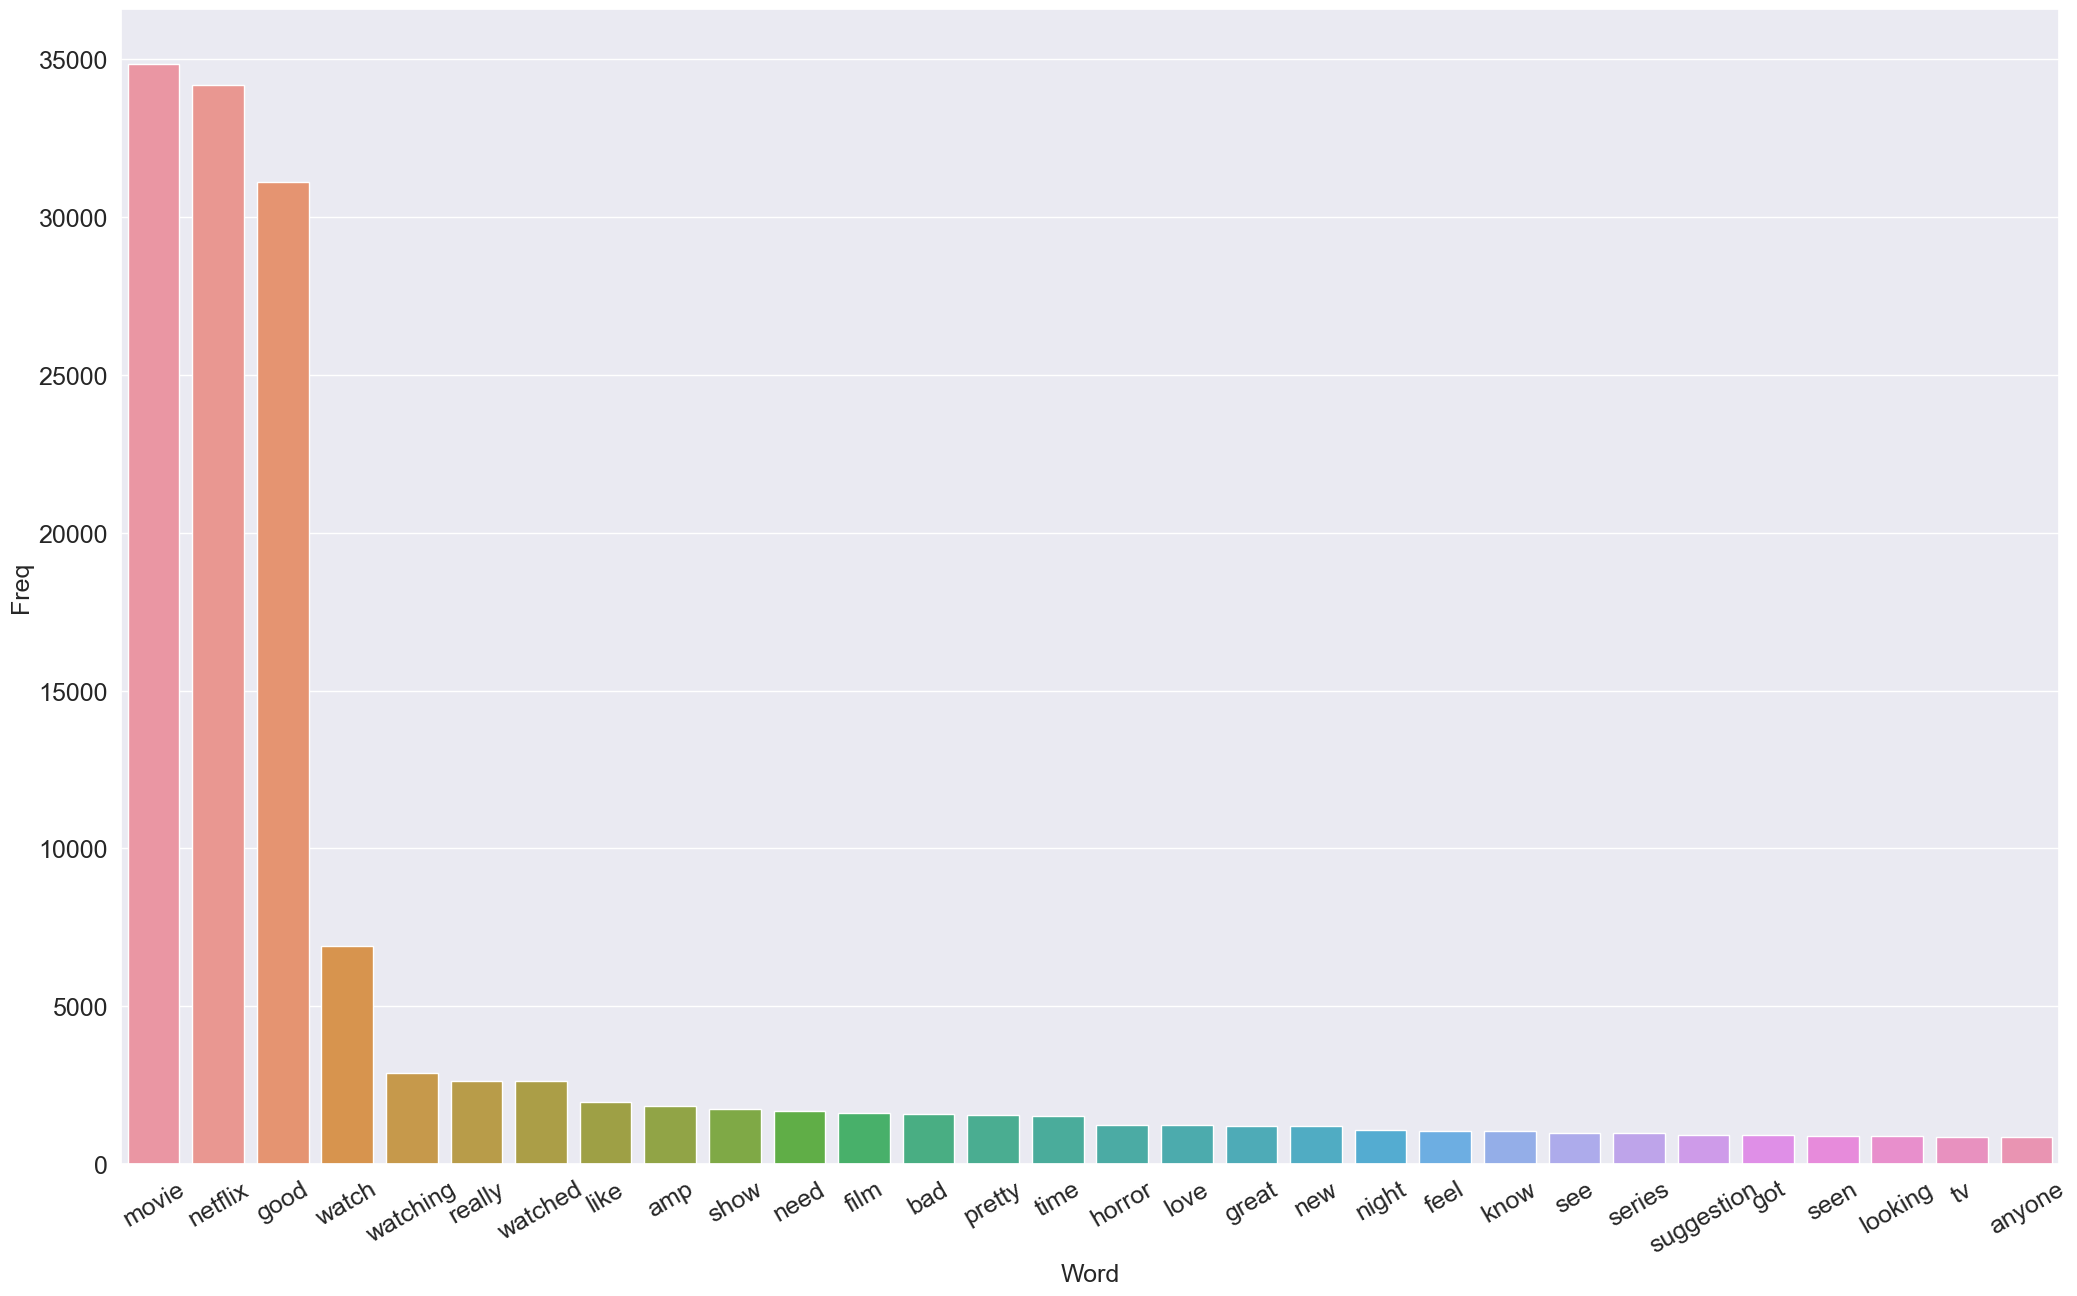

In [381]:
# Visualize top uni-grams, bi-grams & tri-grams words
# Most frequently occuring N uni-grams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns # statistical data visualization
def get_top_unigram_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Convert 30 most freq words to dataframe for plotting bar plot

top_words = get_top_unigram_words(tweet['cleaned_Content'], n=30)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
print(top_df)

# Barplot of most freq words

sns.set(rc={'figure.figsize':(25,15),'ytick.labelsize':'18','xtick.labelsize':'18', 'axes.labelsize':'18'})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

            Bi-gram   Freq
0        good movie  13289
1     movie netflix   7855
2       movie watch   2874
3     watch netflix   2621
4     netflix movie   2483
5      good netflix   2084
6      netflix good   1738
7       really good   1732
8        movie good   1481
9       pretty good   1289
10        bad movie    898
11        need good    798
12     horror movie    683
13        feel good    639
14     looking good    488
15     breaking bad    455
16  netflix netflix    441
17        find good    417
18      good horror    417
19      watch movie    406
20       show movie    393
21       movie show    384
22         as movie    370
23   watching movie    368
24      scary movie    362
25       good watch    361
26          good as    360
27        know good    355
28       last night    340
29       watch good    326


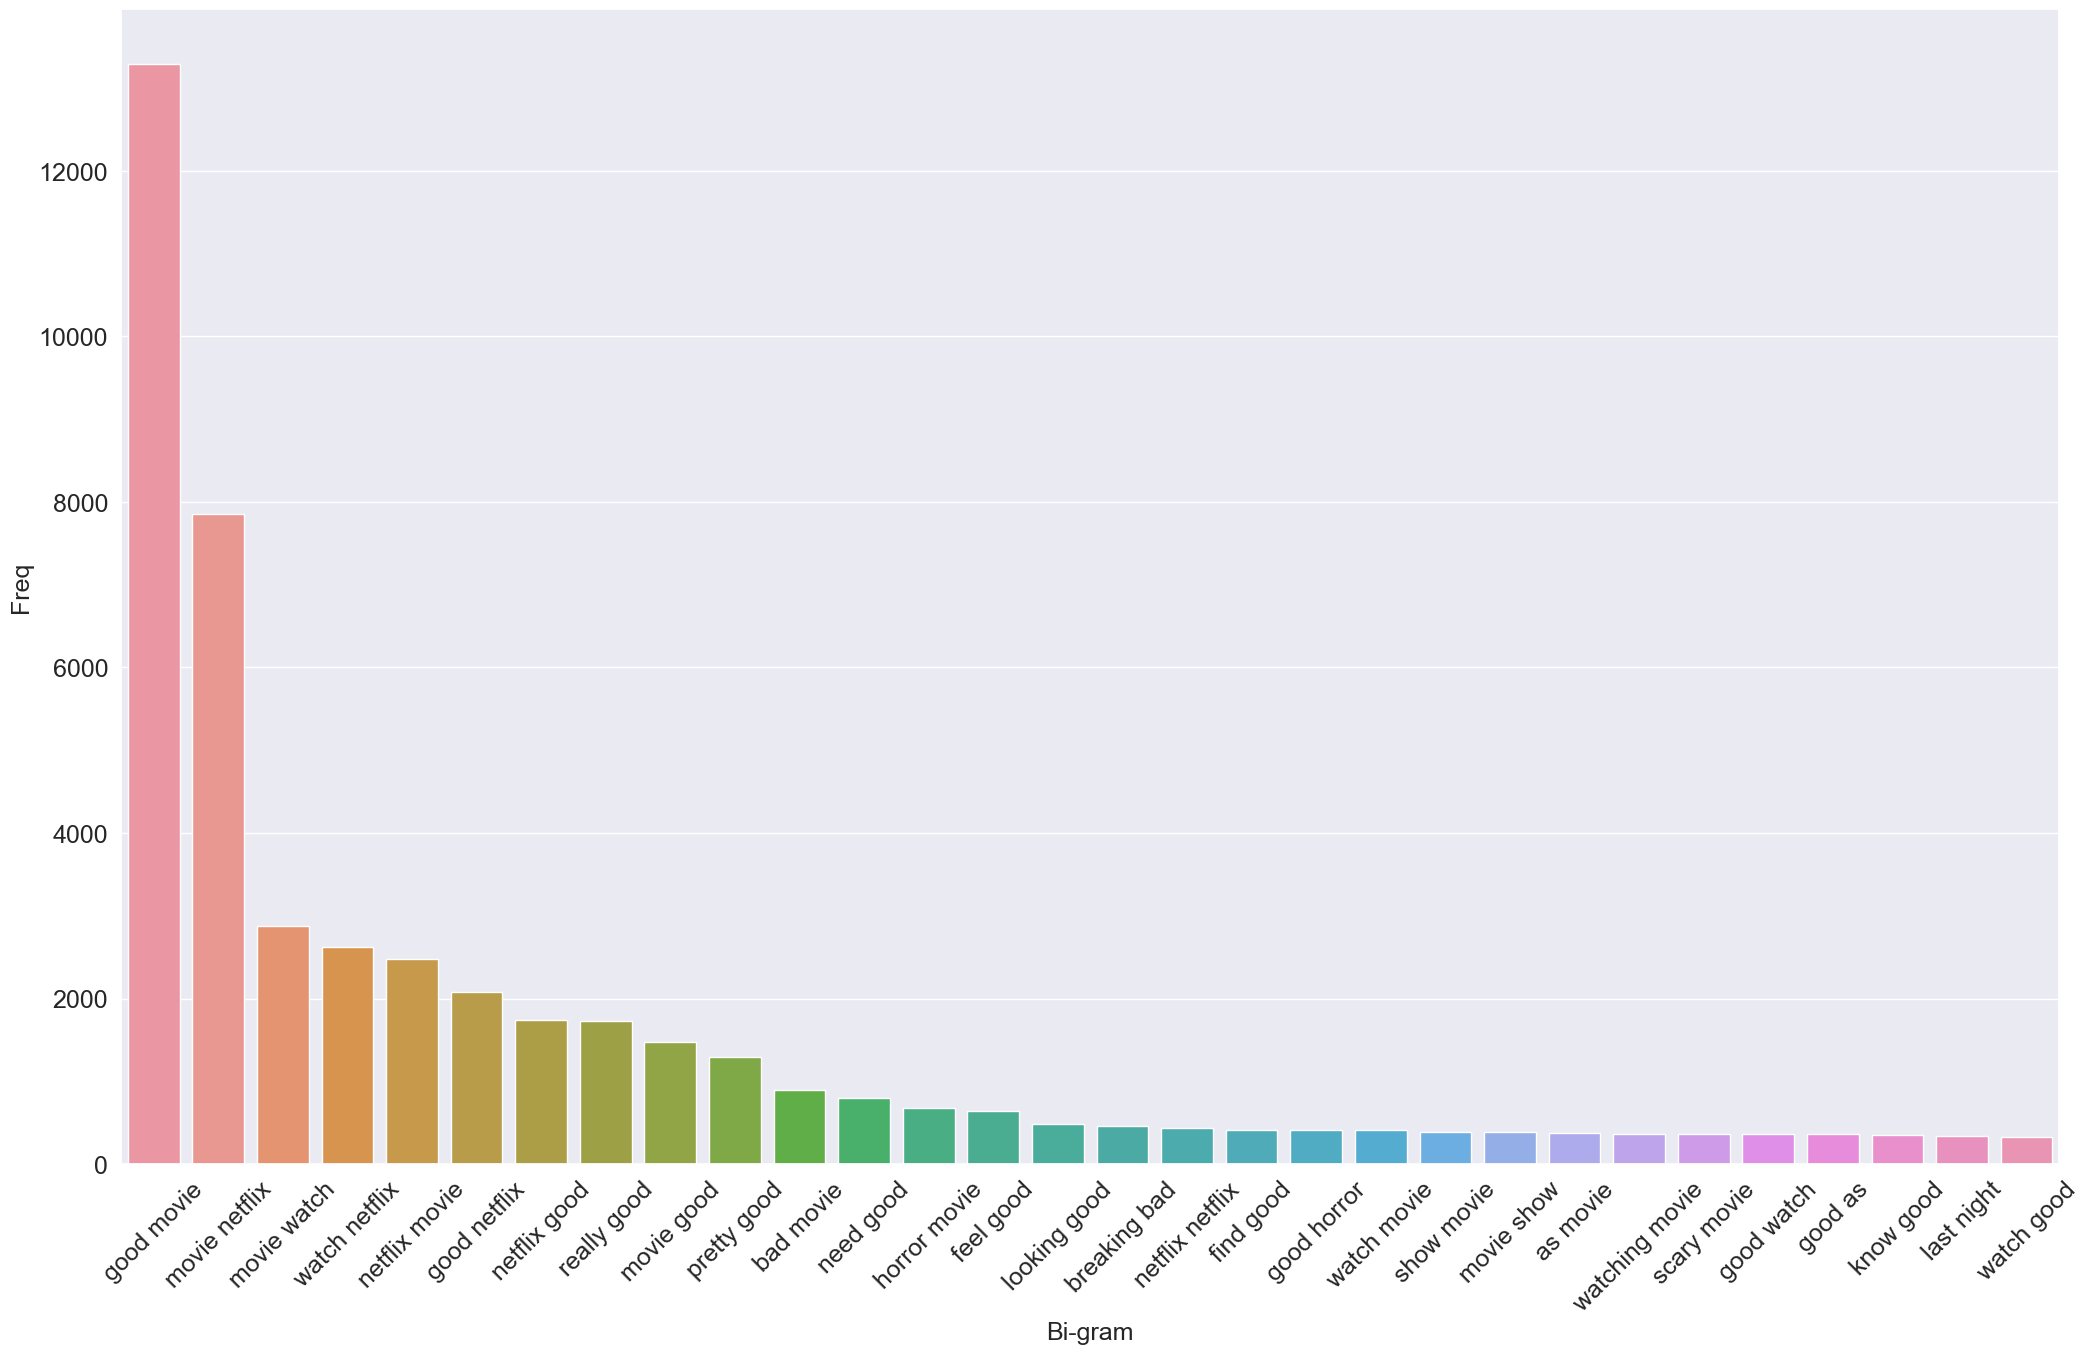

In [382]:
# Most frequently occuring Bi-grams

def get_top_bigrams_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

# Convert 30 most freq words to dataframe for plotting bar plot

top2_words = get_top_bigrams_words(tweet['cleaned_Content'], n=30)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
top2_df.to_csv("dataset/top2.csv",index=False,header=False)


#Barplot of most freq Bi-grams

sns.set(rc={'figure.figsize':(25,15),'ytick.labelsize':'18','xtick.labelsize':'18', 'axes.labelsize':'18'})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
plt.show()

                Tri-gram  Freq
0     good movie netflix  4434
1       good movie watch  2095
2    movie watch netflix  1921
3     netflix good movie   848
4     good netflix movie   788
5      really good movie   738
6      pretty good movie   511
7        need good movie   464
8     breaking bad movie   419
9        feel good movie   387
10     good horror movie   365
11         good as movie   325
12       find good movie   304
13    looking good movie   303
14    el camino breaking   263
15   camino breaking bad   263
16      good scary movie   246
17  horror movie netflix   245
18   netflix pretty good   238
19       good movie show   229
20    movie good netflix   215
21   netflix really good   210
22       know good movie   194
23      as movie netflix   183
24       good show movie   183
25    movie netflix good   181
26   movie netflix watch   171
27   netflix movie watch   166
28      watch good movie   165
29       damn good movie   159


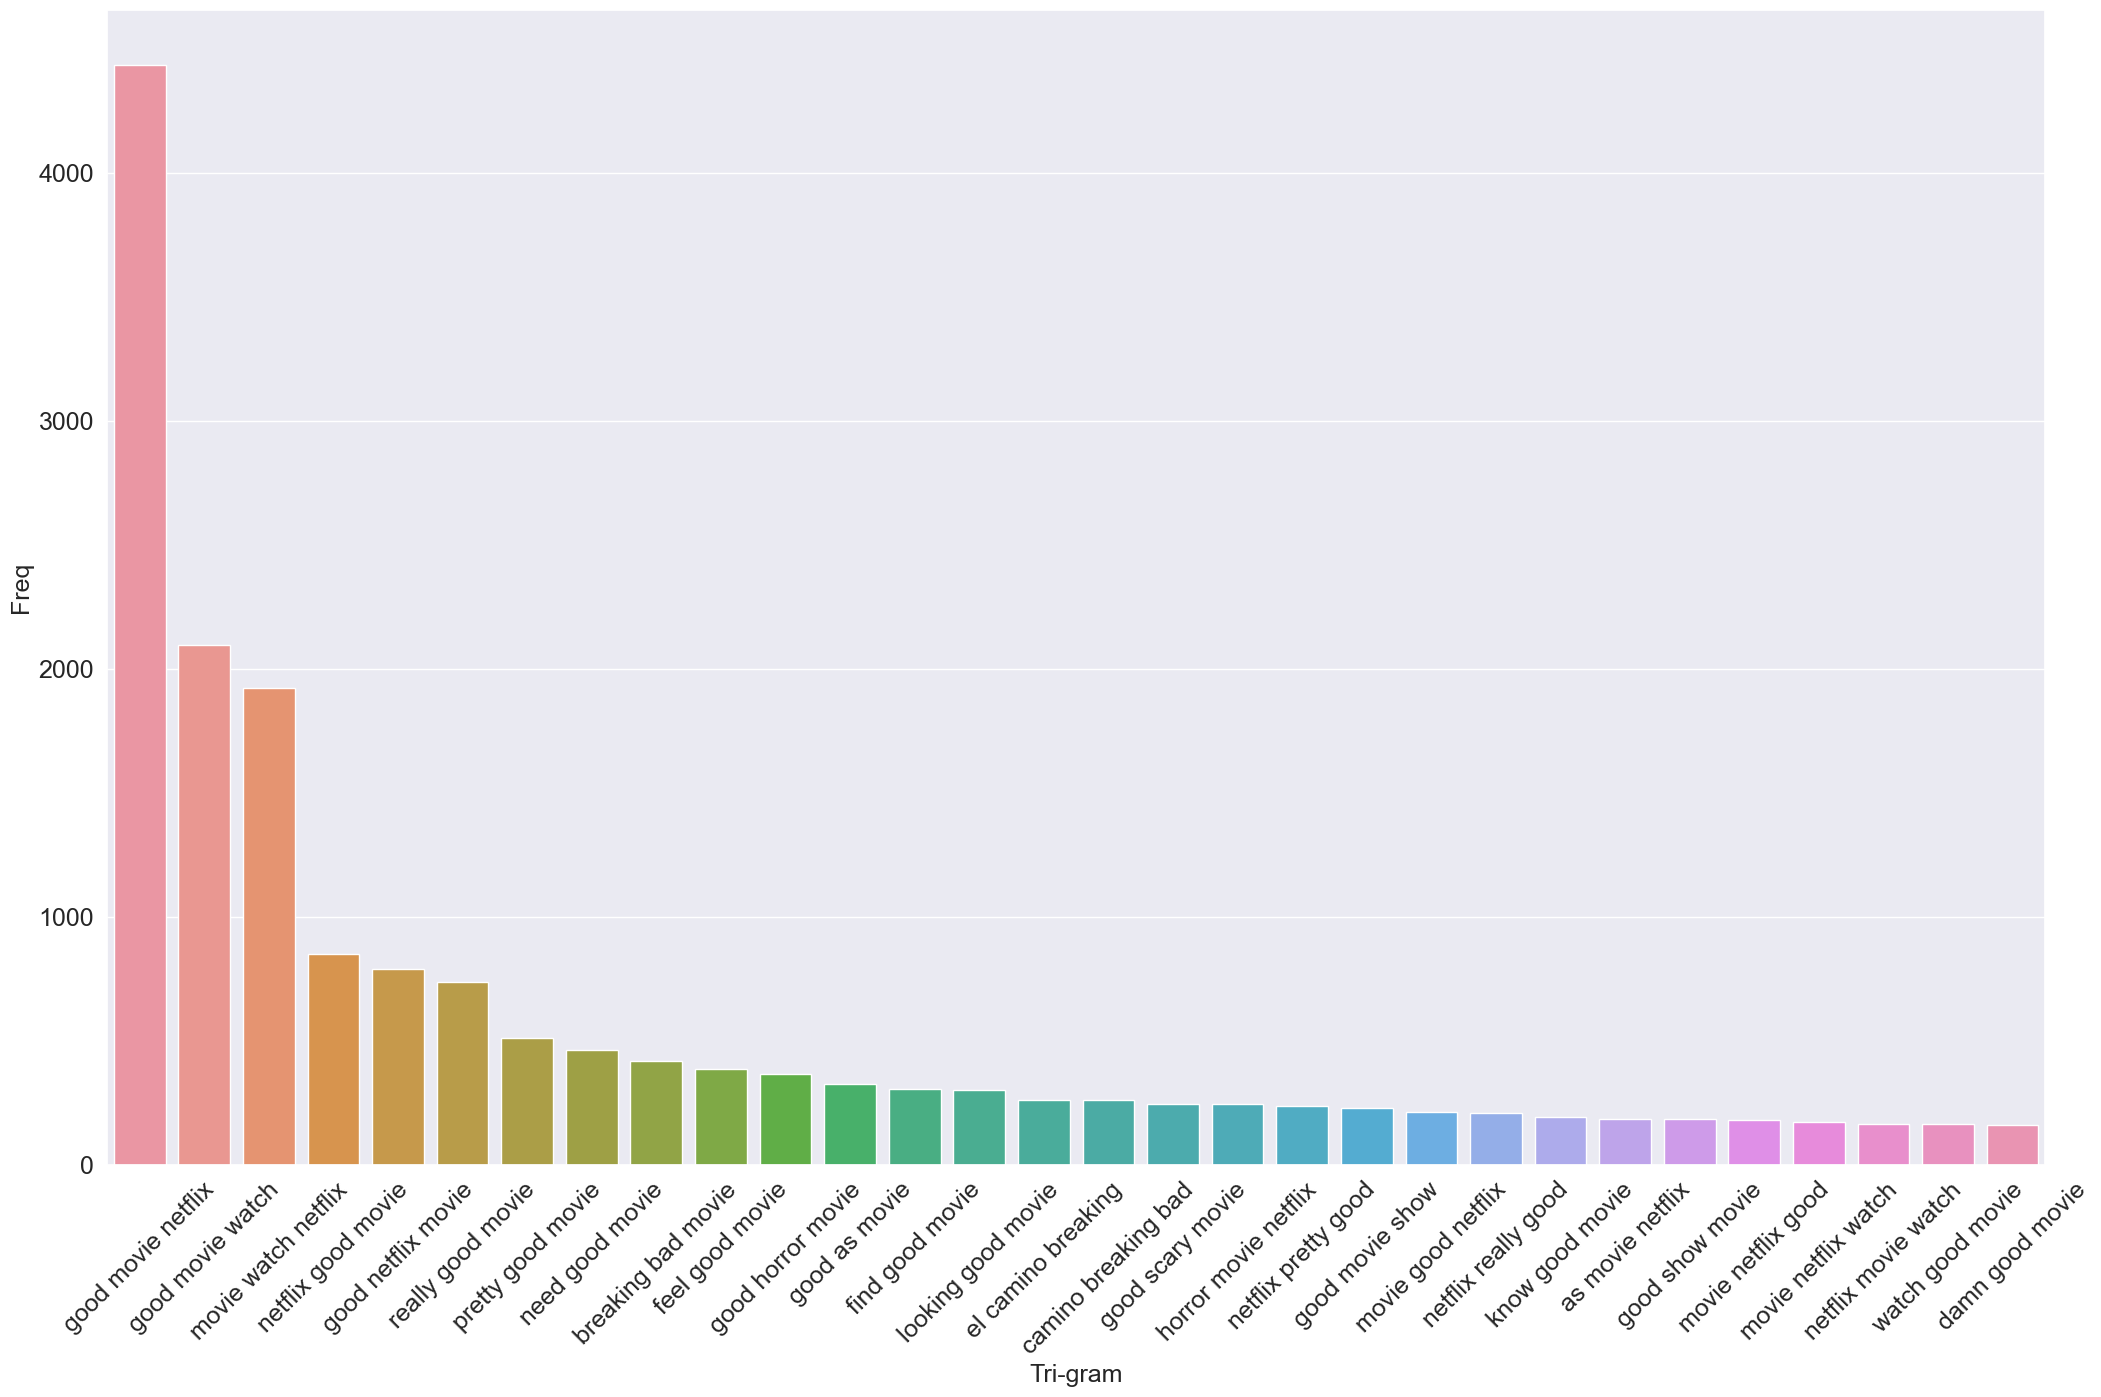

In [383]:
#Most frequently occuring Tri-grams

def get_top_trigrams_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot

top3_words = get_top_trigrams_words(tweet['cleaned_Content'], n=30)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
top3_df.to_csv("dataset/top3.csv",index=False,header=False)


#Barplot of most freq Tri-grams

sns.set(rc={'figure.figsize':(25,15),'ytick.labelsize':'18','xtick.labelsize':'18', 'axes.labelsize':'18'})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
plt.show()

# 4. SENTIMENT ANALYSIS OF SCRAPED TWEETS: Comparing Sentiment Classifiers

In [384]:
# To Install wordcloud, execute the following :
#!pip install wordcloud

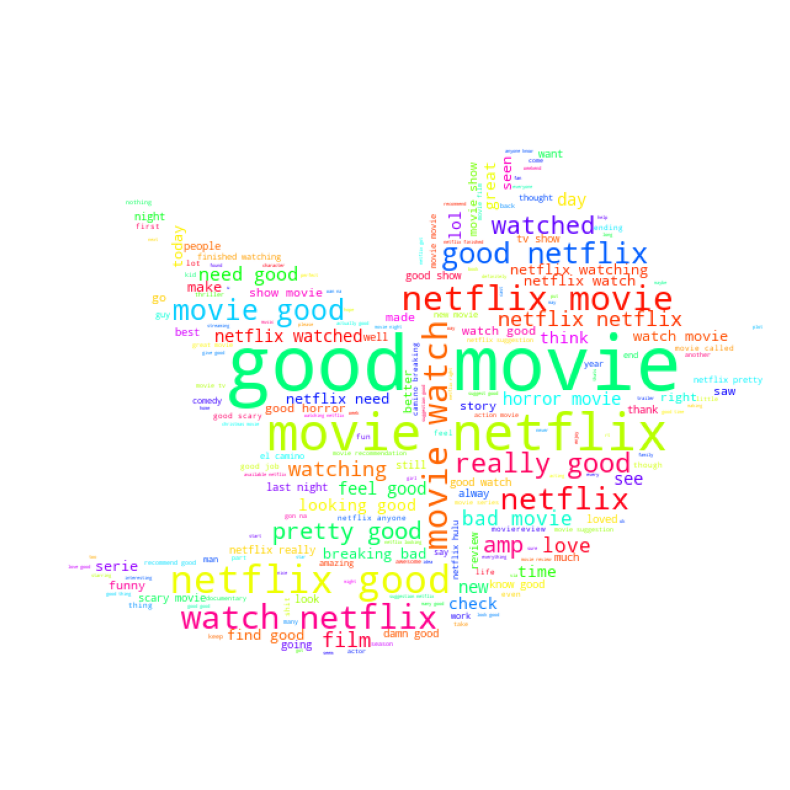

In [385]:
#create a function for wordcloud
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Import twitter image to np.array
mask = np.array(Image.open('Images/twitter.jpg'))

def create_wordcloud(text,name):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', colormap = 'hsv', width=2800, height=1000, random_state=21, max_font_size=130, mask=mask).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    # Save the image in the Images folder:
    plt.savefig(name,format="png")
    plt.show()

    
#plot wordcloud for all tweets
word_t = tweet['cleaned_Content']
create_wordcloud(word_t,"Images/all_Netflixtweets_words.png")

#### 1.TextBlob
TextBlob is a Python library that can be used for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as sentiment analysis(our purpase).
TextBlob breaks down the "polarity " for each tweet, by giving three sentiment:
* positive, 
* neutral, 
* and negative 

This classification is accessible via the determination of :

1.Polarity: shows how positive or negative a word is--> -1 is very negative,  +1 is very positive and 0 is neutral. 

2.Subjectivity: gives an idea about how subjective or opinionated a word is --> 0 is fact and +1 is very much an opinion.

In [386]:
from textblob import TextBlob

In [387]:
#get subjectivity of tweets using TextBlob (TB)
def TB_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity using TextBlob (TB)
def TB_Polarity(text):
    return TextBlob(text).sentiment.polarity

In [388]:
tweet['Subjectivity_TB'] = tweet['cleaned_Content'].apply(TB_Subjectivity)
tweet['Polarity_TB'] = tweet['cleaned_Content'].apply(TB_Polarity)
tweet.head()

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   
2  Blonde wasn’t a bad movie on #Netflix but it c...   
3  Not such a bad movie. I wished it had a little...   
4  #Netflix movie of the day: El Camino: A Breaki...   

                                     cleaned_Content  Subjectivity_TB  \
0  bad movie thought would impressive good time w...         0.755556   
1  netflix movie day el camino breaking bad movie...         0.527778   
2              blonde bad movie netflix could longer         0.333333   
3  bad movie wished little punch umma definite sl...         0.543098   
4  netflix movie day el camino breaking bad movie...         0.527778   

   Polarity_TB  
0     0.333333  
1    -0.550000  
2    -0.350000  
3    -0.042719  
4    -0.550000

In [389]:
#create a function to check negative, neutral and positive analysis
def Sentiment_Analysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

In [390]:
tweet['Analysis_TB'] = tweet['Polarity_TB'].apply(Sentiment_Analysis)
# reset the index
tweet.reset_index(drop= True,inplace=True) 
tweet.head()

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   
2  Blonde wasn’t a bad movie on #Netflix but it c...   
3  Not such a bad movie. I wished it had a little...   
4  #Netflix movie of the day: El Camino: A Breaki...   

                                     cleaned_Content  Subjectivity_TB  \
0  bad movie thought would impressive good time w...         0.755556   
1  netflix movie day el camino breaking bad movie...         0.527778   
2              blonde bad movie netflix could longer         0.333333   
3  bad movie wished little punch umma definite sl...         0.543098   
4  netflix movie day el camino breaking bad movie...         0.527778   

   Polarity_TB Analysis_TB  
0     0.333333    Positive  
1    -0.550000    Negative  
2    -0.350000    Negative  
3    -0.042719    Negative  
4    -0.550000    Negative

In [391]:
# Count the tweets' 3 polarity
tweet['Analysis_TB'].value_counts() 

Positive    28994
Negative     1826
Neutral       369
Name: Analysis_TB, dtype: int64

In [392]:
# Positive TWEETS
tweet[tweet['Analysis_TB']=='Positive']
 

Content  \
0      not a bad movie as I thought it would be, but ...   
9      Was #Morbius a good or bad #movie? \n\n#Netfli...   
11     "Day shift" is not at all a bad movie &amp; I ...   
13     What can I say? #TheGrayMan is not a good movi...   
17     Janeites are still arguing over the latest Per...   
...                                                  ...   
31184  @HiHeatherrr_24 Omigod :) it's such a "feel go...   
31185  Good action movie. RT @dangadanga: Ms_43938 @D...   
31186  I'd forgotten how good a movie "In the Line of...   
31187  Machine Gun Preacher #Netflix definitely an in...   
31188  DAMN no good movies to watch on #Netflix somet...   

                                         cleaned_Content  Subjectivity_TB  \
0      bad movie thought would impressive good time w...         0.755556   
9             morbius good bad movie netflix marvel sony         0.633333   
11     day shift bad movie amp really enjoyed watchin...         0.655556   
13     say thegrayman good movie bad movie right midd...         0.450595   
17     janeites still arguing latest persuasion adapt...         0.608902   
...                                                  ...              ...   
31184  omigod feel good movie love bestfriendtelepoth...         0.600000   
31185  good action movie rt ms43938 act valor deck ne...         0.350000   
31186  id forgotten good movie line fire netflix nhll...         0.600000   
31187  machine gun preacher netflix definitely intere...         0.583333   
31188  damn good movie watch netflix sometimes feel l...         0.600000   

        Polarity_TB Analysis_TB  
0      3.333333e-01    Positive  
9      5.551115e-17    Positive  
11     1.666667e-01    Positive  
13     7.142857e-02    Positive  
17     1.889205e-01    Positive  
...             ...         ...  
31184  6.000000e-01    Positive  
31185  4.000000e-01    Positive  
31186  7.000000e-01    Positive  
31187  4.000000e-01    Positive  
31188  7.000000e-01    Positive  

[28994 rows x 5 columns]

In [393]:
# get the percentage of positive,negative and neutral tweets
def sentiment_percentage (data,df):
    # Positive tweets
    test_pos = data[df=='Positive']
    test_pos = test_pos['cleaned_Content']
    percentage_pos = round((test_pos.shape[0]/data.shape[0]) *100,1)
    # Negative tweets
    test_neg = data[df=='Negative']
    test_neg = test_neg['cleaned_Content']
    percentage_neg = round((test_neg.shape[0]/data.shape[0]) *100,1)
    # Neutral tweets
    test_neut = data[df=='Neutral']
    test_neut = test_neut['cleaned_Content']
    percentage_neut = round((test_neut.shape[0]/data.shape[0]) *100,1)
    return percentage_pos,percentage_neg,percentage_neut

In [394]:
# Print the sentiment analysis percentages
pos_perc,neg_perc,neut_perc = sentiment_percentage(tweet,tweet['Analysis_TB'])

print("Percentage of  tweet's sentiment analysis by TextBlob :\n")
print('- Positive tweets ---> {0}% '.format(pos_perc))
print('- Negative tweets ---> {0}%'.format(neg_perc))
print('- Neutral tweets  ---> {0}%'.format(neut_perc))

Percentage of  tweet's sentiment analysis by TextBlob :

- Positive tweets ---> 93.0% 
- Negative tweets ---> 5.9%
- Neutral tweets  ---> 1.2%


In [395]:
tweet.head(2)

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   

                                     cleaned_Content  Subjectivity_TB  \
0  bad movie thought would impressive good time w...         0.755556   
1  netflix movie day el camino breaking bad movie...         0.527778   

   Polarity_TB Analysis_TB  
0     0.333333    Positive  
1    -0.550000    Negative

In [396]:
#create a function to check negative, neutral and positive analysis
def Sentiment_Analysis_HEX(score):
    if score<0:
        return '#dc2626'
    elif score ==0:
        return '#22d3ee'
    else:
        return '#22c55e'

In [397]:
test = tweet[["Subjectivity_TB","Polarity_TB","Analysis_TB"]]
test = test.round(1)
df2 = test.groupby(["Polarity_TB"]).count()
df2.reset_index(inplace=True)
df2['Analysis_TB'] = df2['Polarity_TB'].apply(Sentiment_Analysis_HEX)
df2.reset_index(drop= True,inplace=True) 
df2.to_csv("dataset/tweet.csv",index=False)

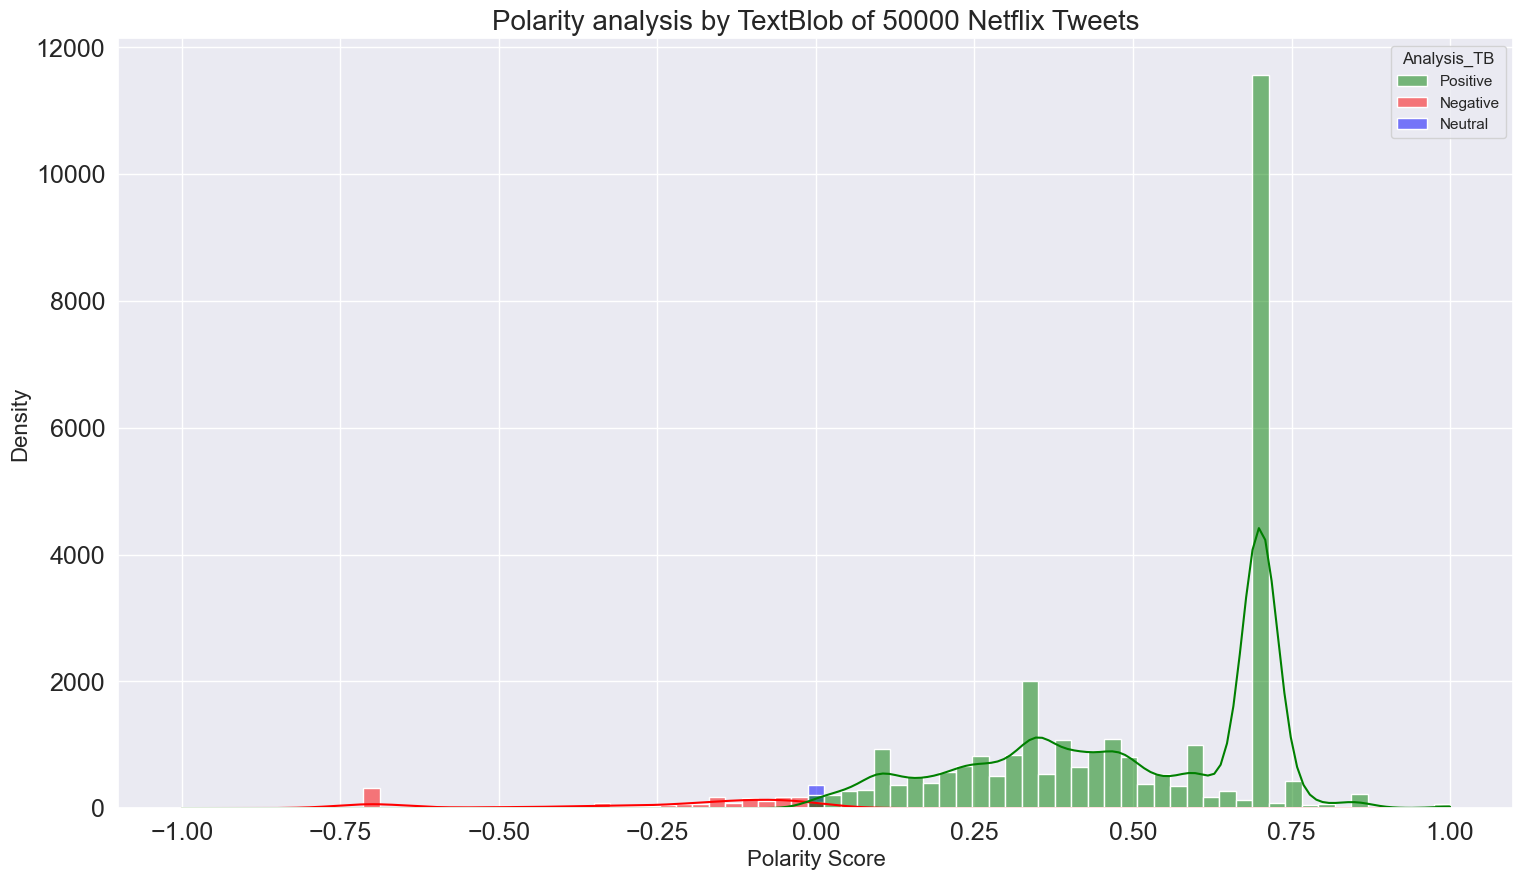

In [398]:
# plot the density of each label's polarity scores
plt.figure(figsize=(18, 10))
sns.histplot(data=tweet, x='Polarity_TB', kde=True,hue="Analysis_TB", palette=['green','red', 'blue'])

# setting label, title and legend
plt.title('Polarity analysis by TextBlob of 50000 Netflix Tweets', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Polarity Score', fontsize=16)
plt.show()

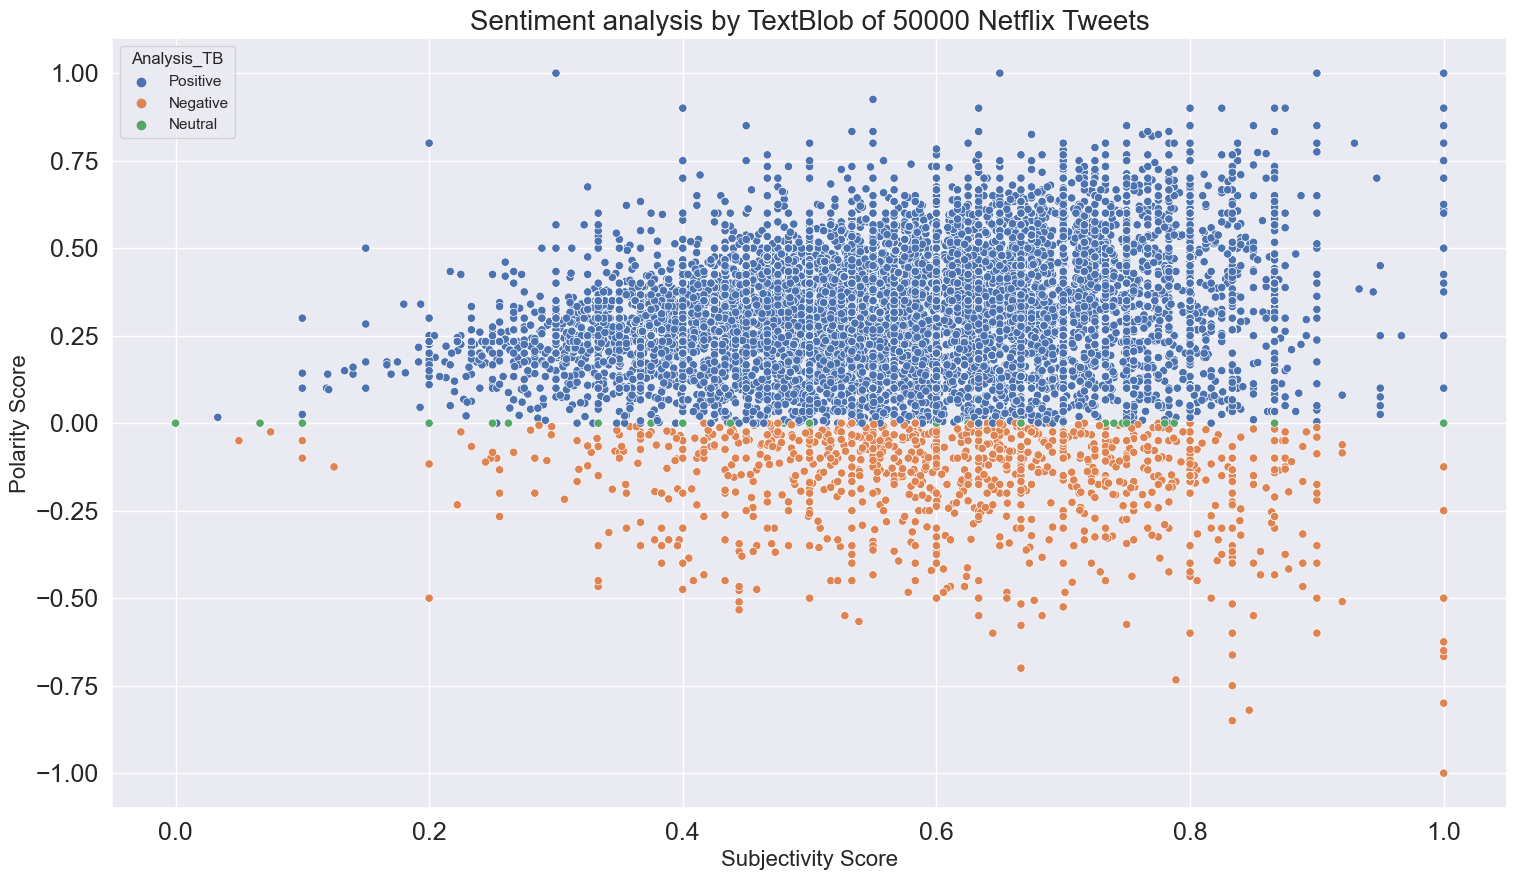

In [399]:
# plot the density of each label's subjectivity scores
plt.figure(figsize=(18, 10))
sns.scatterplot(data=tweet, x='Subjectivity_TB', y='Polarity_TB', hue="Analysis_TB", palette="deep")

# setting label, title and legend
plt.title('Sentiment analysis by TextBlob of 50000 Netflix Tweets', fontsize=20)
plt.ylabel('Polarity Score', fontsize=16)
plt.xlabel('Subjectivity Score', fontsize=16)
plt.show()

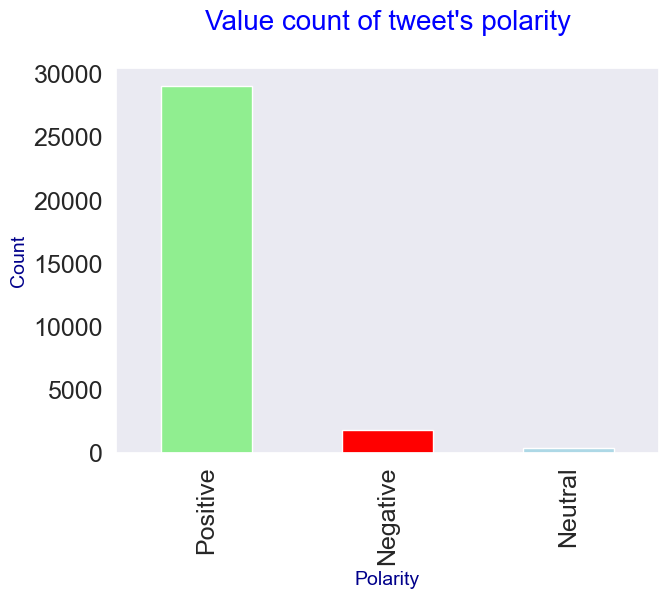

In [400]:
#plot a bar graph to show count of tweet sentiment
def plot_bar (data):
    fig = plt.figure(figsize=(7,5))
    color = ['lightgreen','red','lightblue']
    data.value_counts().plot(kind='bar',color = color)
    plt.title("Value count of tweet's polarity\n",size='20',color='blue')
    plt.ylabel('Count',size='14',color='darkblue')
    plt.xlabel('Polarity',size='14',color='darkblue')
    plt.grid(False)
    plt.show()

plot_bar(tweet['Analysis_TB'])

In [401]:
df2 = tweet.groupby(["Analysis_TB"]).count().reset_index()
df2[["Analysis_TB","Content"]].to_csv("dataset/tweet_repartition.csv",index=False)

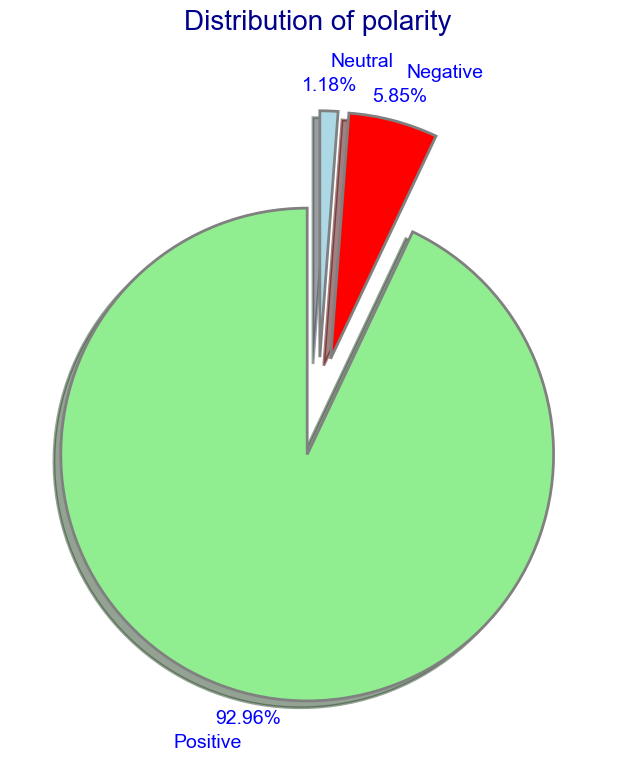

In [402]:
#pie chart to show percentage distribution of polarity
def plot_pie(data):
    fig = plt.figure(figsize=(8,8))
    colors = ('lightgreen','red','lightblue')
    wp={'linewidth':2, 'edgecolor': 'grey'}
    tags=data.value_counts()
    explode = (0.2,0.2,0.2)
    tags.plot(kind='pie', autopct='%1.2f%%', shadow=True, colors=colors,
         startangle=90, wedgeprops=wp, explode=explode, label='',textprops = dict(color ="blue",fontsize = 14),pctdistance=1.1, labeldistance=1.2)
    plt.title('Distribution of polarity\n\n',size='20', color= 'darkblue')
    plt.show()

plot_pie(tweet['Analysis_TB'])

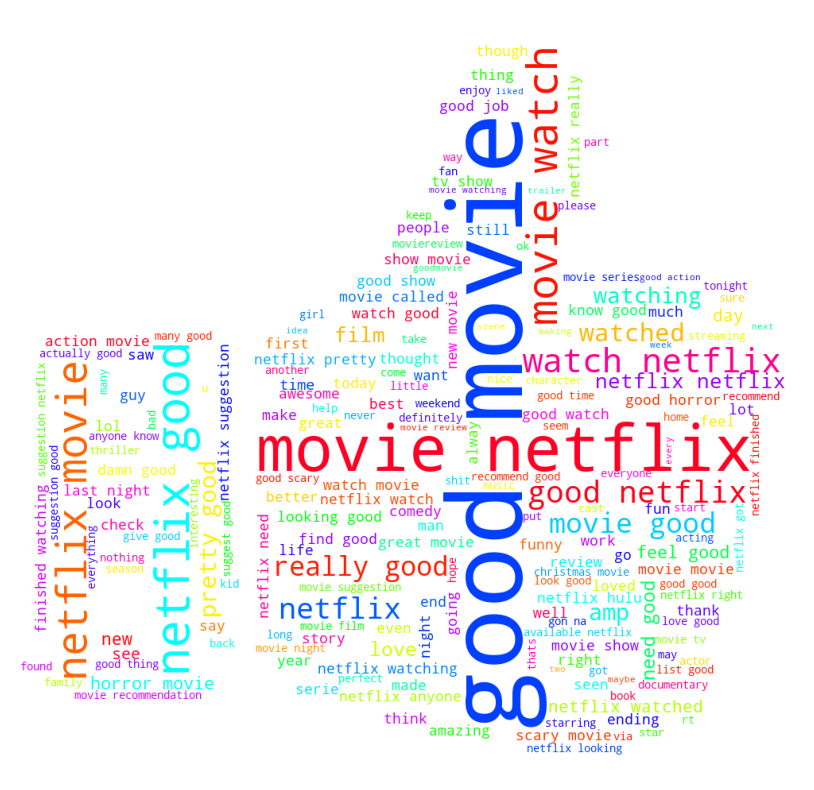

In [403]:
#create wordcloud for positive tweets
posi_Tweets = tweet.loc[tweet['Analysis_TB']=='Positive', 'cleaned_Content']
# Import positive image to np.array
mask = np.array(Image.open('./Images/positive.jpg'))
create_wordcloud(posi_Tweets,"Images/Positive_Netflixtweets_words.png")

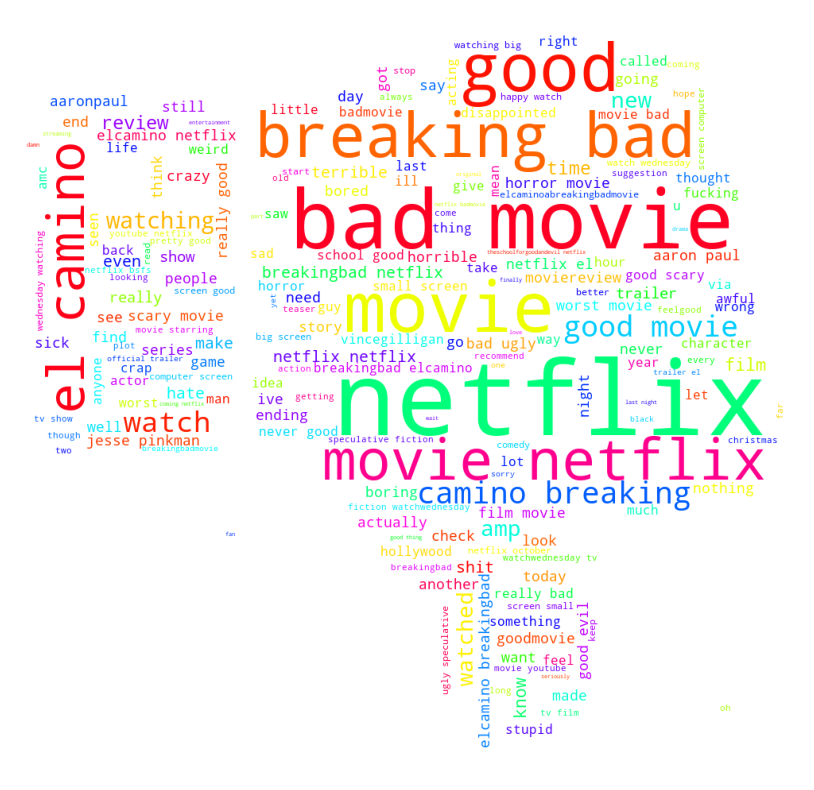

In [404]:
#plot wordcloud for negative tweets
neg_Tweets = tweet.loc[tweet['Analysis_TB']=='Negative', 'cleaned_Content']
# Import negative image to np.array
mask = np.array(Image.open('./Images/negative.jpg'))
create_wordcloud(neg_Tweets,"Images/Negative_Netflixtweets_words.png")

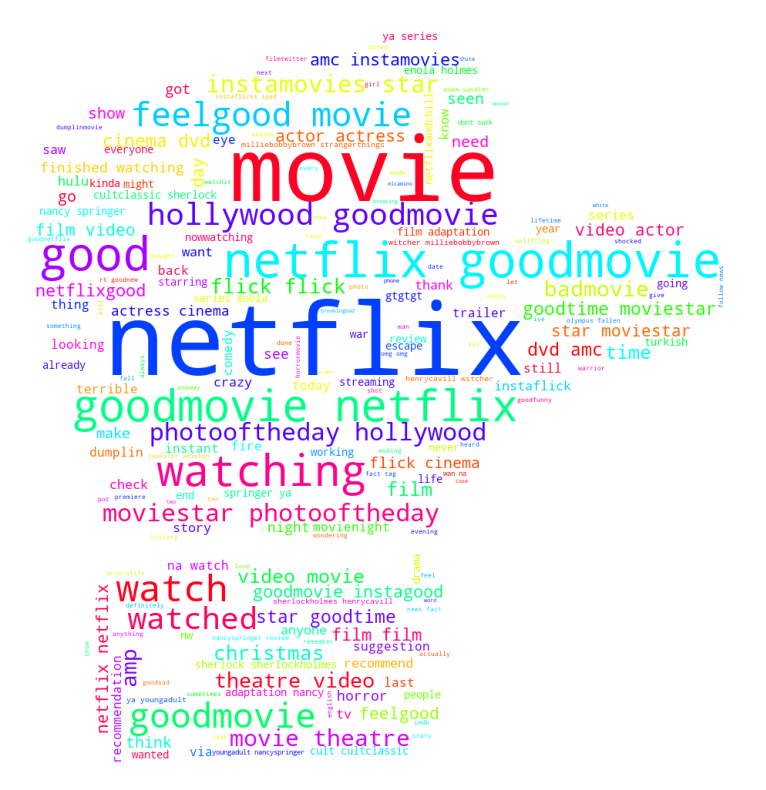

In [405]:
#plot wordcloud for neutral tweets
neut_Tweets = tweet.loc[tweet['Analysis_TB']=='Neutral', 'cleaned_Content']
# Import negative image to np.array
mask = np.array(Image.open('./Images/Neutral.jpg'))
create_wordcloud(neut_Tweets,"Images/Neutral_Netflixtweets_words.png")

#### 2. VADERSentiment
VADER stands for Valence Aware Dictionary and sEntiment Reasoner. It is a rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
The special thing about VADER is that it breaks down the "polarity score" for each row, by giving thr following labels:
* positive, 
* neutral, 
* negative, 
* and also compound score.It is computed by normalising the scores Neutral, Positive and Negative

In [406]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mateleo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [407]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#get polarity using vaderSentiment (VS)
def VS_Polarity(text):
    for index,row in text.iteritems():
        score = SentimentIntensityAnalyzer().polarity_scores(row)
    return score

In [408]:
tweet.dtypes

Content             object
cleaned_Content     object
Subjectivity_TB    float64
Polarity_TB        float64
Analysis_TB         object
dtype: object

In [409]:
tweet['Polarity_VS'] = tweet['cleaned_Content'].apply(lambda x: SentimentIntensityAnalyzer().polarity_scores(x))
tweet.head()

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   
2  Blonde wasn’t a bad movie on #Netflix but it c...   
3  Not such a bad movie. I wished it had a little...   
4  #Netflix movie of the day: El Camino: A Breaki...   

                                     cleaned_Content  Subjectivity_TB  \
0  bad movie thought would impressive good time w...         0.755556   
1  netflix movie day el camino breaking bad movie...         0.527778   
2              blonde bad movie netflix could longer         0.333333   
3  bad movie wished little punch umma definite sl...         0.543098   
4  netflix movie day el camino breaking bad movie...         0.527778   

   Polarity_TB Analysis_TB                                        Polarity_VS  
0     0.333333    Positive  {'neg': 0.21, 'neu': 0.419, 'pos': 0.371, 'com...  
1    -0.550000    Negative  {'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...  
2    -0.350000    Negative  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...  
3    -0.042719    Negative  {'neg': 0.165, 'neu': 0.458, 'pos': 0.377, 'co...  
4    -0.550000    Negative  {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...

In [410]:
# get polarity of tweets using vaderSentiment (VS)
def VS_compoundsentiment(sentiment):
    if sentiment['compound'] > 0:
        return "Positive"
    elif sentiment['compound'] < 0: 
        return "Negative"
    else:
        return "Neutral"  

In [411]:
# Proceed to the sentiment analysis by VS
# Please wait it might take some time !
tweet['Analysis_VS'] = tweet['Polarity_VS'].apply(lambda x: VS_compoundsentiment(x))
# reset the index
tweet.reset_index(drop= True,inplace=True)
tweet.head(10) 

Content  \
0  not a bad movie as I thought it would be, but ...   
1  #Netflix movie of the day: El Camino: A Breaki...   
2  Blonde wasn’t a bad movie on #Netflix but it c...   
3  Not such a bad movie. I wished it had a little...   
4  #Netflix movie of the day: El Camino: A Breaki...   
5  #Netflix #Blonde #AnaDeArmas - Is a bad movie,...   
6  Yo …. #morbius was not a bad movie at all. #ne...   
7  Yeah watched Morbius again. &amp; I’ll say it ...   
8  Watched Morbium Time..\nI can't really say it ...   
9  Was #Morbius a good or bad #movie? \n\n#Netfli...   

                                     cleaned_Content  Subjectivity_TB  \
0  bad movie thought would impressive good time w...         0.755556   
1  netflix movie day el camino breaking bad movie...         0.527778   
2              blonde bad movie netflix could longer         0.333333   
3  bad movie wished little punch umma definite sl...         0.543098   
4  netflix movie day el camino breaking bad movie...         0.527778   
5  netflix blonde anadearmas bad movie bad film m...         0.444444   
6  yo … morbius bad movie netflix marvel dc spide...         0.666667   
7     yeah watched morbius amp say bad movie netflix         0.666667   
8  watched morbium time really say bad movie 10 a...         0.253333   
9         morbius good bad movie netflix marvel sony         0.633333   

    Polarity_TB Analysis_TB  \
0  3.333333e-01    Positive   
1 -5.500000e-01    Negative   
2 -3.500000e-01    Negative   
3 -4.271886e-02    Negative   
4 -5.500000e-01    Negative   
5 -4.666667e-01    Negative   
6 -7.000000e-01    Negative   
7 -7.000000e-01    Negative   
8 -1.000000e-01    Negative   
9  5.551115e-17    Positive   

                                         Polarity_VS Analysis_VS  
0  {'neg': 0.21, 'neu': 0.419, 'pos': 0.371, 'com...    Positive  
1  {'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...    Negative  
2  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...    Negative  
3  {'neg': 0.165, 'neu': 0.458, 'pos': 0.377, 'co...    Positive  
4  {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'comp...    Negative  
5  {'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...    Negative  
6  {'neg': 0.263, 'neu': 0.526, 'pos': 0.211, 'co...    Negative  
7  {'neg': 0.299, 'neu': 0.513, 'pos': 0.188, 'co...    Negative  
8  {'neg': 0.186, 'neu': 0.689, 'pos': 0.125, 'co...    Negative  
9  {'neg': 0.265, 'neu': 0.303, 'pos': 0.432, 'co...    Positive

In [412]:
# Print the sentiment analysis percentages
pos_perc_VS,neg_perc_VS,neut_perc_VS = sentiment_percentage(tweet,tweet['Analysis_VS'])

print("Percentage of  tweet's sentiment analysis by Vander Sentiment:\n")
print('- Positive tweets ---> {0}% '.format(pos_perc_VS))
print('- Negative tweets ---> {0}%'.format(neg_perc_VS))
print('- Neutral tweets  ---> {0}%'.format(neut_perc_VS))

Percentage of  tweet's sentiment analysis by Vander Sentiment:

- Positive tweets ---> 86.0% 
- Negative tweets ---> 12.9%
- Neutral tweets  ---> 1.1%


**C/C :we can clearly see that the percentages of sentiment labels differs from the previous one given by TextBlob** 
**(pos (93%), neg (5.9%), neutral(1.2%)). This indicates that maybe some tweets were mislabeled.**  

      ---> TextBlob appears to be more accurate than Vander Sentiment.

In [413]:
# seperating out 'polarity' dictionary
vander_polarity = tweet['Polarity_VS'].apply(pd.Series)
vander_polarity

neg    neu    pos  compound
0      0.210  0.419  0.371    0.4019
1      0.233  0.767  0.000   -0.7906
2      0.412  0.588  0.000   -0.5423
3      0.165  0.458  0.377    0.8040
4      0.219  0.781  0.000   -0.7906
...      ...    ...    ...       ...
31184  0.000  0.413  0.587    0.7964
31185  0.000  0.734  0.266    0.4404
31186  0.352  0.410  0.238   -0.1027
31187  0.139  0.289  0.572    0.7579
31188  0.146  0.432  0.422    0.6249

[31189 rows x 4 columns]

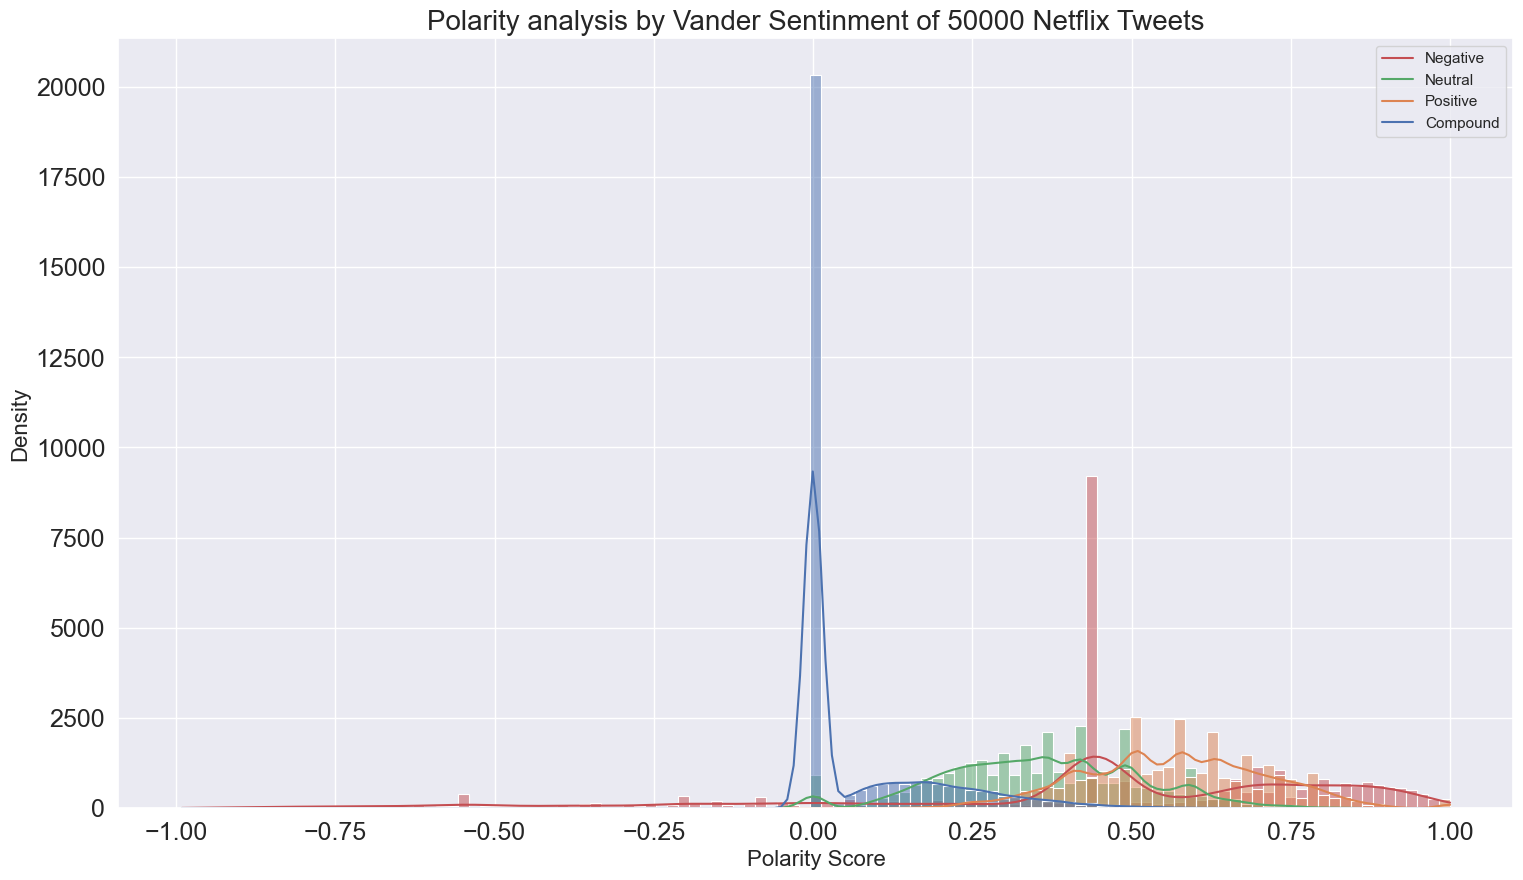

In [414]:
plt.figure(figsize=(18, 10))
sns.histplot(data=vander_polarity, kde=True)
# setting label, title and legend
plt.title('Polarity analysis by Vander Sentinment of 50000 Netflix Tweets', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Polarity Score', fontsize=16)
plt.legend(labels=['Negative','Neutral','Positive','Compound'])
plt.show()

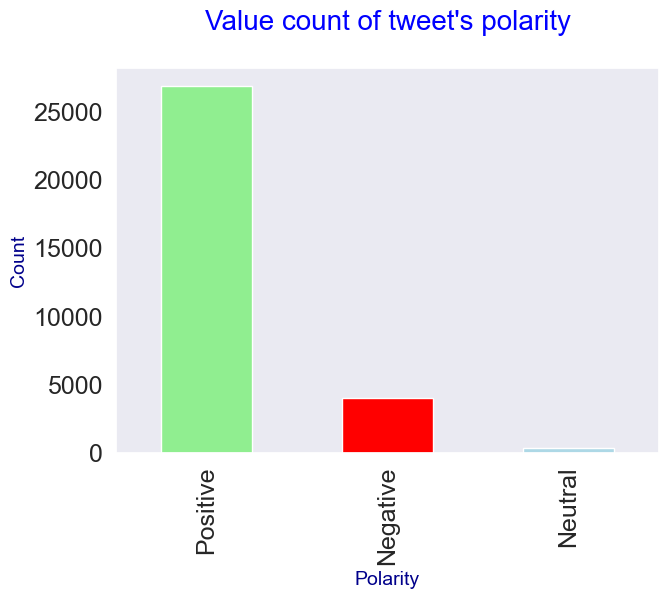

In [415]:
# Count of the sentiment analysis by Vander Sentiment
plot_bar(tweet['Analysis_VS'])

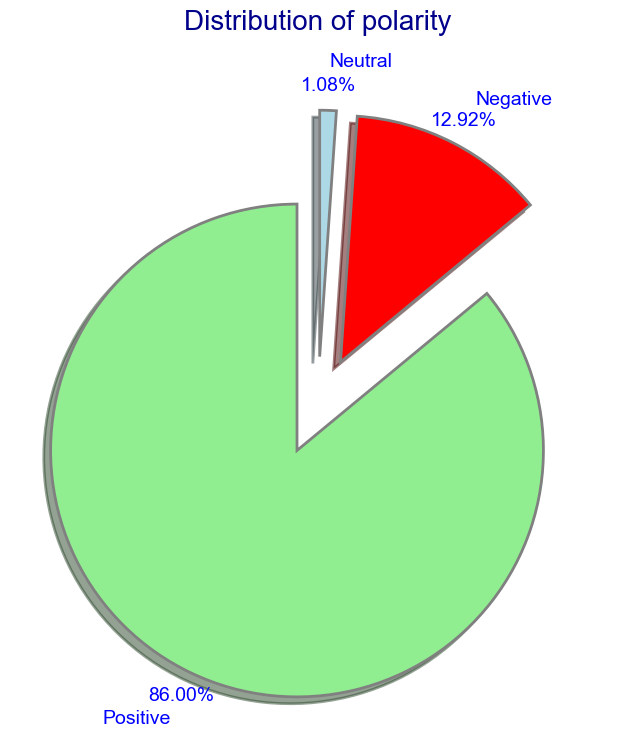

In [416]:
# Distribution of the sentiment analysis by Vander Sentiment
plot_pie(tweet['Analysis_VS'])

### RECAPITULATIF OF THE SENTIMENT ANALYSIS BY TextBlob and Vander Sentiment

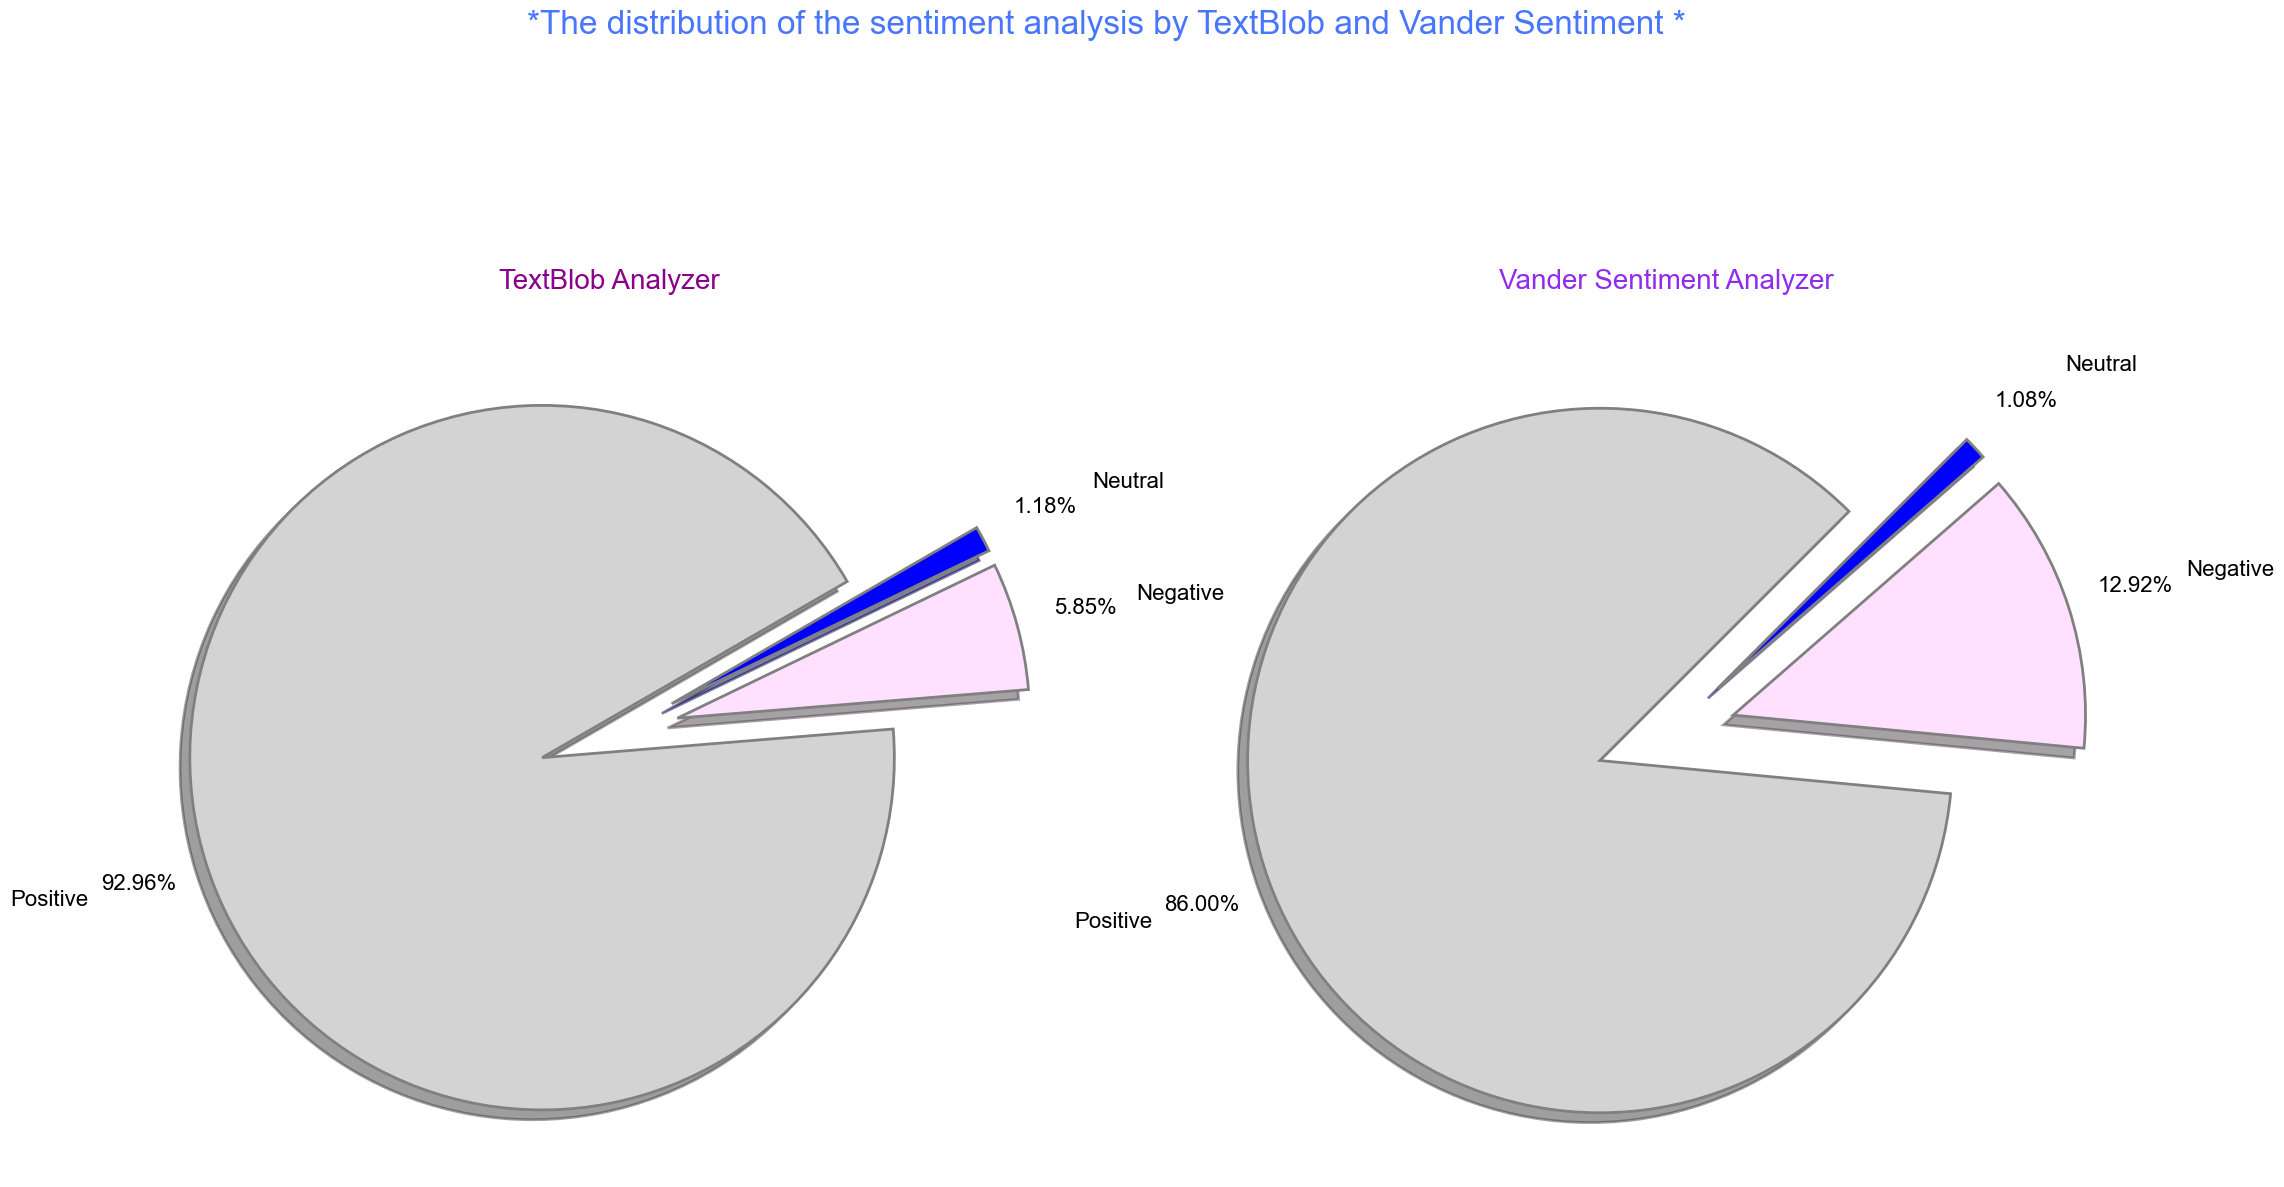

In [417]:
colors={'Positive':'lightgrey', 
        'Neutral':'blue',
        'Negative': '#FFE1FF'}

wp={'linewidth':2, 'edgecolor': 'grey'}
explode = (0.2,0.2,0.2)

fig,axs = plt.subplots(1,2)
fig.suptitle('*The distribution of the sentiment analysis by TextBlob and Vander Sentiment *',fontsize=24, color='#4876FF')

axs[0].pie(tweet['Analysis_TB'].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="black",fontsize = 16),pctdistance=1.2, labeldistance=1.35,
           labels=tweet['Analysis_TB'].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in tweet['Analysis_TB'].value_counts().keys()], 
           )
axs[0].set_title('TextBlob Analyzer', fontsize=20, color='#8B008B')

axs[1].pie(tweet['Analysis_VS'].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, 
           explode=explode, 
           textprops = dict(color ="black",fontsize = 16),pctdistance=1.2, labeldistance=1.35, 
           labels=tweet['Analysis_VS'].value_counts().keys(), 
           startangle=45, 
           colors=[colors[v] for v in tweet['Analysis_VS'].value_counts().keys()], 
           )
axs[1].set_title('Vander Sentiment Analyzer', fontsize=20, color='#912CEE')
plt.show()

## ---->  **Plotting the bar and pie graphs of the sentiment analysis by both Vander Sentiment and TextBlob, Shows that the positive sentiments are more than negative ones which can build understanding as people are very happy with NETFLIX'S service.**

### TEST THE SENTIMENT ANALYSIS MODELS ON A NEW TWEET EXAMPLES

In [418]:
# POSITIVE REVIEW
test = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
input_data = cleanTweets(test)

test1 = "I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it."
input_data1 = cleanTweets(test1)

test2 = "If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!"
input_data2 = cleanTweets(test2)

# TextBlob
print('* TextBlob Analyzer :')
pred_TB = TB_Polarity(input_data)
sent_TB = Sentiment_Analysis(pred_TB)
print ('\n  - prediction of test0 review using TextBlob is ',sent_TB , ', when we expect "POSITIVE" label.')
pred_TB1 = TB_Polarity(input_data1)
sent_TB1 = Sentiment_Analysis(pred_TB1)
print ('\n  - prediction of test1 review using TextBlob is ',sent_TB1 , ', when we expect "POSITIVE" label.')
pred_TB2 = TB_Polarity(input_data2)
sent_TB2 = Sentiment_Analysis(pred_TB2)
print ('\n  - prediction of test2 review using TextBlob is ',sent_TB2 , ', when we expect "POSITIVE" label.')

# Vander sentiment
print('\n* Vander sentiment Analyzer :')
pred_VS = SentimentIntensityAnalyzer().polarity_scores(input_data)
sent_VS =  VS_compoundsentiment(pred_VS)
print ('\n  - prediction of test0 review using Vander sentiment is ',sent_VS, ', when we expect "POSITIVE" label.')
pred_VS1 = SentimentIntensityAnalyzer().polarity_scores(input_data1)
sent_VS1 =  VS_compoundsentiment(pred_VS1)
print ('\n  - prediction of test1 review using Vander sentiment is ',sent_VS1, ', when we expect "POSITIVE" label.')
pred_VS2 = SentimentIntensityAnalyzer().polarity_scores(input_data2)
sent_VS2 =  VS_compoundsentiment(pred_VS2)
print ('\n  - prediction of test2 review using Vander sentiment is ',sent_VS2, ', when we expect "POSITIVE" label.')

* TextBlob Analyzer :

  - prediction of test0 review using TextBlob is  Positive , when we expect "POSITIVE" label.

  - prediction of test1 review using TextBlob is  Positive , when we expect "POSITIVE" label.

  - prediction of test2 review using TextBlob is  Positive , when we expect "POSITIVE" label.

* Vander sentiment Analyzer :

  - prediction of test0 review using Vander sentiment is  Negative , when we expect "POSITIVE" label.

  - prediction of test1 review using Vander sentiment is  Positive , when we expect "POSITIVE" label.

  - prediction of test2 review using Vander sentiment is  Positive , when we expect "POSITIVE" label.


**C\C :** 
  - TextBLOb got 3/3 correct sentiment analysis of the Positive Sentiment label 
  - Vander sentiment got 2/3 correct sentiment analysis of the Positive Sentiment label

In [419]:
# NEGATIVE REVIEW
test3 = "This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a continuous minute where there wasn't a fight with one monster or another. There was no chance for any character development, they were too busy running from one sword fight to another. I had no emotional attachment (except to the big bad machine that wanted to destroy them) <br /><br />Scenes were blatantly stolen from other movies, LOTR, Star Wars and Matrix. <br /><br />Examples<br /><br />>The ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda, Obee One and Vader. <br /><br />>The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings. (Elijah Wood is the victim in both films) and wait......it hypnotizes (stings) its victim and wraps them up.....uh hello????<br /><br />>And the whole machine vs. humans theme WAS the Matrix..or Terminator.....<br /><br />There are more examples but why waste the time? And will someone tell me what was with the Nazi's?!?! Nazi's???? <br /><br />There was a juvenile story line rushed to a juvenile conclusion. The movie could not decide if it was a children's movie or an adult movie and wasn't much of either. <br /><br />Just awful. A real disappointment to say the least. Save your money."
input_data3 = cleanTweets(test3)
test4 = "Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."
input_data4 = cleanTweets(test4)
test5 = " An awful film! It must have been up against some real stinkers to be nominated for the Golden Globe. They've taken the story of the first famous female Renaissance painter and mangled it beyond recognition. My complaint is not that they've taken liberties with the facts; if the story were good, that would perfectly fine. But it's simply bizarre -- by all accounts the true story of this artist would have made for a far better film, so why did they come up with this dishwater-dull script? I suppose there weren't enough naked people in the factual version. It's hurriedly capped off in the end with a summary of the artist's life -- we could have saved ourselves a couple of hours if they'd favored the rest of the film with same brevity."
input_data5 = cleanTweets(test5)

# TextBlob
print('* TextBlob Analyzer :')
pred_TB3 = TB_Polarity(input_data3)
sent_TB3 = Sentiment_Analysis(pred_TB3)
print ('\n  - prediction of test3 review using TextBlob is ',sent_TB3 , ', when we expect "NEGATIVE" label.')
pred_TB4 = TB_Polarity(input_data4)
sent_TB4 = Sentiment_Analysis(pred_TB4)
print ('\n  - prediction of test4 review using TextBlob is ',sent_TB4 , ', when we expect "NEGATIVE" label.')
pred_TB5 = TB_Polarity(input_data5)
sent_TB5 = Sentiment_Analysis(pred_TB5)
print ('\n  - prediction of test5 review using TextBlob is ',sent_TB5 , ', when we expect "NEGATIVE" label.')

# Vander sentiment
print('\n* Vander sentiment Analyzer :')
pred_VS3 = SentimentIntensityAnalyzer().polarity_scores(input_data3)
sent_VS3 =  VS_compoundsentiment(pred_VS3)
print ('\n  - prediction of test3 review using Vander sentiment is ',sent_VS3, ', when we expect "NEGATIVE" label.')
pred_VS4 = SentimentIntensityAnalyzer().polarity_scores(input_data4)
sent_VS4 =  VS_compoundsentiment(pred_VS4)
print ('\n  - prediction of test4 review using Vander sentiment is ',sent_VS4, ', when we expect "NEGATIVE" label.')
pred_VS5 = SentimentIntensityAnalyzer().polarity_scores(input_data5)
sent_VS5 =  VS_compoundsentiment(pred_VS5)
print ('\n  - prediction of test5 review using Vander sentiment is ',sent_VS5, ', when we expect "NEGATIVE" label.')

* TextBlob Analyzer :

  - prediction of test3 review using TextBlob is  Negative , when we expect "NEGATIVE" label.

  - prediction of test4 review using TextBlob is  Negative , when we expect "NEGATIVE" label.

  - prediction of test5 review using TextBlob is  Positive , when we expect "NEGATIVE" label.

* Vander sentiment Analyzer :

  - prediction of test3 review using Vander sentiment is  Negative , when we expect "NEGATIVE" label.

  - prediction of test4 review using Vander sentiment is  Negative , when we expect "NEGATIVE" label.

  - prediction of test5 review using Vander sentiment is  Positive , when we expect "NEGATIVE" label.


**C\C :** 
  - TextBLOb got 2/3 correct sentiment analysis of the Negative Sentiment label 
  - Vander sentiment got 2/3 correct sentiment analysis of the Positive Sentiment label

### **All in all: It appears that the TextBlob sentiment analyzer is more accurate than the Vander Sentiment.** 
### -----> So We'll use it from now on as our sentiment analyzer. 

# 5. ACCURACY ANALYSIS

### Since the results differ from a classifier to another. It is important to estimate the accuracy of each sentiment analysis in order to be able to determine the most suited one to our project.
To do so, We will split the data (training and testing) and build a machine learning model 

In [420]:
X=tweet['cleaned_Content']
y1=tweet['Analysis_TB']
y2=tweet['Analysis_VS']

### SPLITTING and TRAINING DATA

In [421]:
# I'll use 30% of the data to test the model and the remaning 70% is kept for training
from sklearn.model_selection import train_test_split
# TextBlob
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, y1, test_size=0.3, random_state=1)
print ('--> X_Train infos -TextBlob sentiment analysis-:\n')
X_train1.info()
print ('\n--> X_Test infos -TextBlob sentiment analysis-:\n')
X_test1.info()

--> X_Train infos -TextBlob sentiment analysis-:

<class 'pandas.core.series.Series'>
Int64Index: 21832 entries, 18609 to 29733
Series name: cleaned_Content
Non-Null Count  Dtype 
--------------  ----- 
21832 non-null  object
dtypes: object(1)
memory usage: 341.1+ KB

--> X_Test infos -TextBlob sentiment analysis-:

<class 'pandas.core.series.Series'>
Int64Index: 9357 entries, 8222 to 10212
Series name: cleaned_Content
Non-Null Count  Dtype 
--------------  ----- 
9357 non-null   object
dtypes: object(1)
memory usage: 146.2+ KB


In [422]:
# Vander Sentiment
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y2, test_size=0.3, random_state=1)
print ('--> X_Train infos -Vander sentiment analysis-:\n')
X_train2.info()
print ('\n--> X_Test infos -Vander sentiment analysis-:\n')
X_test2.info()

--> X_Train infos -Vander sentiment analysis-:

<class 'pandas.core.series.Series'>
Int64Index: 21832 entries, 18609 to 29733
Series name: cleaned_Content
Non-Null Count  Dtype 
--------------  ----- 
21832 non-null  object
dtypes: object(1)
memory usage: 341.1+ KB

--> X_Test infos -Vander sentiment analysis-:

<class 'pandas.core.series.Series'>
Int64Index: 9357 entries, 8222 to 10212
Series name: cleaned_Content
Non-Null Count  Dtype 
--------------  ----- 
9357 non-null   object
dtypes: object(1)
memory usage: 146.2+ KB


### Transforming Dataset using TF-IDF Vectorizer

In [423]:
# Transforming text to feature vectors (that can be used as input to estimator)
# TF-IDF (short for term frequency-inverse document frequency): statistical measure used to evaluate the importance of a word to a document in a collection or corpus.
from sklearn.feature_extraction.text import TfidfVectorizer # Feature extraction
tfidf_vector = TfidfVectorizer()
# TextBlob
tfidf_V_X_train1 = tfidf_vector.fit_transform(X_train1)
tfidf_V_X_test1 = tfidf_vector.transform(X_test1)
# Vander Sentiment
tfidf_V_X_train2 = tfidf_vector.fit_transform(X_train2)
tfidf_V_X_test2 = tfidf_vector.transform(X_test2)

In [424]:
# vectorized training data shapes
print(tfidf_V_X_train1.shape)
print(tfidf_V_X_train2.shape)

(21832, 24799)
(21832, 24799)


### MODEL BUILDING

In [425]:
def Evaluate_model(model,X_test,Y_test):
    '''
    Function to determine :
    - Accuracy
    - Classification report
    - Confusion Matrix
    '''
    y_pred = model.predict(X_test)
    print("\033[1m- The Accuracy of the model {}  is:\033[0m {}  %".format(model,(accuracy_score(Y_test,y_pred))*100))
    # this is the way to type bold text : \033[1m 'type here your text' \033[0m
    print("\n\033[1m- Classification report and Confusion Matrix of the model {}:\033[0m\n \n {} ".format(model,classification_report(Y_test, y_pred)))
    conf_matrix = confusion_matrix(Y_test, y_pred)
    polarity  = ['Negative','Neutral','Positive']
    group_labels = ['True Neg','False Neut','True Pos','False Neg','True Neut','False Pos','True Neg','False Neut','True Pos']
    group_percent = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_labels,group_percent)]
    labels = np.asarray(labels).reshape(3,3)

    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(conf_matrix,ax=ax, annot = labels, cmap = 'BuPu',fmt = '',xticklabels = polarity, yticklabels = polarity)

    plt.xlabel("Predicted values", fontdict = {'size':18}, labelpad = 18, color= 'purple')
    plt.ylabel("Actual values"   , fontdict = {'size':18}, labelpad = 18, color= 'crimson')
    plt.title (' -----< Confusion Matrix >----- \n', color= 'mediumblue', fontdict = {'size':25}, pad = 20)
    

- ### 1. DATASET ANALYZED BY TextBlob

###  Naive Bayes model

- The Accuracy of the model MultinomialNB()  is: 93.83473799926712  %


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



- Classification report and Confusion Matrix of the model MultinomialNB():
 
               precision    recall  f1-score   support

    Negative       0.99      0.17      0.30      1302
     Neutral       0.00      0.00      0.00       269
    Positive       0.94      1.00      0.97     20261

    accuracy                           0.94     21832
   macro avg       0.64      0.39      0.42     21832
weighted avg       0.93      0.94      0.92     21832
 


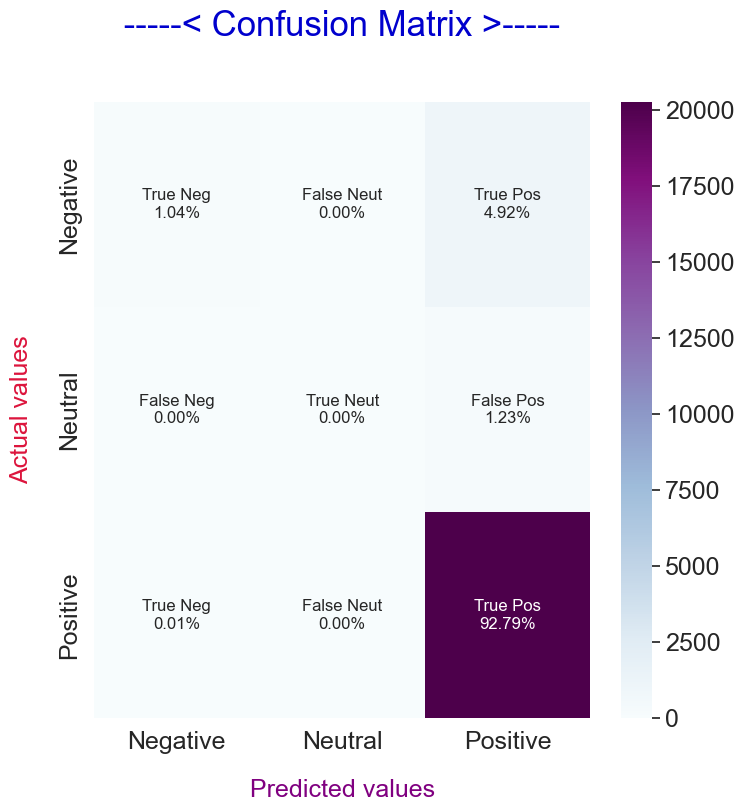

In [426]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(tfidf_V_X_train1, Y_train1)
Evaluate_model(NB_model,tfidf_V_X_train1,Y_train1 )

###  Logistics Regression model

- The Accuracy of the model LogisticRegression(max_iter=29600, random_state=0)  is: 96.96317332356175  %

- Classification report and Confusion Matrix of the model LogisticRegression(max_iter=29600, random_state=0):
 
               precision    recall  f1-score   support

    Negative       0.97      0.63      0.76      1302
     Neutral       0.93      0.43      0.59       269
    Positive       0.97      1.00      0.98     20261

    accuracy                           0.97     21832
   macro avg       0.96      0.69      0.78     21832
weighted avg       0.97      0.97      0.97     21832
 


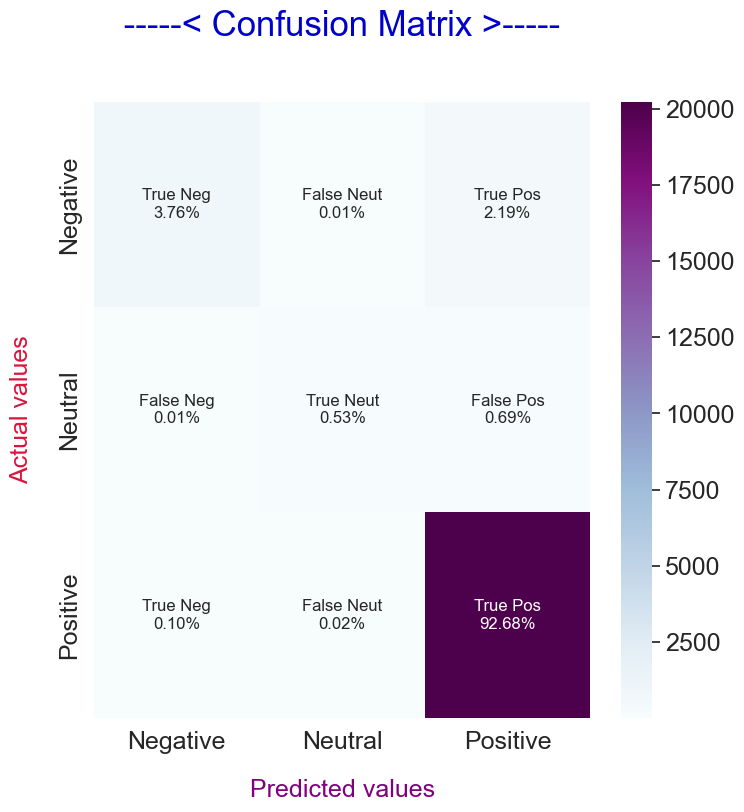

In [427]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='lbfgs',max_iter=29600,random_state=0)
LR_model.fit(tfidf_V_X_train1, Y_train1)
Evaluate_model(LR_model,tfidf_V_X_train1,Y_train1)

### Random Forest model

- The Accuracy of the model RandomForestClassifier(criterion='entropy', min_samples_split=13,
                       random_state=0)  is: 99.22132649322096  %

- Classification report and Confusion Matrix of the model RandomForestClassifier(criterion='entropy', min_samples_split=13,
                       random_state=0):
 
               precision    recall  f1-score   support

    Negative       1.00      0.89      0.94      1302
     Neutral       0.98      0.90      0.94       269
    Positive       0.99      1.00      1.00     20261

    accuracy                           0.99     21832
   macro avg       0.99      0.93      0.96     21832
weighted avg       0.99      0.99      0.99     21832
 


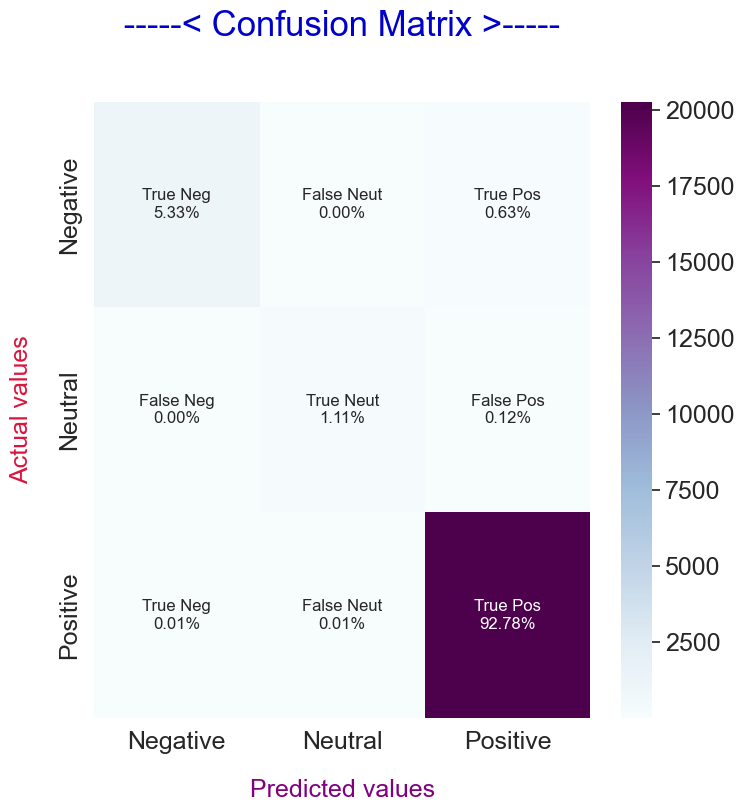

In [428]:
# Training and testing 
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(criterion = 'entropy',min_samples_split=13, random_state=0)
RF_model.fit(tfidf_V_X_train1, Y_train1)
Evaluate_model(RF_model,tfidf_V_X_train1,Y_train1)

- ### 2. DATASET ANALYZED BY Vander Sentiment

###  Naive Bayes model

- The Accuracy of the model MultinomialNB()  is: 87.10608281421767  %


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



- Classification report and Confusion Matrix of the model MultinomialNB():
 
               precision    recall  f1-score   support

    Negative       0.94      0.10      0.18      2845
     Neutral       0.00      0.00      0.00       244
    Positive       0.87      1.00      0.93     18743

    accuracy                           0.87     21832
   macro avg       0.60      0.37      0.37     21832
weighted avg       0.87      0.87      0.82     21832
 


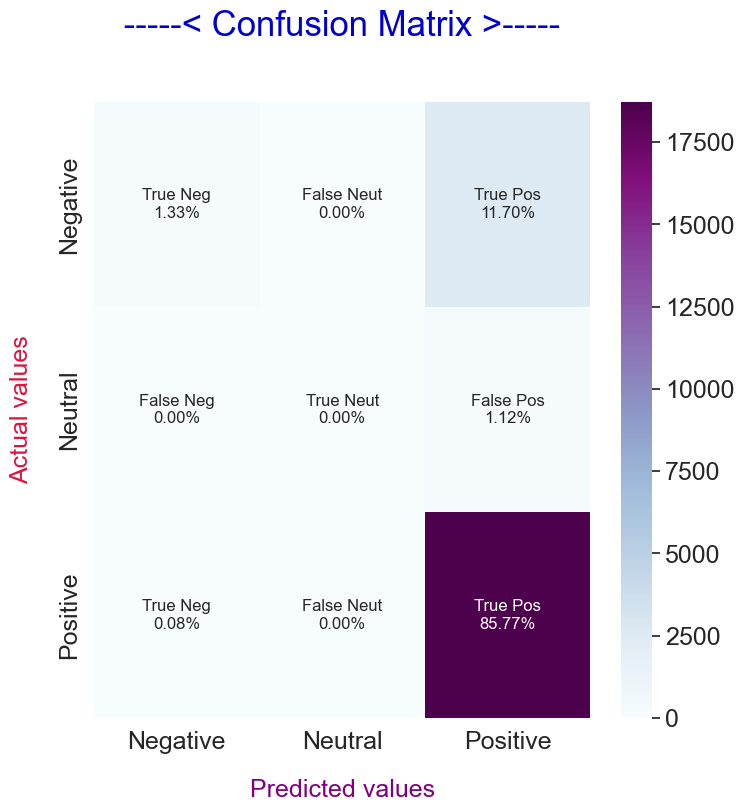

In [429]:
NB_model.fit(tfidf_V_X_train2, Y_train2)
Evaluate_model(NB_model,tfidf_V_X_train2,Y_train2 )

###  Logistics Regression model

- The Accuracy of the model LogisticRegression(max_iter=29600, random_state=0)  is: 94.81953096372297  %

- Classification report and Confusion Matrix of the model LogisticRegression(max_iter=29600, random_state=0):
 
               precision    recall  f1-score   support

    Negative       0.95      0.69      0.80      2845
     Neutral       0.92      0.32      0.48       244
    Positive       0.95      1.00      0.97     18743

    accuracy                           0.95     21832
   macro avg       0.94      0.67      0.75     21832
weighted avg       0.95      0.95      0.94     21832
 


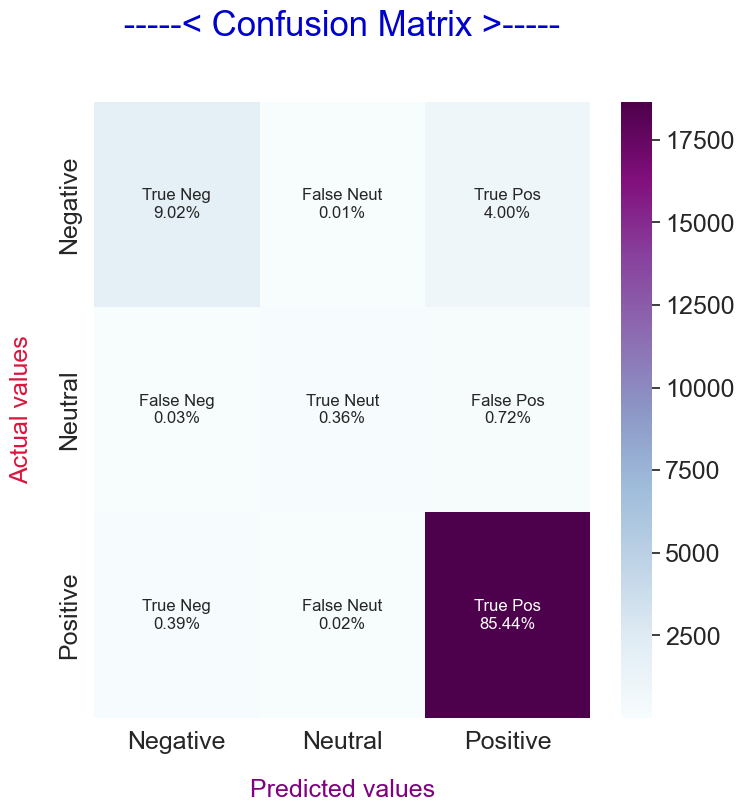

In [430]:
LR_model.fit(tfidf_V_X_train2, Y_train2)
Evaluate_model(LR_model,tfidf_V_X_train2,Y_train2)

### Random Forest model

- The Accuracy of the model RandomForestClassifier(criterion='entropy', min_samples_split=13,
                       random_state=0)  is: 99.20300476364969  %

- Classification report and Confusion Matrix of the model RandomForestClassifier(criterion='entropy', min_samples_split=13,
                       random_state=0):
 
               precision    recall  f1-score   support

    Negative       0.99      0.96      0.97      2845
     Neutral       0.99      0.86      0.92       244
    Positive       0.99      1.00      1.00     18743

    accuracy                           0.99     21832
   macro avg       0.99      0.94      0.96     21832
weighted avg       0.99      0.99      0.99     21832
 


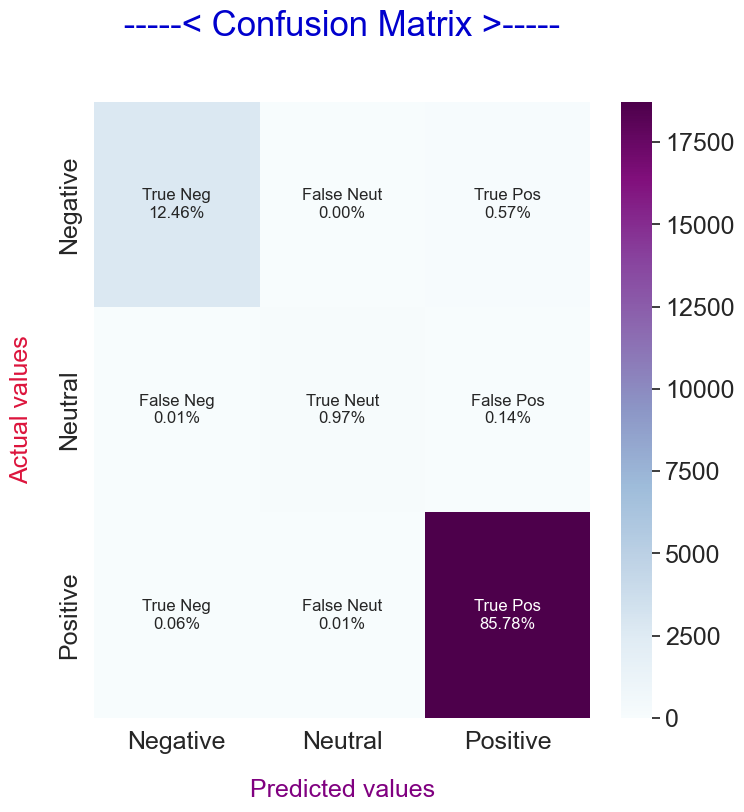

In [431]:
RF_model.fit(tfidf_V_X_train2, Y_train2)
Evaluate_model(RF_model,tfidf_V_X_train2,Y_train2)

In [432]:
#Resolve Naive Bayes zero division error
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix # used for accuarcy tests 
# 1.TextBlob
# Training  and testing Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(tfidf_V_X_train1, Y_train1)
y_predict_nb_tb = NB_model.predict(tfidf_V_X_test1)
print('- The Accuracy of the model Naive Bayes + TextBlob is: {} %'.format((accuracy_score(Y_test1, y_predict_nb_tb))*100))
## print report
cf_nb=classification_report(Y_test1,y_predict_nb_tb,labels=np.unique(y_predict_nb_tb))
print("\n- Classification report of the model Naive Bayes:\n ",cf_nb)
  
  ## We used labels=np.unique(y_predict_nb_tb) so that we won't get this error : UndefinedMetricWarning: Precision and F-score are ill-defined 
  ## \and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior. 
  ## Without specifing that syntax we can see that F-value for Neutral label is 0 for precision, recall and f1-score.


# 2. Using Vander Sentiment
# Training Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(tfidf_V_X_train2, Y_train2)
y_predict_nb_vs = NB_model.predict(tfidf_V_X_test2)
print('- The Accuracy of the model Naive Bayes + Vander Sentiment is: {} %'.format((accuracy_score(Y_test1, y_predict_nb_vs))*100))
## print report
cf_nb=classification_report(Y_test2,y_predict_nb_vs,labels=np.unique(y_predict_nb_vs))
print("\n- Classification report of the model Naive Bayes:\n ",cf_nb)


- The Accuracy of the model Naive Bayes + TextBlob is: 94.15410922304157 %

- Classification report of the model Naive Bayes:
                precision    recall  f1-score   support

    Negative       0.93      0.16      0.27       524
    Positive       0.94      1.00      0.97      8733

   micro avg       0.94      0.95      0.95      9257
   macro avg       0.94      0.58      0.62      9257
weighted avg       0.94      0.95      0.93      9257

- The Accuracy of the model Naive Bayes + Vander Sentiment is: 94.22891952548895 %

- Classification report of the model Naive Bayes:
                precision    recall  f1-score   support

    Negative       0.92      0.08      0.15      1184
    Positive       0.87      1.00      0.93      8079

   micro avg       0.87      0.88      0.88      9263
   macro avg       0.89      0.54      0.54      9263
weighted avg       0.88      0.88      0.83      9263



In [433]:
# Gather all the predictions and compare them to the original data
PREDICT_TextBlob = pd.DataFrame()
PREDICT_VanderSent = pd.DataFrame()

# TextBlob
PREDICT_TextBlob['Test_Tweet'] = X_test1
PREDICT_TextBlob['TextBlob'] = Y_test1
PREDICT_TextBlob['NaiveBayes_TextBlob'] = NB_model.predict(tfidf_V_X_test1)
PREDICT_TextBlob['LogisticReg_TextBlob'] = LR_model.predict(tfidf_V_X_test1)
PREDICT_TextBlob['RandomForest_TextBlob'] = RF_model.predict(tfidf_V_X_test1)
display(PREDICT_TextBlob)
# Vander Sentiment
PREDICT_VanderSent['Test_Tweet'] = X_test2
PREDICT_VanderSent['VanderSent'] = Y_test2
PREDICT_VanderSent['NaiveBayes_VanderSent'] = NB_model.predict(tfidf_V_X_test2)
PREDICT_VanderSent['LogisticReg_VanderSent'] = LR_model.predict(tfidf_V_X_test2)
PREDICT_VanderSent['RandomForest_VanderSent'] = RF_model.predict(tfidf_V_X_test2)
display(PREDICT_VanderSent)

Test_Tweet  TextBlob  \
8222   extraction good old clean action movie steroid...  Positive   
21131  watching movie sometimes annoying netflix seem...  Negative   
29422                                 good movie netflix  Positive   
2403   madea homecoming good axx movie …… laughin dam...  Positive   
22627  watched robin williams movie world greatest da...  Positive   
...                                                  ...       ...   
871    never mind subtitle reserve serious film anyon...  Negative   
14846  netflix movie receives good rating netflix ver...  Positive   
5962   something good come controversy jd vances hill...  Positive   
12880  oh look found recently movie based true story ...  Positive   
10212  hate spend hour trying find movie netflix soun...  Negative   

      NaiveBayes_TextBlob LogisticReg_TextBlob RandomForest_TextBlob  
8222             Positive             Positive              Positive  
21131            Positive             Positive              Positive  
29422            Positive             Positive              Positive  
2403             Positive             Positive              Positive  
22627            Positive             Positive              Positive  
...                   ...                  ...                   ...  
871              Positive             Negative              Negative  
14846            Positive             Positive              Positive  
5962             Positive             Positive              Positive  
12880            Positive             Positive              Positive  
10212            Positive             Negative              Negative  

[9357 rows x 5 columns]

Test_Tweet VanderSent  \
8222   extraction good old clean action movie steroid...   Positive   
21131  watching movie sometimes annoying netflix seem...   Positive   
29422                                 good movie netflix   Positive   
2403   madea homecoming good axx movie …… laughin dam...   Negative   
22627  watched robin williams movie world greatest da...   Positive   
...                                                  ...        ...   
871    never mind subtitle reserve serious film anyon...   Negative   
14846  netflix movie receives good rating netflix ver...   Positive   
5962   something good come controversy jd vances hill...   Negative   
12880  oh look found recently movie based true story ...   Positive   
10212  hate spend hour trying find movie netflix soun...   Negative   

      NaiveBayes_VanderSent LogisticReg_VanderSent RandomForest_VanderSent  
8222               Positive               Positive                Positive  
21131              Positive               Positive                Positive  
29422              Positive               Positive                Positive  
2403               Positive               Positive                Positive  
22627              Positive               Positive                Positive  
...                     ...                    ...                     ...  
871                Positive               Negative                Negative  
14846              Positive               Positive                Positive  
5962               Positive               Positive                Positive  
12880              Positive               Positive                Positive  
10212              Positive               Negative                Negative  

[9357 rows x 5 columns]

In [434]:
# Export english dataframe into a CSV
PREDICT_VanderSent.to_csv('dataset/Vandersent.csv', sep=',', index=False)
PREDICT_TextBlob.to_csv('dataset/TextBlob.csv', sep=',', index=False)

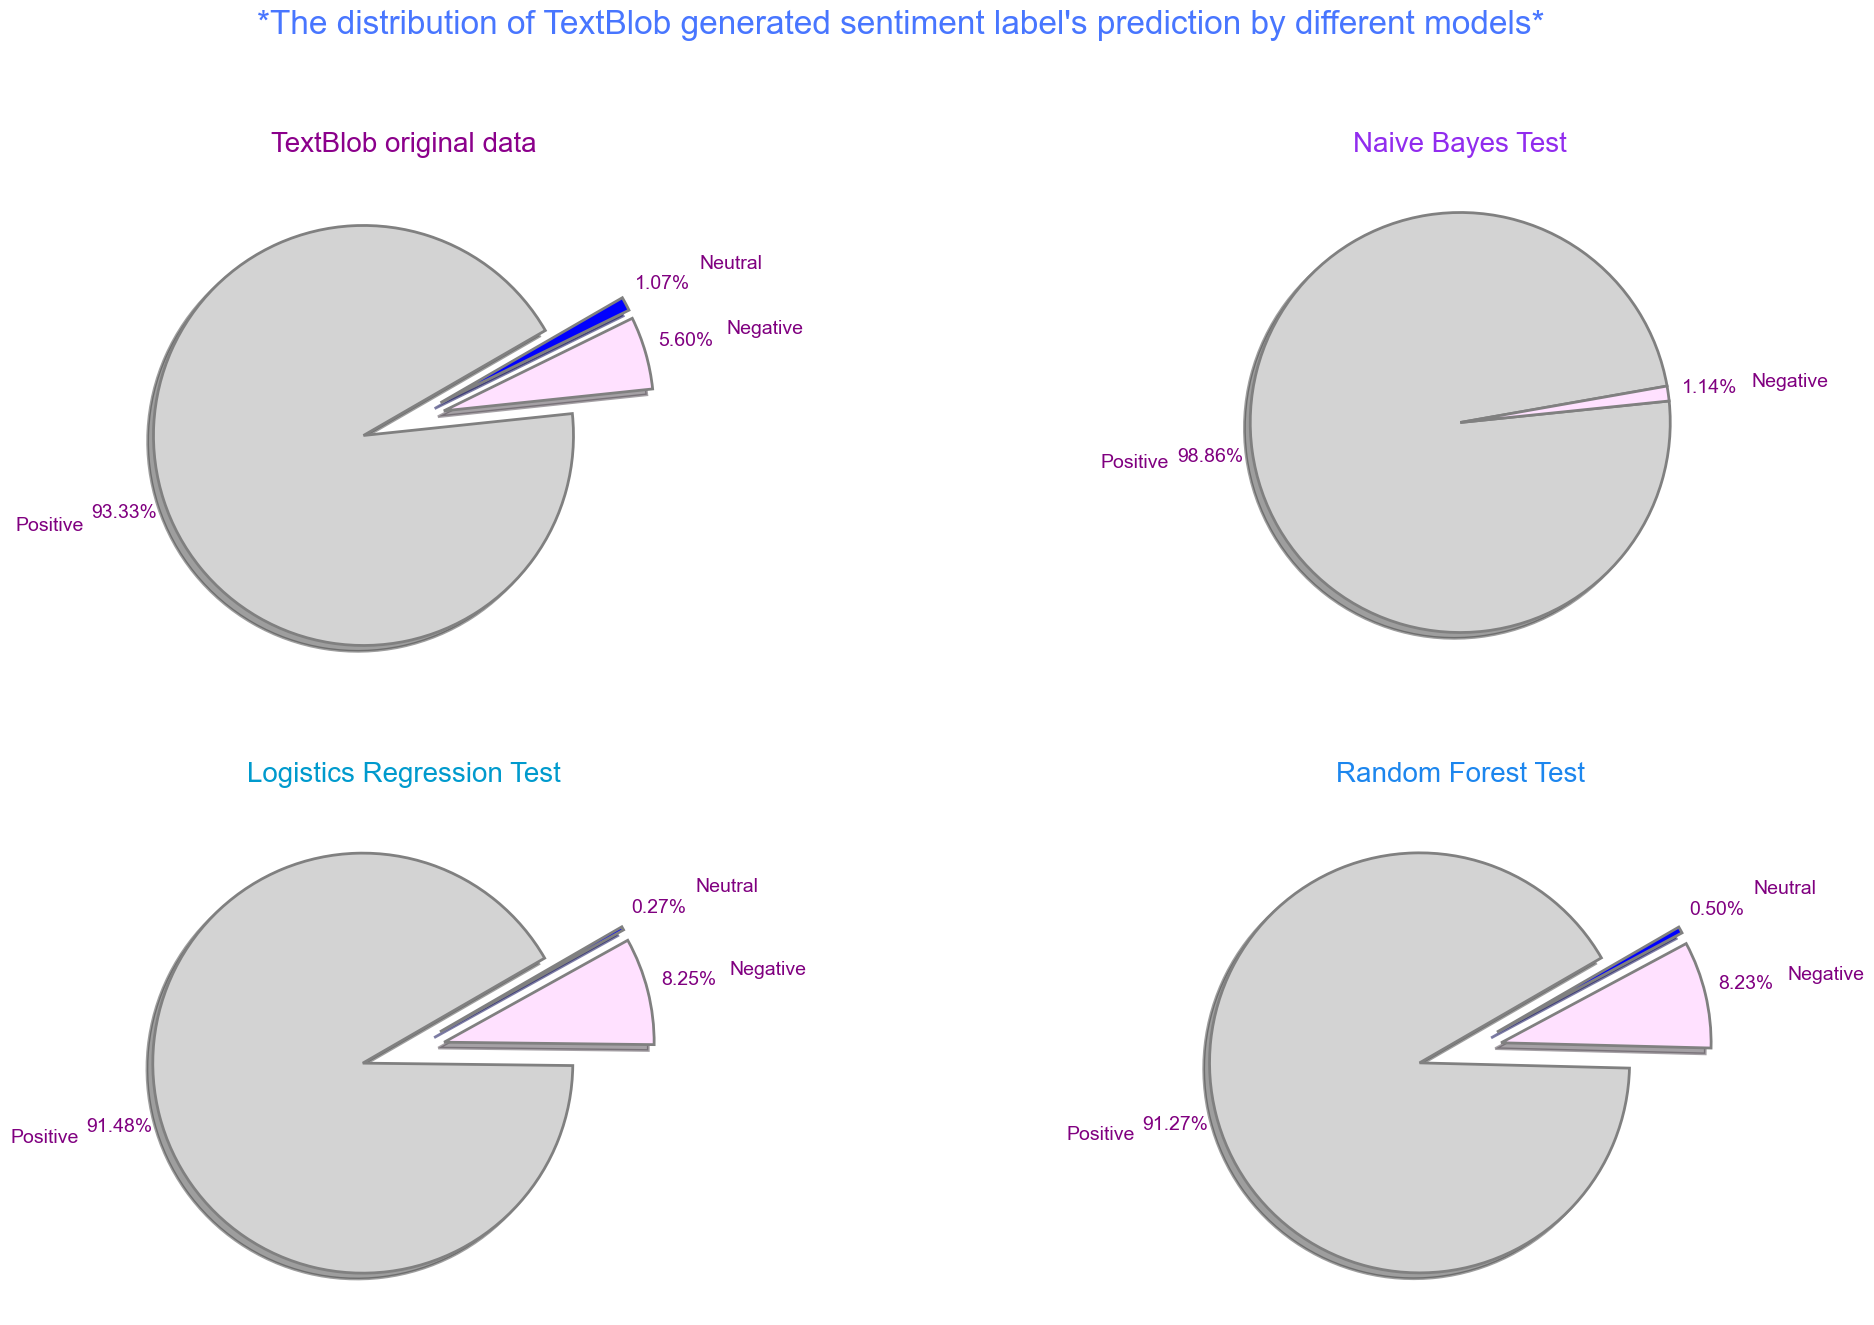

In [435]:
# The distribution of TextBlob generated sentiment label's prediction by different models

colors={'Positive':'lightgrey', 
        'Neutral':'blue',
        'Negative': '#FFE1FF'}

wp={'linewidth':2, 'edgecolor': 'grey'}
explode = (0.2,0.2,0.2)

fig,axs = plt.subplots(2,2)
fig.suptitle("*The distribution of TextBlob generated sentiment label's prediction by different models*",fontsize=24, color='#4876FF')

axs[0,0].pie(PREDICT_TextBlob["TextBlob"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4,
           labels=PREDICT_TextBlob["TextBlob"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_TextBlob['TextBlob'].value_counts().keys()], 
           )
axs[0,0].set_title('TextBlob original data', fontsize=20, color='#8B008B')

axs[0,1].pie(PREDICT_TextBlob["NaiveBayes_TextBlob"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, 
           explode=None, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4, 
           labels=PREDICT_TextBlob["NaiveBayes_TextBlob"].value_counts().keys(), 
           startangle=10, 
           colors=[colors[v] for v in PREDICT_TextBlob["NaiveBayes_TextBlob"].value_counts().keys()], 
           )
axs[0,1].set_title('Naive Bayes Test', fontsize=20, color='#912CEE')
axs[1,0].pie(PREDICT_TextBlob["LogisticReg_TextBlob"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4, 
           labels=PREDICT_TextBlob["LogisticReg_TextBlob"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_TextBlob["LogisticReg_TextBlob"].value_counts().keys()], 
           )
axs[1,0].set_title('Logistics Regression Test', fontsize=20, color='#009ACD')
axs[1,1].pie(PREDICT_TextBlob["RandomForest_TextBlob"].value_counts(), autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4,
           labels=PREDICT_TextBlob["RandomForest_TextBlob"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_TextBlob["RandomForest_TextBlob"].value_counts().keys()], 
           )
axs[1,1].set_title('Random Forest Test', fontsize=20, color='#1C86EE')

plt.rc('font', size= 15)
plt.show() 

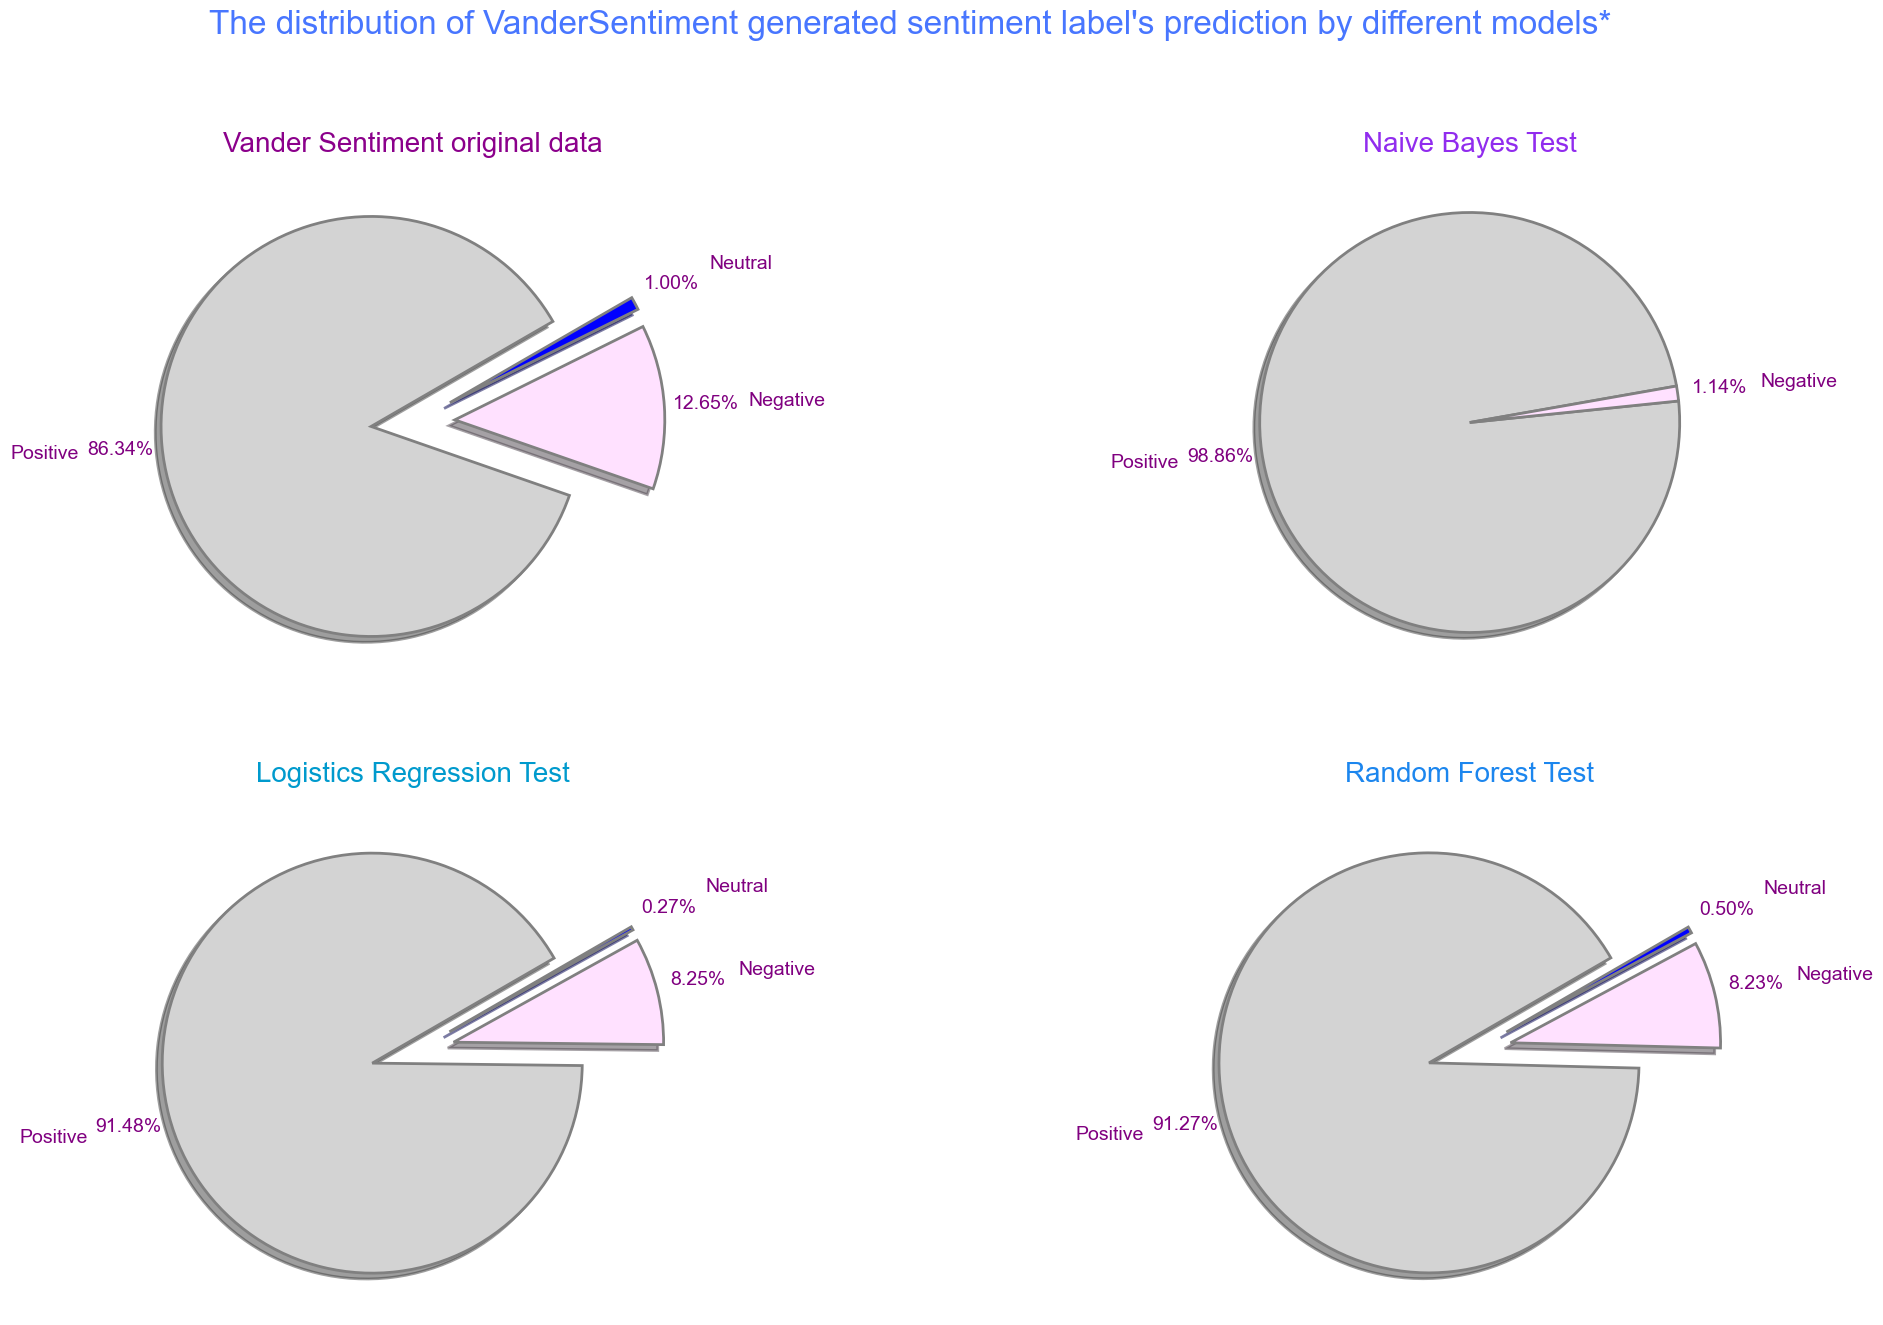

In [436]:
# The distribution of VanderSentiment generated sentiment label's prediction by different models

colors={'Positive':'lightgrey', 
        'Neutral':'blue',
        'Negative': '#FFE1FF'}

wp={'linewidth':2, 'edgecolor': 'grey'}
explode = (0.2,0.2,0.2)

fig,axs = plt.subplots(2,2)
fig.suptitle("The distribution of VanderSentiment generated sentiment label's prediction by different models*",fontsize=24, color='#4876FF')

axs[0,0].pie(PREDICT_VanderSent["VanderSent"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4,
           labels=PREDICT_VanderSent["VanderSent"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_VanderSent['VanderSent'].value_counts().keys()], 
           )
axs[0,0].set_title('Vander Sentiment original data', fontsize=20, color='#8B008B')

axs[0,1].pie(PREDICT_VanderSent["NaiveBayes_VanderSent"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, 
           explode=None, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4, 
           labels=PREDICT_VanderSent["NaiveBayes_VanderSent"].value_counts().keys(), 
           startangle=10, 
           colors=[colors[v] for v in PREDICT_VanderSent["NaiveBayes_VanderSent"].value_counts().keys()], 
           )
axs[0,1].set_title('Naive Bayes Test', fontsize=20, color='#912CEE')
axs[1,0].pie(PREDICT_VanderSent["LogisticReg_VanderSent"].value_counts(),autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4, 
           labels=PREDICT_VanderSent["LogisticReg_VanderSent"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_VanderSent["LogisticReg_VanderSent"].value_counts().keys()], 
           )
axs[1,0].set_title('Logistics Regression Test', fontsize=20, color='#009ACD')
axs[1,1].pie(PREDICT_VanderSent["RandomForest_VanderSent"].value_counts(), autopct='%1.2f%%', shadow=True,wedgeprops=wp, explode=explode, 
           textprops = dict(color ="purple",fontsize = 14),pctdistance=1.2, labeldistance=1.4,
           labels=PREDICT_VanderSent["RandomForest_VanderSent"].value_counts().keys(), 
           startangle=30, 
           colors=[colors[v] for v in PREDICT_VanderSent["RandomForest_VanderSent"].value_counts().keys()], 
           )
axs[1,1].set_title('Random Forest Test', fontsize=20, color='#1C86EE')

plt.rc('font', size= 15)
plt.show() 

## We conclude that Random Forest is the best fitting Model to the Sentiment analysis (Accuracy of 99%)

### Saving model and tfidf_vectorizer

In [437]:
# after the machine learning models was created by scikitlearn library
# NOw, I'll Save the machine learning model to disk
import pickle # process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.

saved_model1 = pickle.dump(NB_model,open('./Models/model_NaiveBayes.pkl', 'wb')) 
saved_model2 = pickle.dump(LR_model,open('./Models/model_LogisticRegression.pkl', 'wb')) 
saved_model3 = pickle.dump(RF_model,open('./Models/model_RandomForest.pkl', 'wb'))

# w denotes file needs to be opened in write mode and b denotes that this file object is a binary object
print('Model is successfully saved into the disk Using Pickle')

Model is successfully saved into the disk Using Pickle


In [438]:
# Save the tfidf_vector
pickle.dump(tfidf_vector, open('./Models/tfidfvect.pkl', 'wb'))
print('tfidf_vectorizer is successfully saved into the disk Using Pickle')

tfidf_vectorizer is successfully saved into the disk Using Pickle


In [439]:
# load the machine learning model NAIVE BAYES from the disk
loaded_model1 = pickle.load(open('./Models/model_NaiveBayes.pkl', 'rb'))
result1 = loaded_model1.predict(tfidf_V_X_test1)
print('NAIVE BAYES :\n',result1)

# load the machine learning model Logistic Regression from the disk
loaded_model2 = pickle.load(open('./Models/model_LogisticRegression.pkl', 'rb'))
result2 = loaded_model2.predict(tfidf_V_X_test1)
print('Logistic Regression : \n',result2)

# load the machine learning model Random Forest from the disk
loaded_model3 = pickle.load(open('./Models/model_RandomForest.pkl', 'rb'))
result3 = loaded_model3.predict(tfidf_V_X_test1)
print('Random Forest : \n',result3)

NAIVE BAYES :
 ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']
Logistic Regression : 
 ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Negative']
Random Forest : 
 ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Negative']


In [440]:
# load the tfidf_vectorizer from the disk
tfidf_vect = pickle.load(open('./Models/tfidfvect.pkl', 'rb'))
text = "not a bad movie as I thought it would be, but not very impressive too.. just a good one time watch.#LaalSinghChaddha #Netflix https://t.co/c17ZiRpWdh"
vect= tfidf_vect.transform([text]).toarray()
vect

array([[0., 0., 0., ..., 0., 0., 0.]])

In [441]:
from sklearn import metrics # measures of quantitative assessment used for comparing and tracking performance or production.
# LogisticRegression
# save model
with open('./Models/model_LogisticRegression.pkl', 'wb') as f:
    pickle.dump(LR_model, f)

# load model
with open('./Models/model_LogisticRegression.pkl', 'rb') as f:
    loaded_model2 = pickle.load(f)

#Let’s see the accuracy score of the saved model (this is a step to make sure that the model was truly saved!)
# prediction
Y_pred2 = loaded_model2.predict(tfidf_V_X_test1)
print('Loaded_Model classifier LogisticRegression: Y_pred : ',Y_pred2, '\n')
print('Loaded_Model classifier LogisticRegression: The accuracy:', (accuracy_score(Y_test1, Y_pred2)*100), '%')

Loaded_Model classifier LogisticRegression: Y_pred :  ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Negative'] 

Loaded_Model classifier LogisticRegression: The accuracy: 92.2411029176018 %


In [442]:
# Naive Bayes
# save model
with open('./Models/model_NaiveBayes.pkl', 'wb') as f:
    pickle.dump(NB_model, f)

# load model
with open('./Models/model_NaiveBayes.pkl', 'rb') as f:
    loaded_model1 = pickle.load(f)

#Let’s see the accuracy score of the saved model (this is a step to make sure that the model was truly saved!)
# prediction
Y_pred1 = loaded_model1.predict(tfidf_V_X_test1)
print('Loaded_Model classifier NaiveBayes: Y_pred : ',Y_pred1, '\n')
print('Loaded_Model classifier NaiveBayes: The accuracy:', (accuracy_score(Y_test1, Y_pred1)*100), '%')

Loaded_Model classifier NaiveBayes: Y_pred :  ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive'] 

Loaded_Model classifier NaiveBayes: The accuracy: 94.22891952548895 %


In [443]:
# Random Forests
# save model
with open('./Models/model_RandomForest.pkl', 'wb') as f:
    pickle.dump(RF_model, f)

# load model
with open('./Models/model_RandomForest.pkl', 'rb') as f:
    loaded_model3 = pickle.load(f)

#Let’s see the accuracy score of the saved model (this is a step to make sure that the model was truly saved!)
# prediction
Y_pred3 = loaded_model3.predict(tfidf_V_X_test1)
print('Loaded_Model classifier Random Forests: Y_pred : ',Y_pred3, '\n')
print('Loaded_Model classifier Random Forests: The accuracy:', (accuracy_score(Y_test1, Y_pred3)*100), '%')

Loaded_Model classifier Random Forests: Y_pred :  ['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Negative'] 

Loaded_Model classifier Random Forests: The accuracy: 91.88842577749278 %


In [444]:
# TEST THE Saved MODELS ON A NEW TWEET EXAMPLES
# POSITIVE REVIEW
test = "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side."
input_data = cleanTweets(test)
input_data = [input_data]
test1 = "I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it."
input_data1 = cleanTweets(test1)
input_data1 = [input_data1]
test2 = "If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!"
input_data2 = cleanTweets(test2)
input_data2 = [input_data2]

# NaiveBayes
print("- Prediction of by NaiveBayes of 'Positive' TWEET:\n")
sent_NB= tfidf_vect.transform(input_data).toarray()
loaded_model1.predict(sent_NB)
print ('   * test 0 : ',loaded_model1.predict(sent_NB))
sent_NB1= tfidf_vect.transform(input_data1).toarray()
loaded_model1.predict(sent_NB1)
print('   * test 1 : ',loaded_model1.predict(sent_NB1))
sent_NB2= tfidf_vect.transform(input_data2).toarray()
loaded_model1.predict(sent_NB2)
print('   * test 2 : ',loaded_model1.predict(sent_NB2))

# LogisticRegression
print("\n- Prediction of by LogisticRegression of 'Positive' TWEET:\n")
sent_LR= tfidf_vect.transform(input_data).toarray()
loaded_model2.predict(sent_LR)
print('   * test 0 : ', loaded_model2.predict(sent_LR))
sent_LR1= tfidf_vect.transform(input_data1).toarray()
loaded_model2.predict(sent_LR1)
print('   * test 1 : ', loaded_model2.predict(sent_LR1))
sent_LR2= tfidf_vect.transform(input_data2).toarray()
loaded_model2.predict(sent_LR2)
print('   * test 2 : ', loaded_model2.predict(sent_LR2))

# RandomForest
print("\n- Prediction of by RandomForest of 'Positive' TWEET:\n")
sent_RF= tfidf_vect.transform(input_data).toarray()
loaded_model3.predict(sent_RF)
print('   * test 0 : ', loaded_model3.predict(sent_LR))
sent_RF1= tfidf_vect.transform(input_data1).toarray()
loaded_model3.predict(sent_RF1)
print('   * test 1 : ', loaded_model3.predict(sent_LR1))
sent_RF2= tfidf_vect.transform(input_data2).toarray()
loaded_model3.predict(sent_RF2)
print('   * test 2 : ', loaded_model3.predict(sent_RF2))

- Prediction of by NaiveBayes of 'Positive' TWEET:

   * test 0 :  ['Positive']
   * test 1 :  ['Positive']
   * test 2 :  ['Positive']

- Prediction of by LogisticRegression of 'Positive' TWEET:

   * test 0 :  ['Negative']
   * test 1 :  ['Positive']
   * test 2 :  ['Positive']

- Prediction of by RandomForest of 'Positive' TWEET:

   * test 0 :  ['Positive']
   * test 1 :  ['Positive']
   * test 2 :  ['Positive']


In [445]:
# NEGATIVE REVIEW
test3 = "This movie made it into one of my top 10 most awful movies. Horrible. <br /><br />There wasn't a continuous minute where there wasn't a fight with one monster or another. There was no chance for any character development, they were too busy running from one sword fight to another. I had no emotional attachment (except to the big bad machine that wanted to destroy them) <br /><br />Scenes were blatantly stolen from other movies, LOTR, Star Wars and Matrix. <br /><br />Examples<br /><br />>The ghost scene at the end was stolen from the final scene of the old Star Wars with Yoda, Obee One and Vader. <br /><br />>The spider machine in the beginning was exactly like Frodo being attacked by the spider in Return of the Kings. (Elijah Wood is the victim in both films) and wait......it hypnotizes (stings) its victim and wraps them up.....uh hello????<br /><br />>And the whole machine vs. humans theme WAS the Matrix..or Terminator.....<br /><br />There are more examples but why waste the time? And will someone tell me what was with the Nazi's?!?! Nazi's???? <br /><br />There was a juvenile story line rushed to a juvenile conclusion. The movie could not decide if it was a children's movie or an adult movie and wasn't much of either. <br /><br />Just awful. A real disappointment to say the least. Save your money."
input_data3 = cleanTweets(test3)
input_data3 = [input_data3]
test4 = "Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only."
input_data4 = cleanTweets(test4)
input_data4 = [input_data4]
test5 = " An awful film! It must have been up against some real stinkers to be nominated for the Golden Globe. They've taken the story of the first famous female Renaissance painter and mangled it beyond recognition. My complaint is not that they've taken liberties with the facts; if the story were good, that would perfectly fine. But it's simply bizarre -- by all accounts the true story of this artist would have made for a far better film, so why did they come up with this dishwater-dull script? I suppose there weren't enough naked people in the factual version. It's hurriedly capped off in the end with a summary of the artist's life -- we could have saved ourselves a couple of hours if they'd favored the rest of the film with same brevity."
input_data5 = cleanTweets(test5)
input_data5 = [input_data5]

# NaiveBayes
print("- Prediction of by NaiveBayes of 'Naegative' TWEET:\n")
sent_NB3= tfidf_vect.transform(input_data3).toarray()
loaded_model1.predict(sent_NB3)
print ('   * test 0 : ',loaded_model1.predict(sent_NB3))
sent_NB4= tfidf_vect.transform(input_data4).toarray()
loaded_model1.predict(sent_NB4)
print('   * test 1 : ',loaded_model1.predict(sent_NB4))
sent_NB5= tfidf_vect.transform(input_data5).toarray()
loaded_model1.predict(sent_NB5)
print('   * test 2 : ',loaded_model1.predict(sent_NB5))

# LogisticRegression
print("\n- Prediction of by LogisticRegression of 'Negative' TWEET:\n")
sent_LR3= tfidf_vect.transform(input_data3).toarray()
loaded_model2.predict(sent_LR3)
print('   * test 0 : ', loaded_model2.predict(sent_LR3))
sent_LR4= tfidf_vect.transform(input_data4).toarray()
loaded_model2.predict(sent_LR4)
print('   * test 1 : ', loaded_model2.predict(sent_LR4))
sent_LR5= tfidf_vect.transform(input_data5).toarray()
loaded_model2.predict(sent_LR5)
print('   * test 2 : ', loaded_model2.predict(sent_LR5))

# RandomForest
print("\n- Prediction of by RandomForest of 'Negative' TWEET:\n")
sent_RF3= tfidf_vect.transform(input_data3).toarray()
loaded_model3.predict(sent_RF3)
print('   * test 0 : ', loaded_model3.predict(sent_LR3))
sent_RF4= tfidf_vect.transform(input_data4).toarray()
loaded_model3.predict(sent_RF4)
print('   * test 1 : ', loaded_model3.predict(sent_LR4))
sent_RF5= tfidf_vect.transform(input_data5).toarray()
loaded_model3.predict(sent_RF5)
print('   * test 2 : ', loaded_model3.predict(sent_RF5))

- Prediction of by NaiveBayes of 'Naegative' TWEET:

   * test 0 :  ['Positive']
   * test 1 :  ['Positive']
   * test 2 :  ['Positive']

- Prediction of by LogisticRegression of 'Negative' TWEET:

   * test 0 :  ['Negative']
   * test 1 :  ['Negative']
   * test 2 :  ['Positive']

- Prediction of by RandomForest of 'Negative' TWEET:

   * test 0 :  ['Negative']
   * test 1 :  ['Positive']
   * test 2 :  ['Positive']


# Based on the results of different Machine learning models and sentiment analyzers, the best combination providing 99% prediction's accuracy is :
# --------------< TextBolb (Sentiment Analyzer) + Random Forest Classifier >--------

# 6. Prepare the final dataset for VISUALISATION
**ADD THE NEW COLUMNS (CLEANED TWEETS AND SENTIMENT LABELS) TO THE ORIGINAL DATAFRAME**

In [446]:
# Add the cleaned tweets and the sentiment labels to the dataset's dataframe
dataset['cleaned_Content']= tweet['cleaned_Content']
dataset['Sentiment'] = tweet['Analysis_TB']
dataset.head()

Datetime             Tweet_Id  \
0  2022-10-08 11:31:12+00:00  1578709591361490944   
1  2022-10-07 23:55:00+00:00  1578534389268434945   
2  2022-10-02 06:00:16+00:00  1576451984009285632   
3  2022-10-02 05:57:05+00:00  1576451183165984768   
4  2022-09-20 23:42:00+00:00  1572370522473627649   

                                             Content Language      Username  \
0  not a bad movie as I thought it would be, but ...       en  TheMuhandiss   
1  #Netflix movie of the day: El Camino: A Breaki...       en      flixboss   
2  Blonde wasn’t a bad movie on #Netflix but it c...       en    _jonguerra   
3  Not such a bad movie. I wished it had a little...       en      Triad718   
4  #Netflix movie of the day: El Camino: A Breaki...       en    FlixbossCA   

               User_id    User_location  \
0   978271725480808449               UK   
1   969241693206777859    United States   
2             52530575  Los Angeles, CA   
3  1483120397956653058        Bronx, NY   
4   970656598598307840           Canada   

                                     cleaned_Content Sentiment  
0  bad movie thought would impressive good time w...  Positive  
1  netflix movie day el camino breaking bad movie...  Negative  
2              blonde bad movie netflix could longer  Negative  
3  bad movie wished little punch umma definite sl...  Negative  
4  netflix movie day el camino breaking bad movie...  Negative

In [447]:
# save final preprocessed data as csv file
dataset.to_csv('dataset/Netflix_reputation_twitter.csv') 

# 7. VISUALISATION 

###  A. YEAR WISE ANALYSIS

In [448]:
dataset['Datetime'] = dataset['Datetime'].map(pd.to_datetime)
dataset['Year'] = dataset['Datetime'].dt.year
dataset.head()

Datetime             Tweet_Id  \
0 2022-10-08 11:31:12+00:00  1578709591361490944   
1 2022-10-07 23:55:00+00:00  1578534389268434945   
2 2022-10-02 06:00:16+00:00  1576451984009285632   
3 2022-10-02 05:57:05+00:00  1576451183165984768   
4 2022-09-20 23:42:00+00:00  1572370522473627649   

                                             Content Language      Username  \
0  not a bad movie as I thought it would be, but ...       en  TheMuhandiss   
1  #Netflix movie of the day: El Camino: A Breaki...       en      flixboss   
2  Blonde wasn’t a bad movie on #Netflix but it c...       en    _jonguerra   
3  Not such a bad movie. I wished it had a little...       en      Triad718   
4  #Netflix movie of the day: El Camino: A Breaki...       en    FlixbossCA   

               User_id    User_location  \
0   978271725480808449               UK   
1   969241693206777859    United States   
2             52530575  Los Angeles, CA   
3  1483120397956653058        Bronx, NY   
4   970656598598307840           Canada   

                                     cleaned_Content Sentiment  Year  
0  bad movie thought would impressive good time w...  Positive  2022  
1  netflix movie day el camino breaking bad movie...  Negative  2022  
2              blonde bad movie netflix could longer  Negative  2022  
3  bad movie wished little punch umma definite sl...  Negative  2022  
4  netflix movie day el camino breaking bad movie...  Negative  2022

In [482]:
df2 = dataset.groupby(["Year"]).count().reset_index()
df2[["Year","Username"]].to_csv("dataset/year.csv",index=False)

In [449]:
import plotly.express as px
fig = px.histogram(data_frame=dataset, x="Year", title="Tweets about Netflix over the last 10 years")

fig.show()

In [450]:
def count_rows(rows): 
    return len(rows)
dataset.groupby(['Year','Sentiment']).apply(count_rows)

Year  Sentiment
2012  Negative       41
      Neutral        15
      Positive     1020
2013  Negative      202
      Neutral        84
      Positive     4595
2014  Negative      139
      Neutral        58
      Positive     3393
2015  Negative       97
      Neutral        33
      Positive     2361
2016  Negative       63
      Neutral        23
      Positive     1737
2017  Negative       89
      Neutral        18
      Positive     1832
2018  Negative      159
      Neutral        27
      Positive     2911
2019  Negative      534
      Neutral        40
      Positive     2980
2020  Negative      224
      Neutral        32
      Positive     3643
2021  Negative      175
      Neutral        27
      Positive     2689
2022  Negative      102
      Neutral        11
      Positive     1775
dtype: int64

In [489]:
df2 = dataset.groupby(['Sentiment','Year']).apply(count_rows).reset_index()
df2

Sentiment  Year     0
0   Negative  2012    41
1   Negative  2013   202
2   Negative  2014   139
3   Negative  2015    97
4   Negative  2016    63
5   Negative  2017    89
6   Negative  2018   159
7   Negative  2019   534
8   Negative  2020   224
9   Negative  2021   175
10  Negative  2022   102
11   Neutral  2012    15
12   Neutral  2013    84
13   Neutral  2014    58
14   Neutral  2015    33
15   Neutral  2016    23
16   Neutral  2017    18
17   Neutral  2018    27
18   Neutral  2019    40
19   Neutral  2020    32
20   Neutral  2021    27
21   Neutral  2022    11
22  Positive  2012  1020
23  Positive  2013  4595
24  Positive  2014  3393
25  Positive  2015  2361
26  Positive  2016  1737
27  Positive  2017  1832
28  Positive  2018  2911
29  Positive  2019  2980
30  Positive  2020  3643
31  Positive  2021  2689
32  Positive  2022  1775

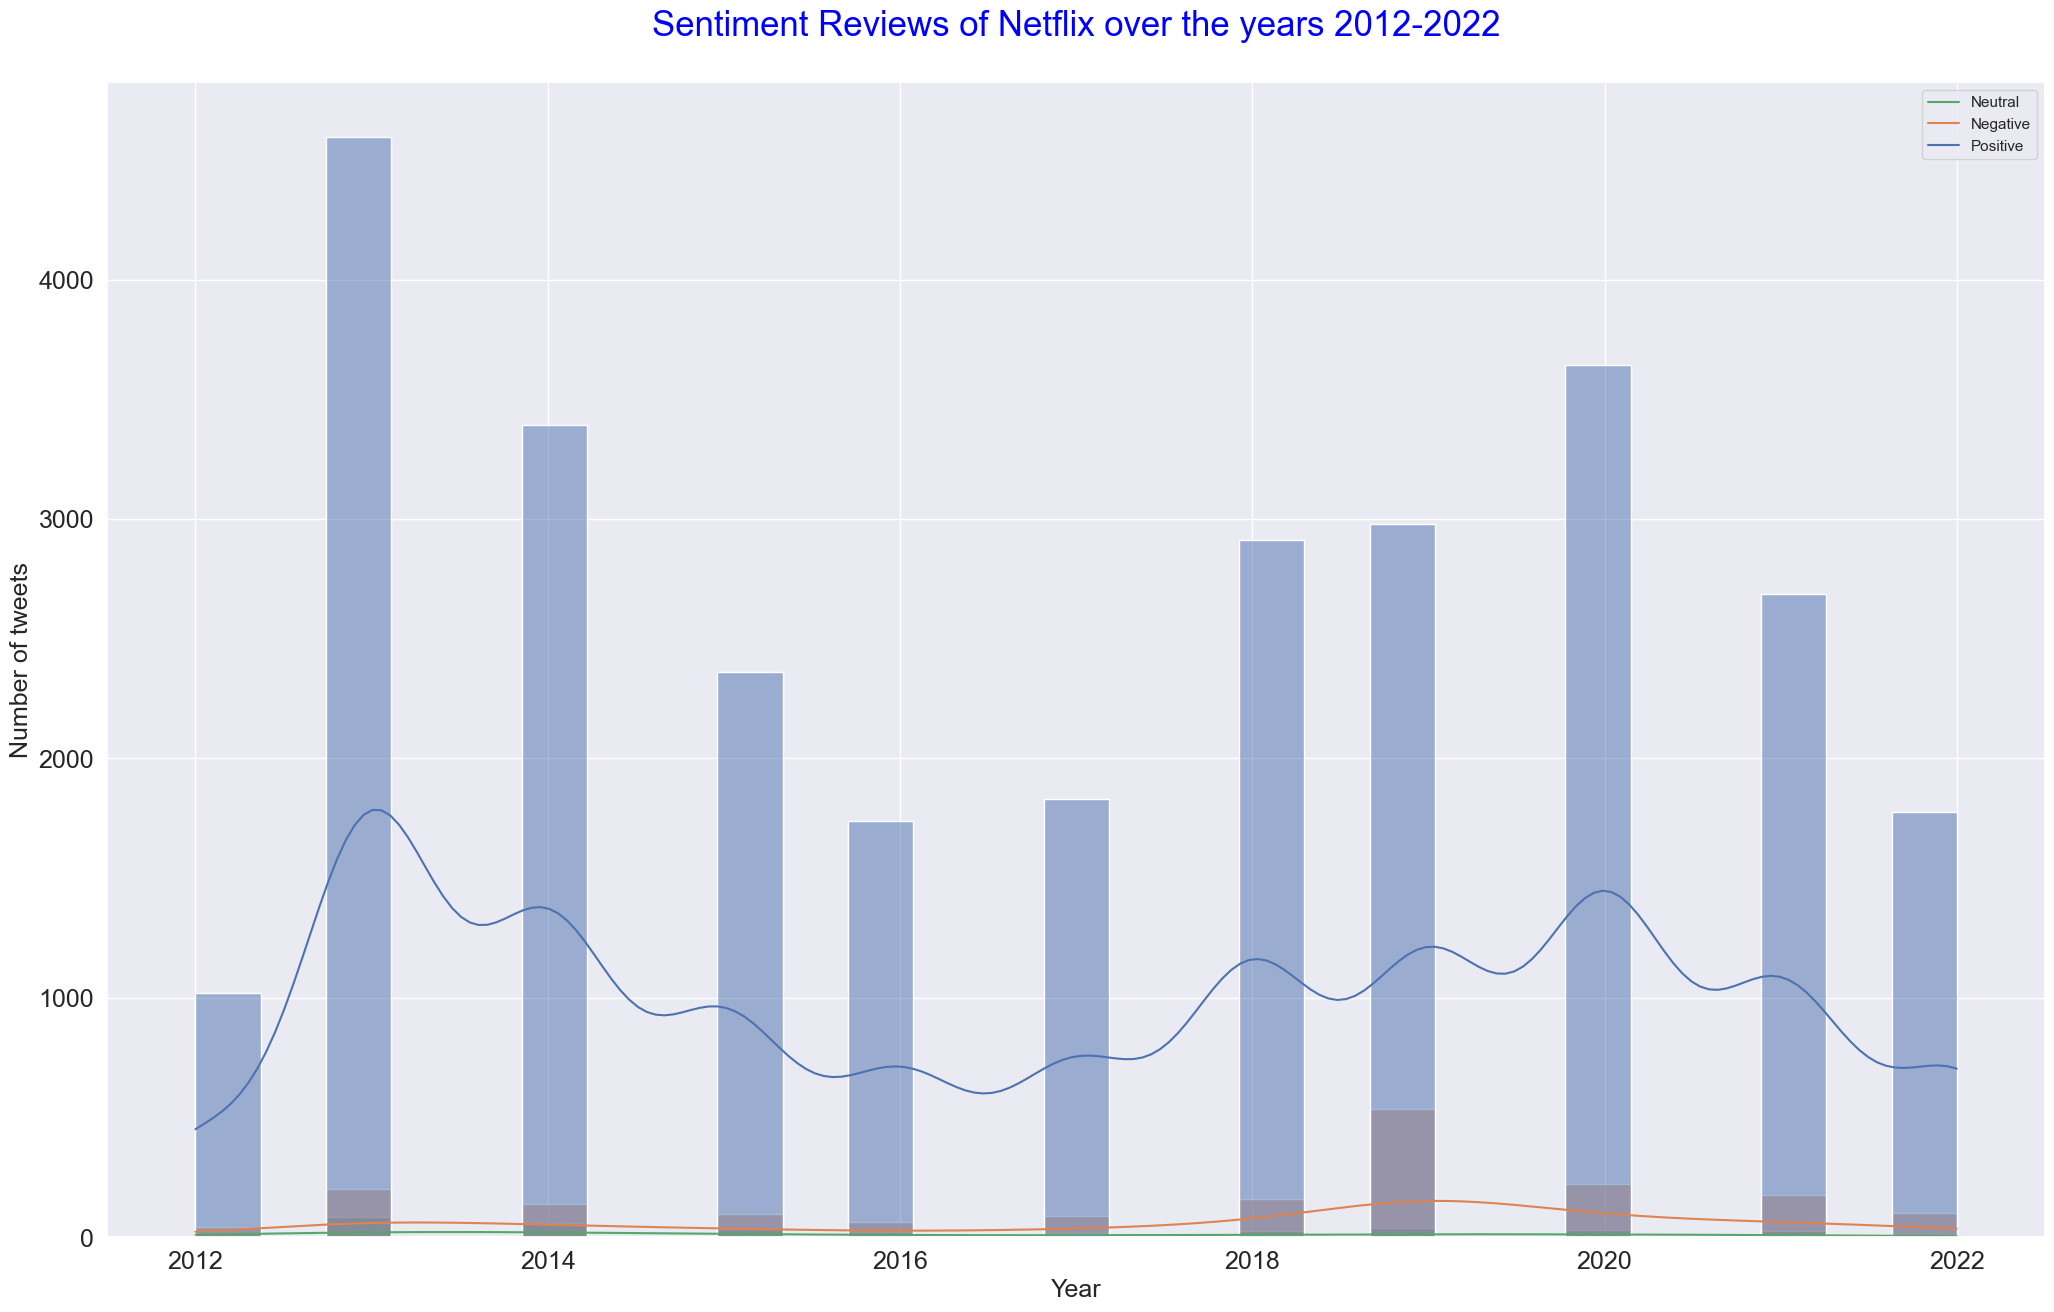

In [451]:
sns.histplot(dataset, x='Year',hue ='Sentiment',kde=True)
# setting label, title and legend
plt.title('Sentiment Reviews of Netflix over the years 2012-2022\n', fontsize=25,color='blue')
plt.ylabel('Number of tweets', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend(labels=['Neutral','Negative','Positive'])
plt.show()

In [452]:
dataset[dataset['Sentiment'] == 'Positive']

Datetime             Tweet_Id  \
0     2022-10-08 11:31:12+00:00  1578709591361490944   
9     2022-09-08 05:33:20+00:00  1567747898431127553   
11    2022-08-14 19:10:29+00:00  1558893843948470276   
13    2022-07-24 06:11:09+00:00  1551087569777045504   
17    2022-07-17 21:06:10+00:00  1548776095650136065   
...                         ...                  ...   
31184 2012-10-17 05:56:57+00:00   258446479969112065   
31185 2012-10-17 05:29:07+00:00   258439478593605632   
31186 2012-10-17 03:25:03+00:00   258408252814020609   
31187 2012-10-17 01:18:17+00:00   258376352510652417   
31188 2012-10-16 21:14:43+00:00   258315054947131392   

                                                 Content Language  \
0      not a bad movie as I thought it would be, but ...       en   
9      Was #Morbius a good or bad #movie? \n\n#Netfli...       en   
11     "Day shift" is not at all a bad movie &amp; I ...       en   
13     What can I say? #TheGrayMan is not a good movi...       en   
17     Janeites are still arguing over the latest Per...       en   
...                                                  ...      ...   
31184  Equilibrium with Christian Bale is actually a ...       en   
31185            Goon is a really good movie! #netflix !       en   
31186  Boutta watch some good movies #netflix @wildwi...       en   
31187  "Me And You And Everyone We Know", a very weir...       en   
31188  When there actually are movies/tvshows you wan...       en   

              Username              User_id                  User_location  \
0         TheMuhandiss   978271725480808449                             UK   
9         KurisutaBlue           3007553071         Marvel (San Francisco)   
11           sameer087            155583250    Dubai, United Arab Emirates   
13     Marleylovesfilm             17945039                California, USA   
17          DKathynina  1495720457139544066                San Antonio, TX   
...                ...                  ...                            ...   
31184         fultzy02            238900883                LEX, G-town, KY   
31185        erixvubui             26656250                Los Angeles, CA   
31186        AdamZBush            423868429  Midway, KY -BG- Nashville, TN   
31187      YeterYensen            255636851              (607) w (216) luv   
31188    SoniaQureshis             51167917              Stockholm, Sweden   

                                         cleaned_Content Sentiment  Year  
0      bad movie thought would impressive good time w...  Positive  2022  
9             morbius good bad movie netflix marvel sony  Positive  2022  
11     day shift bad movie amp really enjoyed watchin...  Positive  2022  
13     say thegrayman good movie bad movie right midd...  Positive  2022  
17     janeites still arguing latest persuasion adapt...  Positive  2022  
...                                                  ...       ...   ...  
31184  omigod feel good movie love bestfriendtelepoth...  Positive  2012  
31185  good action movie rt ms43938 act valor deck ne...  Positive  2012  
31186  id forgotten good movie line fire netflix nhll...  Positive  2012  
31187  machine gun preacher netflix definitely intere...  Positive  2012  
31188  damn good movie watch netflix sometimes feel l...  Positive  2012  

[28936 rows x 10 columns]

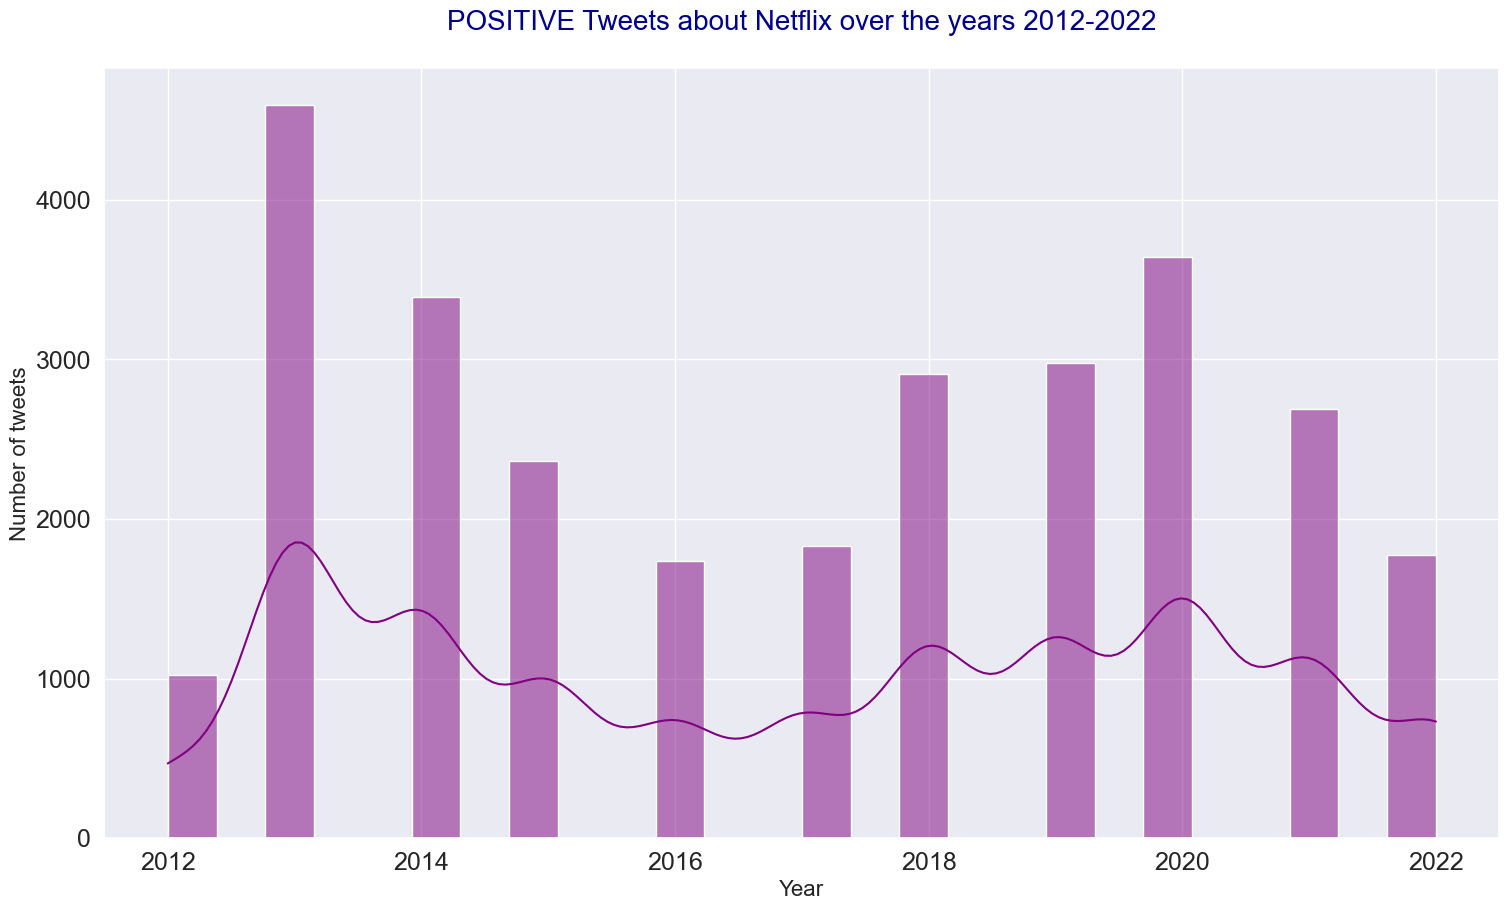

In [453]:
# POSITIVE Tweets about Netflix per year
plt.figure(figsize=(18, 10))
sns.histplot(x=dataset[dataset['Sentiment'] == 'Positive']['Year'], kde=True, color='purple')

# setting label, title and legend
plt.title('POSITIVE Tweets about Netflix over the years 2012-2022\n', fontsize=20, color='darkblue')
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

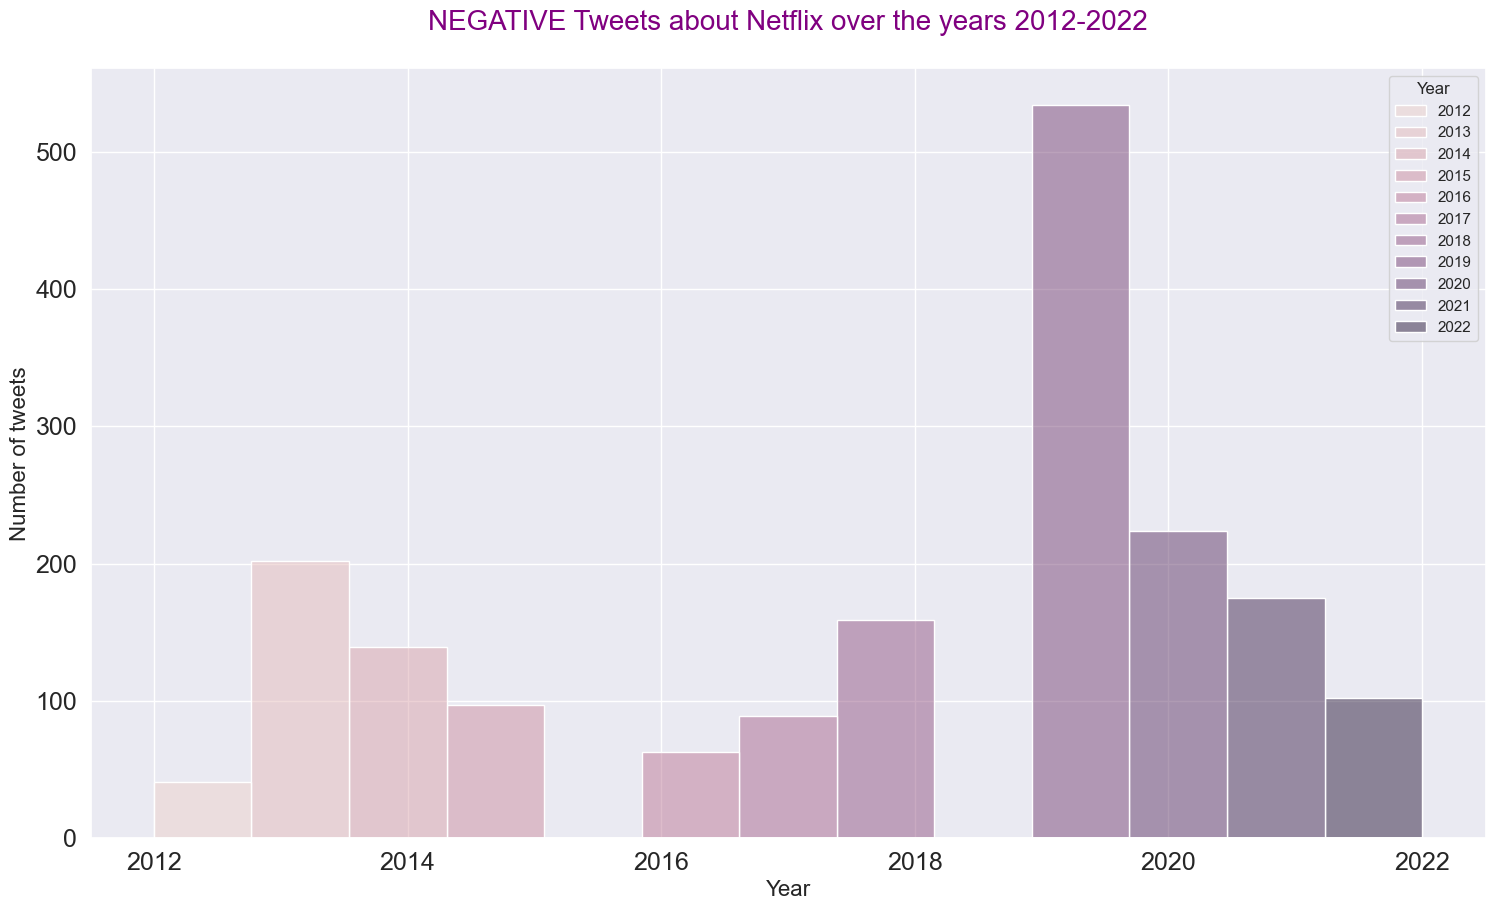

In [454]:
# NEGATIVE Tweets about Netflix per year
plt.figure(figsize=(18, 10))
sns.histplot(data= dataset[dataset['Sentiment'] == 'Negative'],x='Year', kde=True, hue ='Year')

# setting label, title and legend
plt.title('NEGATIVE Tweets about Netflix over the years 2012-2022\n', fontsize=20, color ='purple')
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

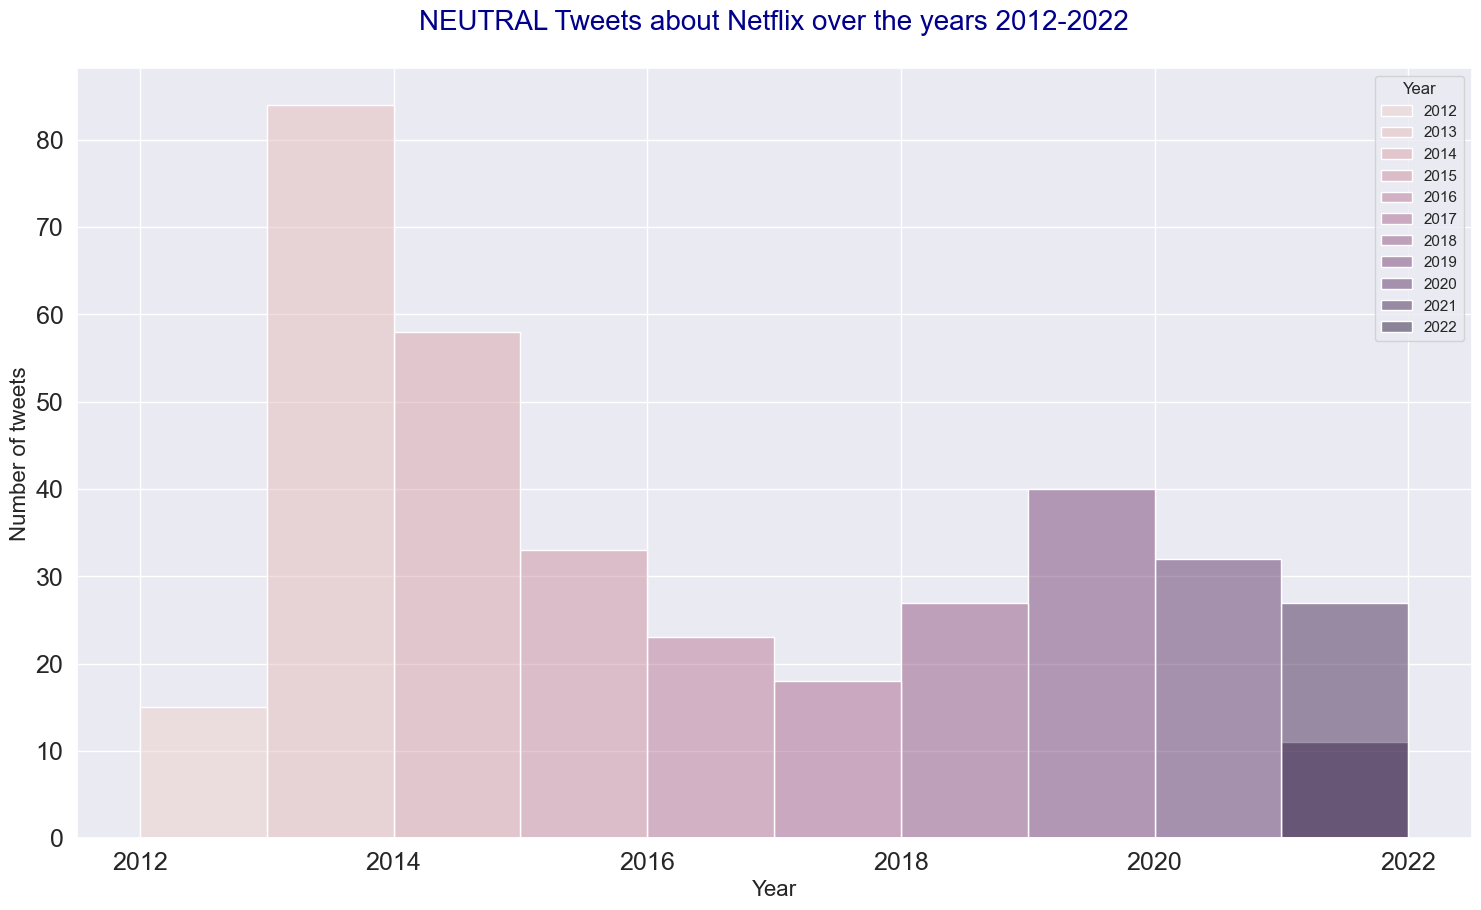

In [455]:
# NEUTRAL Tweets about Netflix per year
plt.figure(figsize=(18, 10))
sns.histplot(data= dataset[dataset['Sentiment'] == 'Neutral'], x='Year', hue ='Year')

# setting label, title and legend
plt.title('NEUTRAL Tweets about Netflix over the years 2012-2022\n', fontsize=20, color='darkblue')
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

### B. LOCATION WISE ANALYSIS

In [456]:
groupby_Sent_UK=dataset[dataset['User_location'] == 'UK'].groupby('Sentiment').apply(count_rows)
print('- Sorted by Sentiment:\n',groupby_Sent_UK)
groupby_yearSent_UK= dataset[dataset['User_location'] == 'UK'].groupby(["Year","Sentiment"]).apply(count_rows)
print('\n- Sorted by year: \n', groupby_yearSent_UK )

- Sorted by Sentiment:
 Sentiment
Negative     5
Positive    68
dtype: int64

- Sorted by year: 
 Year  Sentiment
2012  Positive      1
2013  Positive      4
2014  Positive      7
2015  Positive      5
2016  Negative      1
      Positive      4
2017  Positive      5
2018  Negative      1
      Positive      2
2019  Negative      1
      Positive      5
2020  Negative      1
      Positive     12
2021  Positive     16
2022  Negative      1
      Positive      7
dtype: int64


In [457]:
groupby_year_UK=dataset[dataset['User_location'] == 'UK'].groupby(["Year","Sentiment"]).value_counts().reset_index()
groupby_year_UK

Year Sentiment                  Datetime             Tweet_Id  \
0   2012  Positive 2012-10-20 21:46:53+00:00   259772704499040257   
1   2013  Positive 2013-04-16 10:18:56+00:00   324104614062465024   
2   2013  Positive 2013-11-12 13:09:50+00:00   400249073527037952   
3   2013  Positive 2013-07-23 23:20:47+00:00   359815384020430848   
4   2013  Positive 2013-05-27 22:35:48+00:00   339147954935971840   
..   ...       ...                       ...                  ...   
68  2022  Positive 2022-05-13 21:08:30+00:00  1525221472293343232   
69  2022  Positive 2022-05-08 10:10:50+00:00  1523244023514902529   
70  2022  Positive 2022-04-01 09:23:38+00:00  1509823792771743764   
71  2022  Positive 2022-03-02 20:08:22+00:00  1499114411923066883   
72  2022  Positive 2022-10-08 11:31:12+00:00  1578709591361490944   

                                              Content Language  \
0   SUCH a good day and night with @MegsiKate :D n...       en   
1   Apparently I'm paying for #netflix. Could of s...       en   
2   Good news movie fans! #Netflix is now availabl...       en   
3     Anyone got any good movie suggestions? #NetFlix       en   
4   I’m not usually into vampire movies but We Are...       en   
..                                                ...      ...   
68  FOR SALE: Sim2 XTV Laser Hybrid Ultra Short Th...       en   
69  FOR SALE: Sim2 XTV Laser Hybrid Ultra Short Th...       en   
70  FOR SALE: Sim2 XTV Laser Hybrid Ultra Short Th...       en   
71  @davidduchovny @NetflixFilm @CliffBeasts Good ...       en   
72  not a bad movie as I thought it would be, but ...       en   

          Username             User_id User_location  \
0      classyass20           796607611            UK   
1        ManOnAHog          1055331012            UK   
2          CableUK            40054419            UK   
3      StirlingW95           205987910            UK   
4    AnthonyHocken            15336899            UK   
..             ...                 ...           ...   
68  BenAtkinsRadio          2295041209            UK   
69  BenAtkinsRadio          2295041209            UK   
70  BenAtkinsRadio          2295041209            UK   
71       MnSpenpal          2423794922            UK   
72    TheMuhandiss  978271725480808449            UK   

                                      cleaned_Content  0  
0                                  good movie netflix  1  
1   never actually watched hunger game good movie ...  1  
2        machine gun preacher good movie netflix seen  1  
3       good movie watch netflixany suggestionsanyone  1  
4   anybody good movie suggestion something netfli...  1  
..                                                ... ..  
68  movie satellite partner kalaingartv streaming ...  1  
69  going agree apart good storyline great perform...  1  
70               boilingpoint netflix damn good movie  1  
71  madea homecoming good movie definitely best mo...  1  
72  bad movie thought would impressive good time w...  1  

[73 rows x 11 columns]

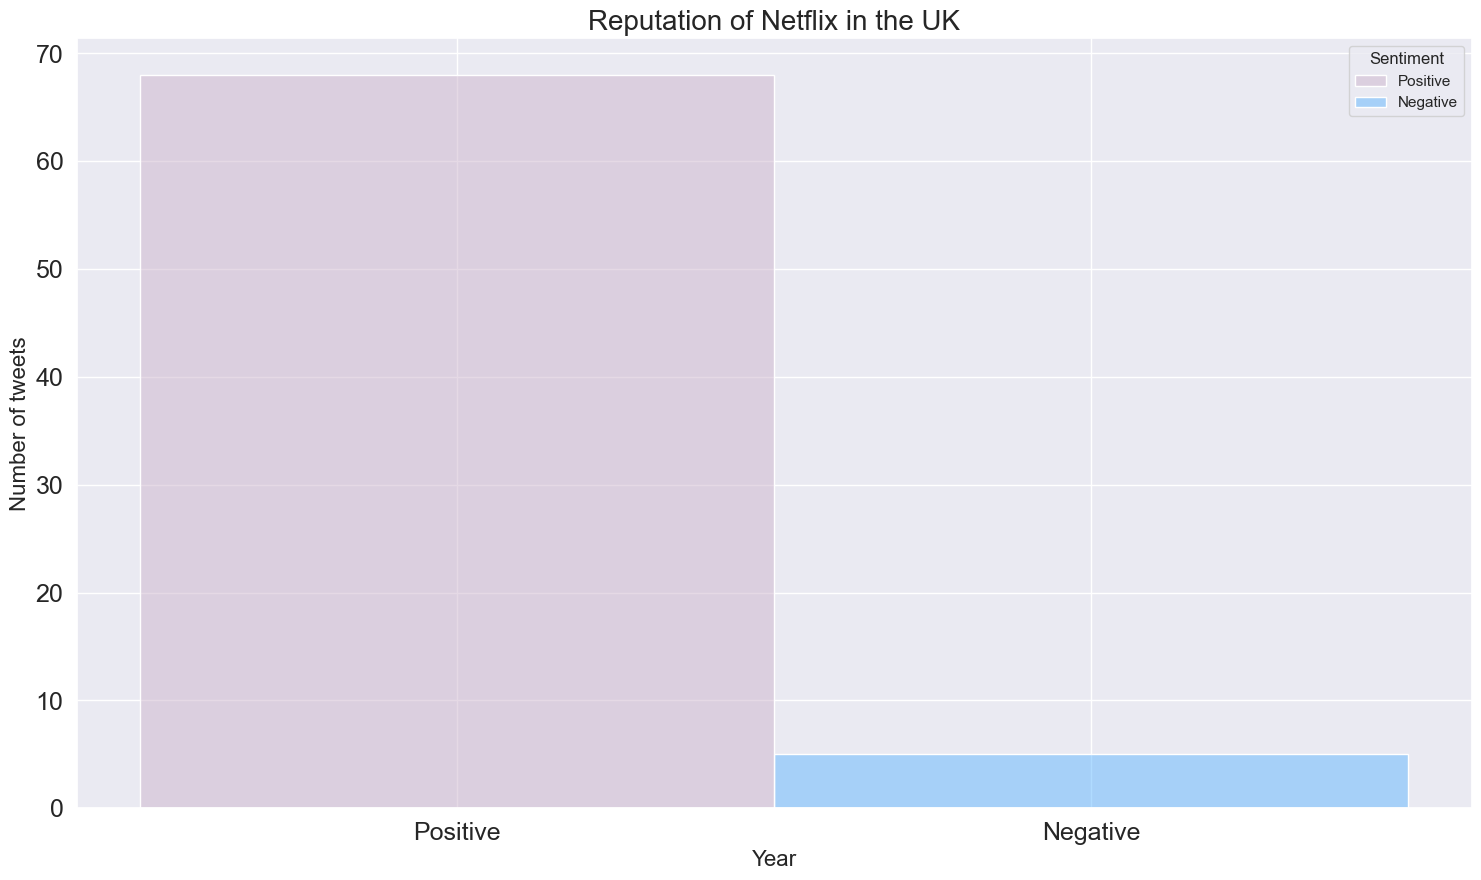

In [458]:
# in the UK
dataset[dataset['User_location'] == 'UK']
plt.figure(figsize=(18, 10))
sns.histplot(data= dataset[dataset['User_location'] == 'UK'], x='Sentiment', hue ='Sentiment', palette=["#CDB5CD", "#63B8FF"])

# setting label, title and legend
plt.title('Reputation of Netflix in the UK', fontsize=20)
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

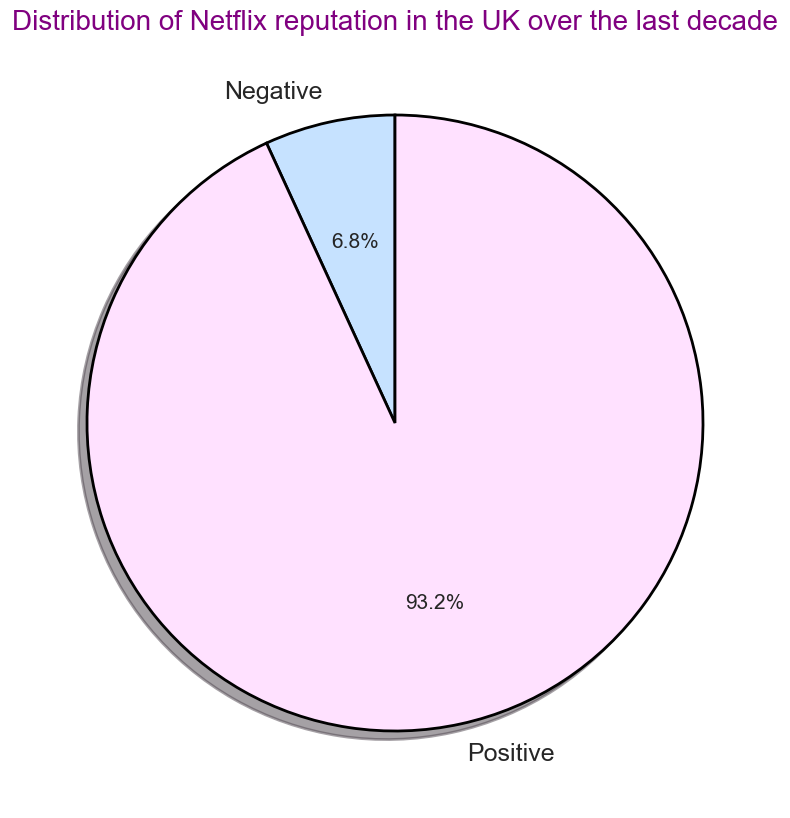

In [459]:
fig = plt.figure(figsize=(10,10))
colors = ('#C6E2FF', '#FFE1FF')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=groupby_Sent_UK
explode = None
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Netflix reputation in the UK over the last decade', size='20', color='purple')
plt.show()

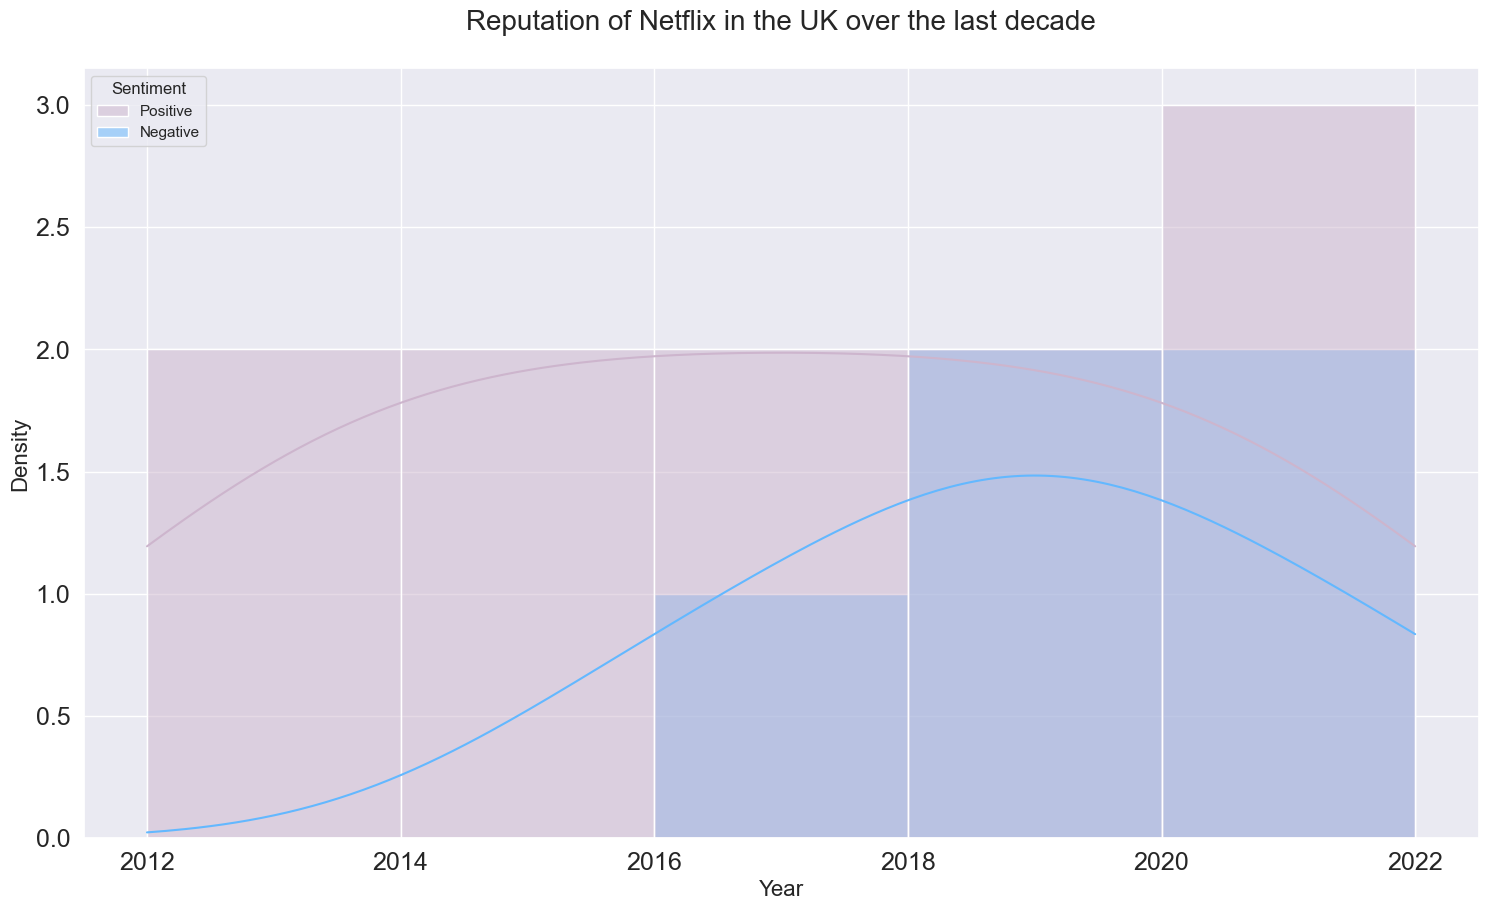

In [460]:
# in the UK
dataset[dataset['User_location'] == 'UK']
plt.figure(figsize=(18, 10))
sns.histplot(data= groupby_yearSent_UK, x = 'Year', hue='Sentiment',palette=["#CDB5CD", "#63B8FF"], kde=True)

# setting label, title and legend
plt.title('Reputation of Netflix in the UK over the last decade\n', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

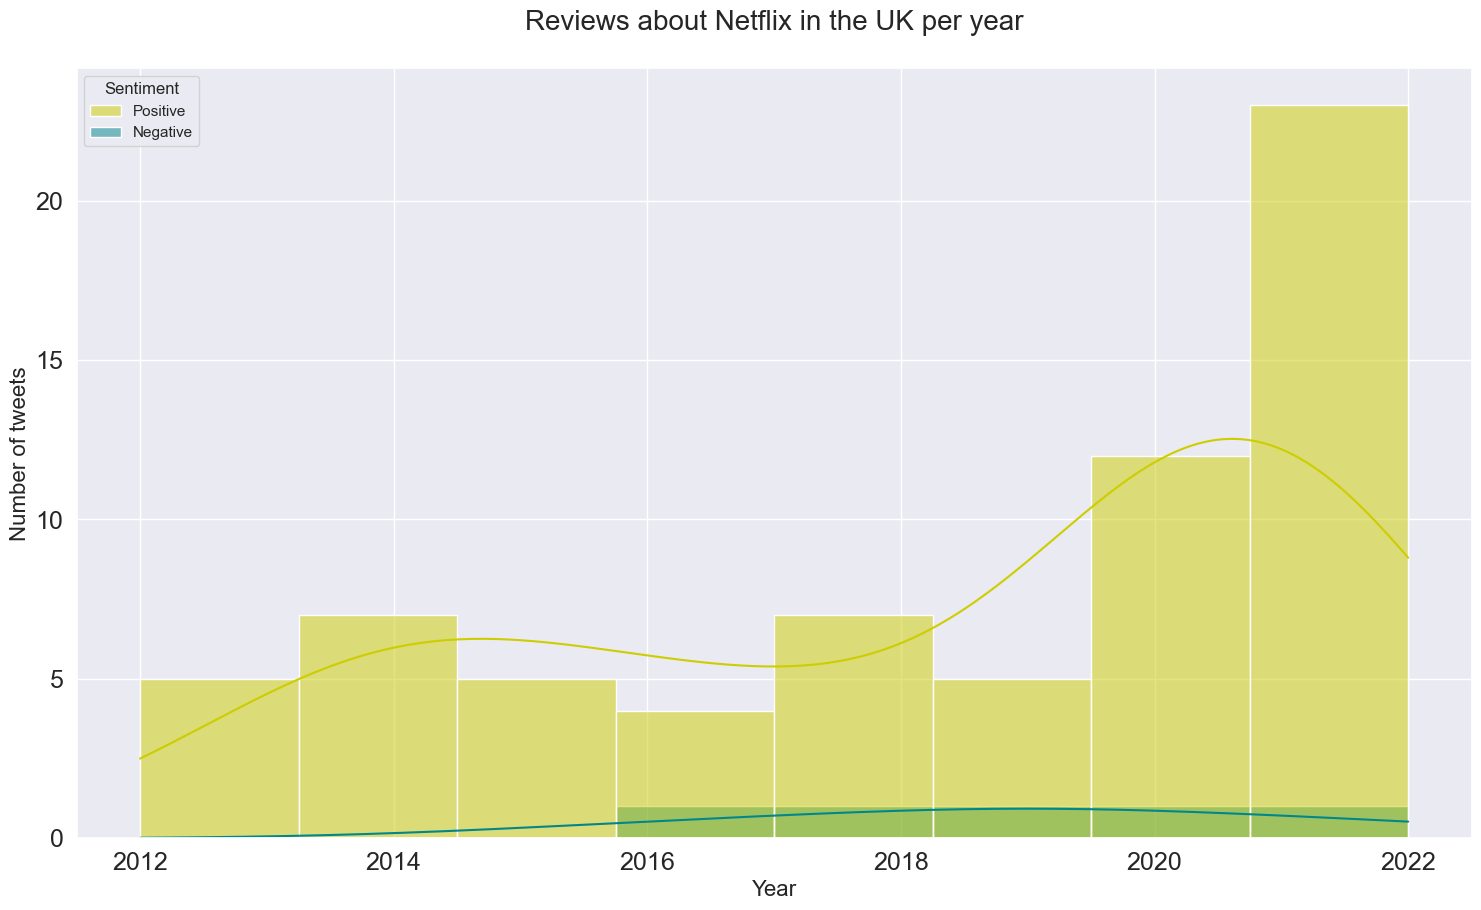

In [461]:
# in the UK
dataset[dataset['User_location'] == 'UK']
plt.figure(figsize=(18, 10))
sns.histplot(data= groupby_year_UK, x = 'Year', hue='Sentiment',palette=["#CDCD00", "#00868B"], kde=True)

# setting label, title and legend
plt.title('Reviews about Netflix in the UK per year\n', fontsize=20)
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

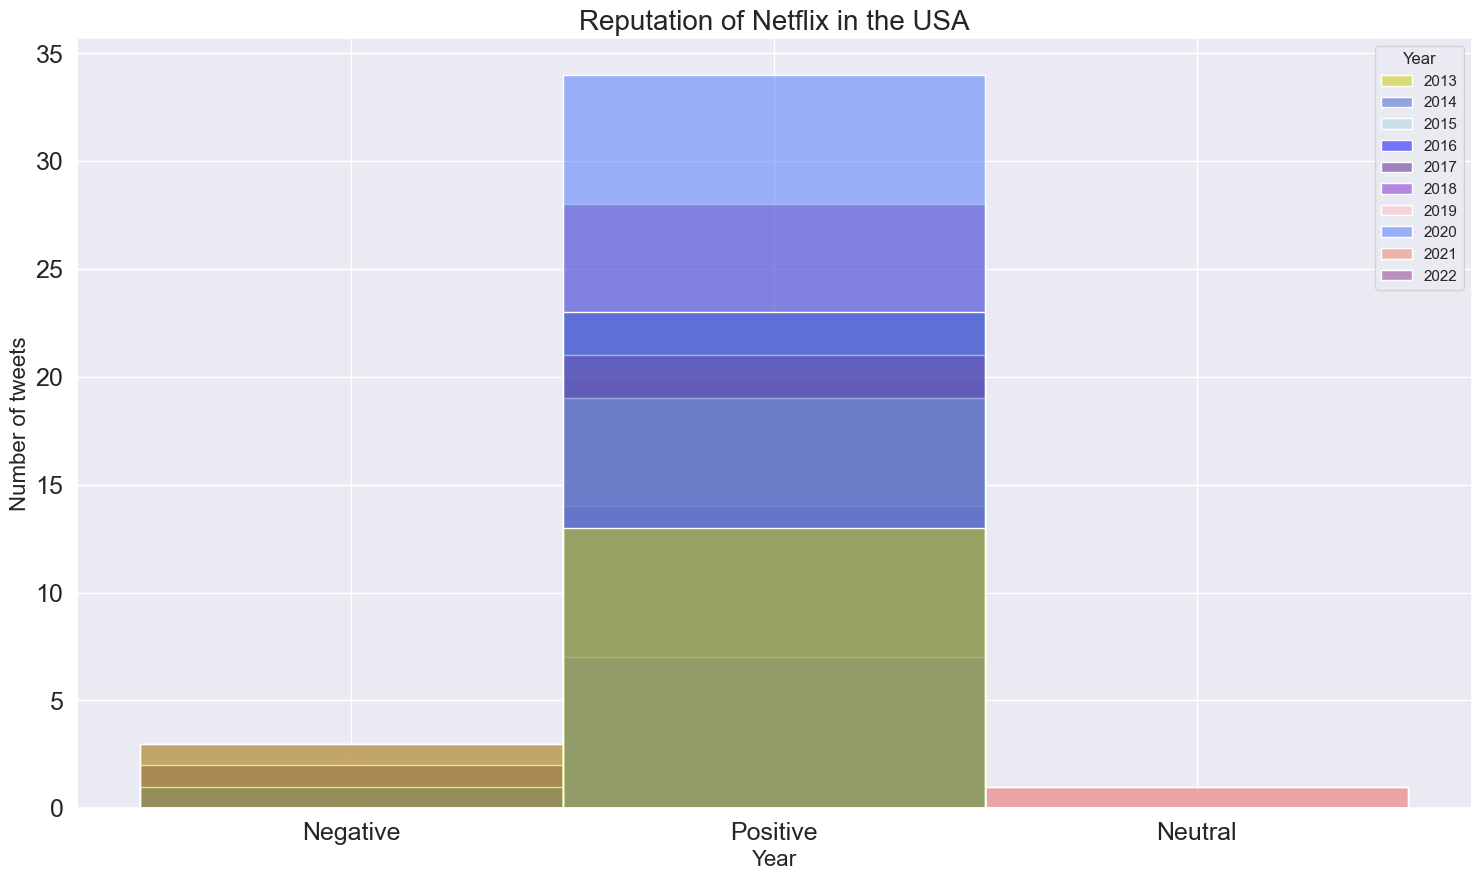

In [462]:
# in the USA
plt.figure(figsize=(18, 10))
sns.histplot(data= dataset[dataset['User_location'] == 'USA'], x='Sentiment', hue ='Year',
             palette=["#CDCD00", "#3A5FCD",'lightblue', 'blue', '#551A8B','#7D26CD','#FFC1C1','#4876FF','#EE8262','#8E388E'])

# setting label, title and legend
plt.title('Reputation of Netflix in the USA', fontsize=20)
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

In [463]:
groupby_Sentc_USA=dataset[dataset['User_location'] == 'USA'].groupby('Sentiment').apply(count_rows)
print('- Sorted by Sentiment:\n',groupby_Sentc_USA)
groupby_yearSent_USA= dataset[dataset['User_location'] == 'USA'].groupby(["Year","Sentiment"]).apply(count_rows)
print('\n- Sorted by year: \n', groupby_yearSent_USA )

- Sorted by Sentiment:
 Sentiment
Negative     15
Neutral       3
Positive    200
dtype: int64

- Sorted by year: 
 Year  Sentiment
2013  Negative      3
      Positive     13
2014  Negative      1
      Positive     23
2015  Positive     19
2016  Positive      7
2017  Negative      2
      Positive     21
2018  Negative      3
      Positive     14
2019  Negative      3
      Neutral       1
      Positive     21
2020  Positive     34
2021  Negative      2
      Neutral       1
      Positive     20
2022  Negative      1
      Neutral       1
      Positive     28
dtype: int64


In [464]:
groupby_year_USA=dataset[dataset['User_location'] == 'USA'].groupby('Sentiment').value_counts().reset_index()
groupby_year_USA

Sentiment                  Datetime             Tweet_Id  \
0    Negative 2013-01-10 07:13:24+00:00   289268689730142209   
1    Negative 2013-03-03 22:48:50+00:00   308348267446538240   
2    Negative 2013-03-04 01:41:11+00:00   308391642694557697   
3    Negative 2014-01-06 05:40:50+00:00   420067415259484160   
4    Negative 2017-04-09 15:21:29+00:00   851092710090043393   
..        ...                       ...                  ...   
213  Positive 2016-08-11 21:05:06+00:00   763843707443482625   
214  Positive 2016-08-21 01:54:24+00:00   767178005651259393   
215  Positive 2016-11-22 20:00:40+00:00   801153446330044417   
216  Positive 2016-12-13 03:38:57+00:00   808516534494699520   
217  Positive 2022-09-24 18:53:20+00:00  1573747430356668418   

                                               Content Language  \
0    So #Netflix added Mission Impossible Ghost Pro...       en   
1    Sometimes you just need to watch a bad movie o...       en   
2    I am fully admitting that the @justinbieber mo...       en   
3    Watching Olympus Has Fallen on Netflix. Is it ...       en   
4    Dear @netflix does 71% Match mean 7 out of 10 ...       en   
..                                                 ...      ...   
213  These are good movies tho...#Netflix #Chill ht...       en   
214  Netflix "Stranger Things" ...Good stuff! #Netf...       en   
215  The Invitation is a good movie to watch if you...       en   
216  #Netflix "The Good Neighbor" was so sad! Good ...       en   
217  Anyone see that #1 movie on Netflix US atm? Th...       en   

           Username     User_id User_location  \
0    gimmeabudlight   179764758           USA   
1       CarNewsCafe  1146314383           USA   
2        Debrocks10    47395164           USA   
3        NathanLive    24102466           USA   
4       LarryBraddy   612216567           USA   
..              ...         ...           ...   
213         imdizco  1509924284           USA   
214     StarCityTam   570543855           USA   
215  egcambyfiction  2770267945           USA   
216          4keebo   230284218           USA   
217    lemieux62690   113225786           USA   

                                       cleaned_Content  Year  0  
0    netflix good tv show movie suck especially sca...  2013  1  
1               sometimes need watch bad movie netflix  2013  1  
2    hate teacher show beginning good movie there t...  2013  1  
3    love country hate hate good movie need watch o...  2014  1  
4    dear 71 match mean 7 10 thumb bad movie rated ...  2017  1  
..                                                 ...   ... ..  
213  thelittleprince review classic tale becomes ha...  2016  1  
214  watch movie good bad check podcast filmpodcast...  2016  1  
215  dad watching hannah montana movie right he lau...  2016  1  
216                         good mystery movie netflix  2016  1  
217  movie lou crazy… netflix coming thru good stuf...  2022  1  

[218 rows x 11 columns]

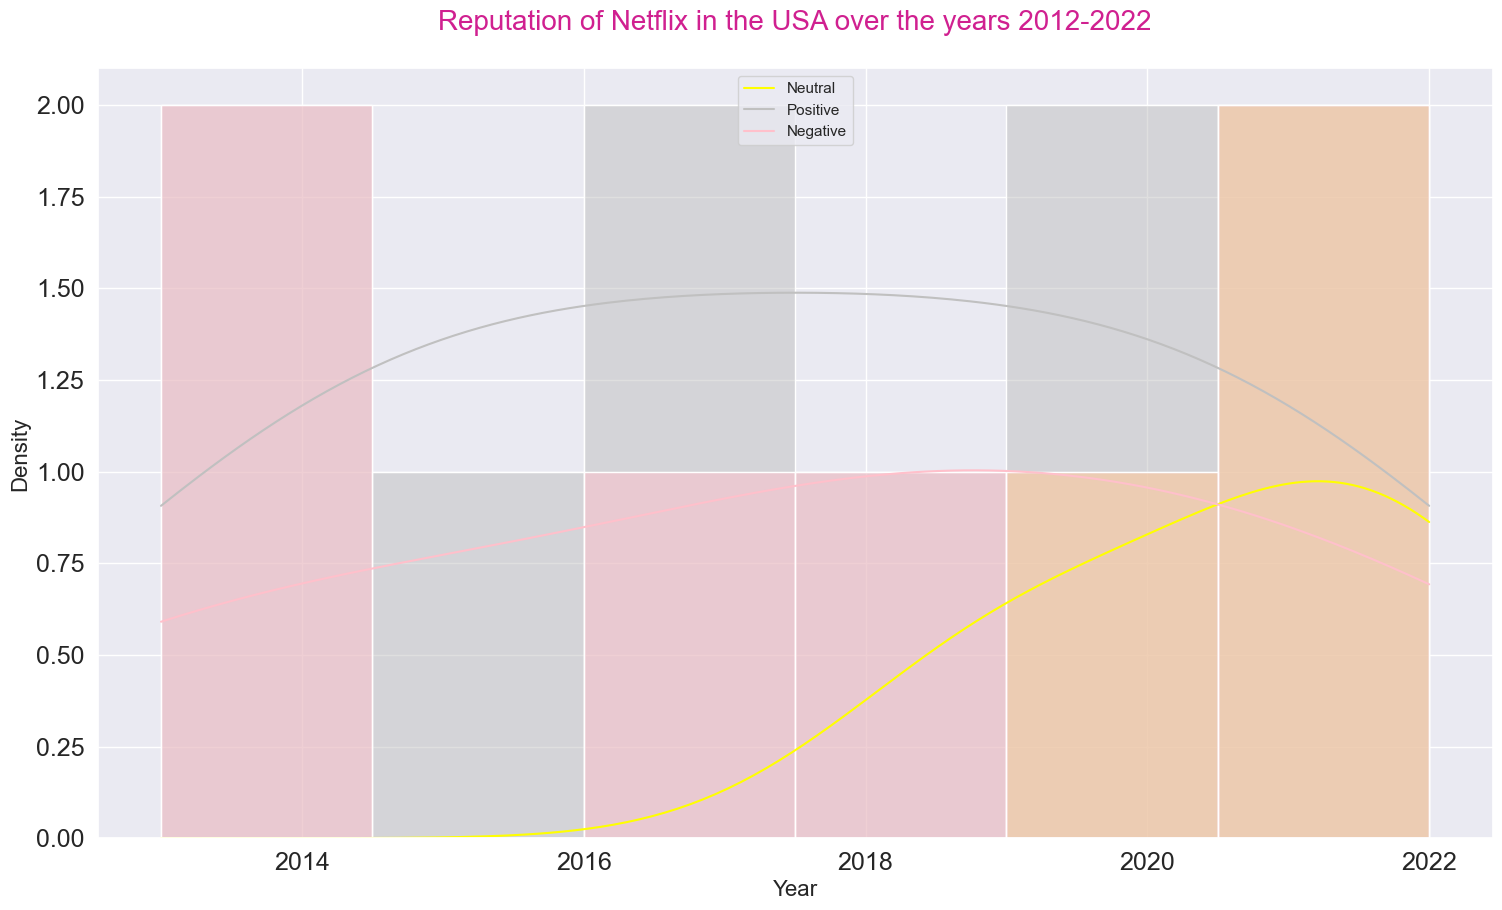

In [465]:
plt.figure(figsize=(18, 10))
sns.histplot(groupby_yearSent_USA, x = 'Year', hue='Sentiment',palette=["pink","#C0C0C0", "yellow"], kde=True)
# setting label, title and legend
plt.title('Reputation of Netflix in the USA over the years 2012-2022\n', fontsize=20, color = '#D02090')
plt.ylabel('Density', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(labels=['Neutral','Positive','Negative'])
plt.show()

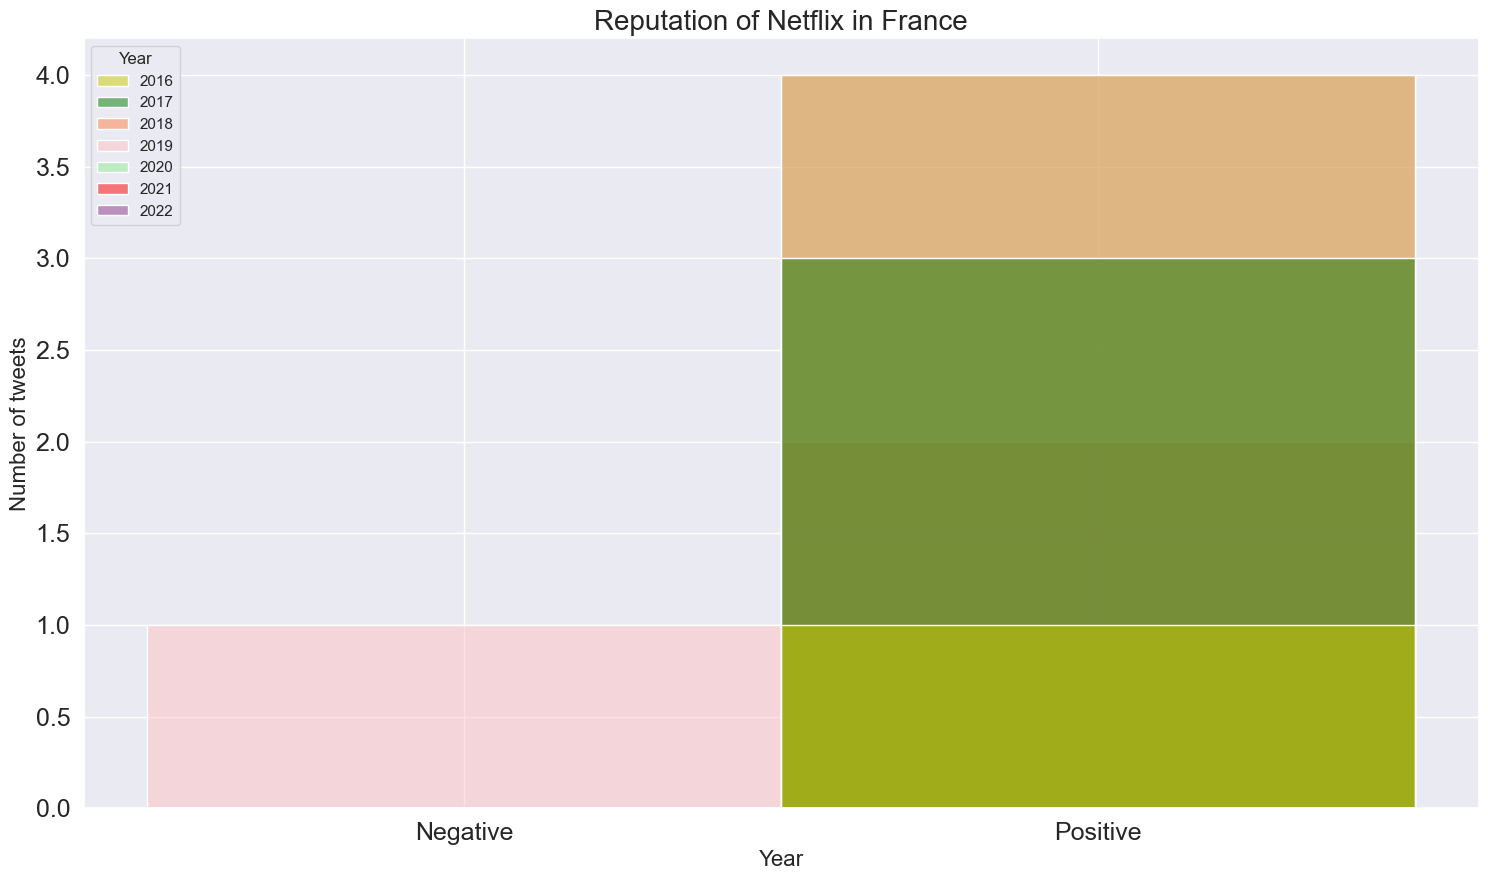

In [466]:
# in the France
plt.figure(figsize=(18, 10))
sns.histplot(data= dataset[dataset['User_location'] == 'France'], x='Sentiment', hue ='Year', palette=["#CDCD00", "green", '#FF8247','#FFC1C1','lightgreen','red','#8E388E'])

# setting label, title and legend
plt.title('Reputation of Netflix in France', fontsize=20)
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

In [467]:
groupby_year_France=dataset[dataset['User_location'] == 'France'].groupby('Year').value_counts().reset_index()
groupby_year_France

Year                  Datetime             Tweet_Id  \
0   2016 2016-12-11 17:17:50+00:00   807997834641494016   
1   2017 2017-04-09 21:07:28+00:00   851179778711400448   
2   2017 2017-07-01 17:31:18+00:00   881203572360269825   
3   2017 2017-06-01 14:16:38+00:00   870282946753818624   
4   2018 2018-11-23 21:51:06+00:00  1066086764924805120   
5   2018 2018-09-05 00:52:43+00:00  1037141441590566912   
6   2018 2018-03-23 18:19:58+00:00   977248603357044737   
7   2018 2018-02-03 17:56:35+00:00   959848104085336064   
8   2019 2019-06-25 07:08:55+00:00  1143415758757740545   
9   2019 2019-11-01 01:03:38+00:00  1190071867786383360   
10  2019 2019-05-09 16:48:47+00:00  1126529458784043009   
11  2019 2019-04-11 19:58:25+00:00  1116430321006804992   
12  2020 2020-09-27 11:31:51+00:00  1310180347020283904   
13  2020 2020-09-12 12:38:40+00:00  1304761345410314241   
14  2020 2020-06-22 21:17:17+00:00  1275176055418978304   
15  2020 2020-04-22 02:11:59+00:00  1252782170265071617   
16  2021 2021-12-13 06:41:30+00:00  1470282717057138688   
17  2021 2021-02-18 21:04:36+00:00  1362508339503054853   
18  2022 2022-05-27 13:04:25+00:00  1530173076012515330   

                                              Content Language  \
0   I watched Spectral yesterday, the visuals are ...       en   
1   I want to finish the evening with a good movie...       en   
2   Guys, I need #Netflix suggestions right now, s...       en   
3   After a good movie on #netflix with family, my...       en   
4   Netflix's Cam movie was pretty good ! ...........       en   
5   #Netflix's #Extinction is a very good movie 👍\...       en   
6   Steven Spielberg estime que les films produits...       en   
7   Looks good, great cast ! ==&gt; "Irreplaceable...       en   
8   New #Netflix movie: Good Morning, Midnight.\n\...       en   
9   El Camino: A Breaking Bad movie ( #Netflix 201...       en   
10  Very good the movie #ExtremelyWickedShockingly...       en   
11  Really enjoyed the Unicorne Store movie on Net...       en   
12  Watched #darkcrystalageofresistance pilot on #...       en   
13  I made a little edit of  #lucifer today. I too...       en   
14  is it weird that I read all of "Fractured" (mo...       en   
15  Netflix - Miracle in cell n°7 - Really a good ...       en   
16  My boyfriend Kevin is getting old but it is al...       en   
17  Watching #DeathNote the movie on #Netflix. Did...       en   
18  So yesterday i finally finished watching #Dont...       en   

           Username              User_id User_location  \
0         mairym225           3861763528        France   
1          Qlimax54   810969885798973440        France   
2        ddescham74           2954669074        France   
3         Mrdjou007           1495889365        France   
4     ClyPerlipatte  1033378487711739904        France   
5        JunkoGeine           2394709185        France   
6        MehdiOmais            198868702        France   
7           omaha60            169242768        France   
8   TheSpaceshipper  1073242482551480321        France   
9   TheSpaceshipper  1073242482551480321        France   
10       LolaSalesc           2844305697        France   
11         iorverth            529234150        France   
12    BrandNewman06            524329097        France   
13       Alanarts81  1210277021793898497        France   
14           salpiv            159294963        France   
15  BlanchonSylvain   785146063829204996        France   
16    DeStefanoCris            195882290        France   
17        Seba_FR02           2180930097        France   
18   OperationMemes           1864797019        France   

                                      cleaned_Content Sentiment  0  
0   offline movie downloading mobile good offline ...  Positive  1  
1   thewailing netflix uk waiting month see movie ...  Positive  1  
2              forgot good blade movie netflix marvel  Positive  1  
3   currentmood netflix good movie shit dunno popc...  Positive  

In [468]:
groupby_Sentc_France=dataset[dataset['User_location'] == 'France'].groupby('Sentiment').apply(count_rows)
print('- Sorted by Sentiment:\n',groupby_Sentc_France)
groupby_yearSent_France= dataset[dataset['User_location'] == 'France'].groupby(["Year","Sentiment"]).apply(count_rows)
print('\n- Sorted by year: \n', groupby_yearSent_France )

- Sorted by Sentiment:
 Sentiment
Negative     1
Positive    18
dtype: int64

- Sorted by year: 
 Year  Sentiment
2016  Positive     1
2017  Positive     3
2018  Positive     4
2019  Negative     1
      Positive     3
2020  Positive     4
2021  Positive     2
2022  Positive     1
dtype: int64


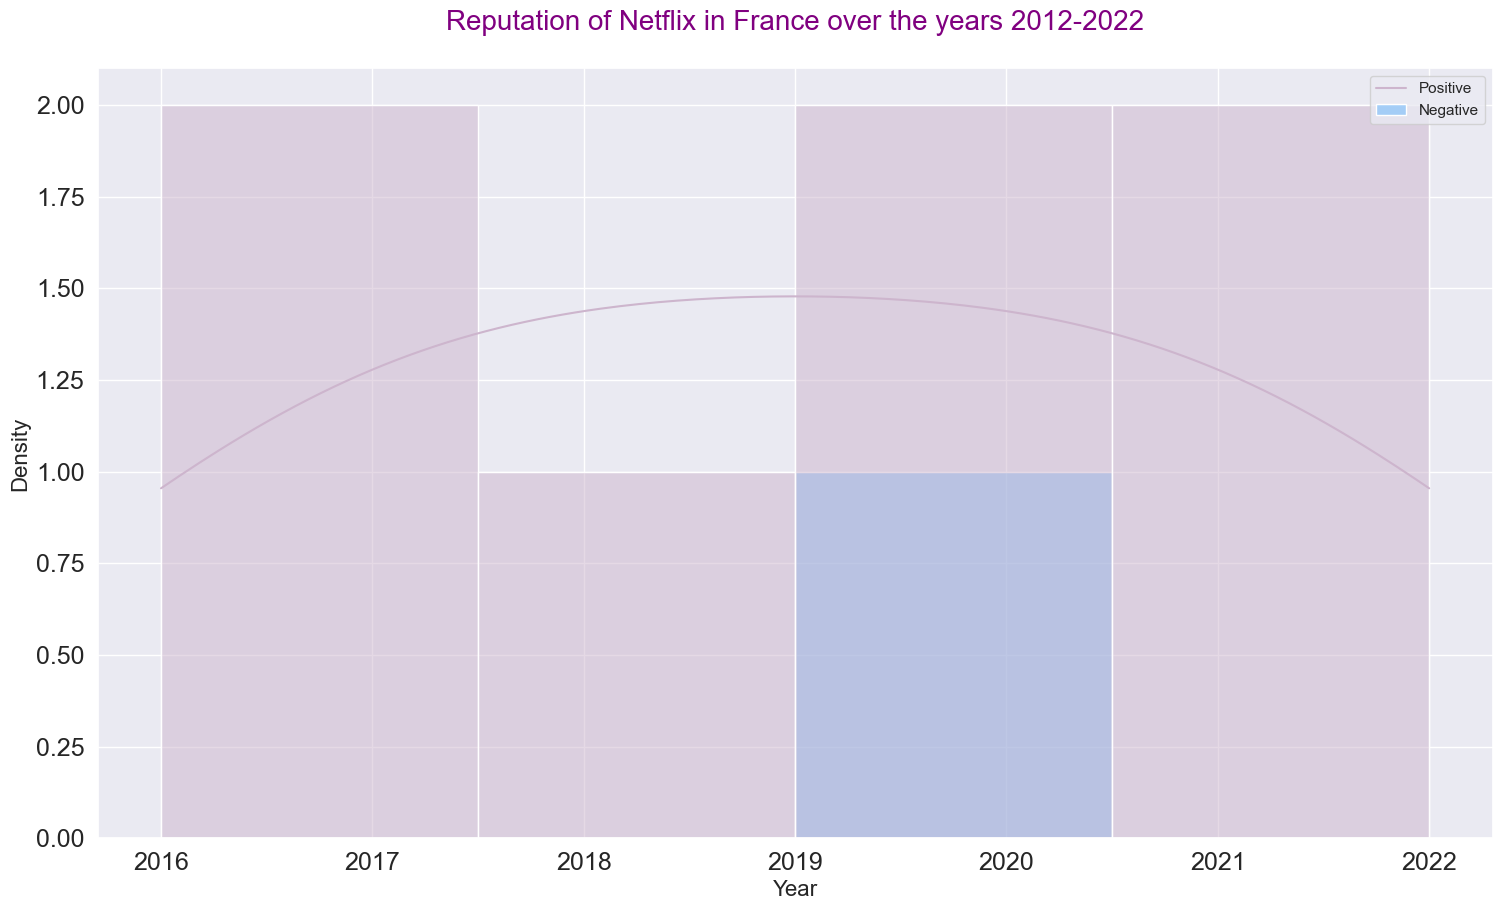

In [469]:
plt.figure(figsize=(18, 10))
sns.histplot(groupby_yearSent_France, x='Year',hue='Sentiment',palette=["#CDB5CD", "#63B8FF"], kde=True)
# setting label, title and legend
plt.title('Reputation of Netflix in France over the years 2012-2022\n', fontsize=20, color='Purple')
plt.ylabel('Density', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(labels=['Positive','Negative'])
plt.show()

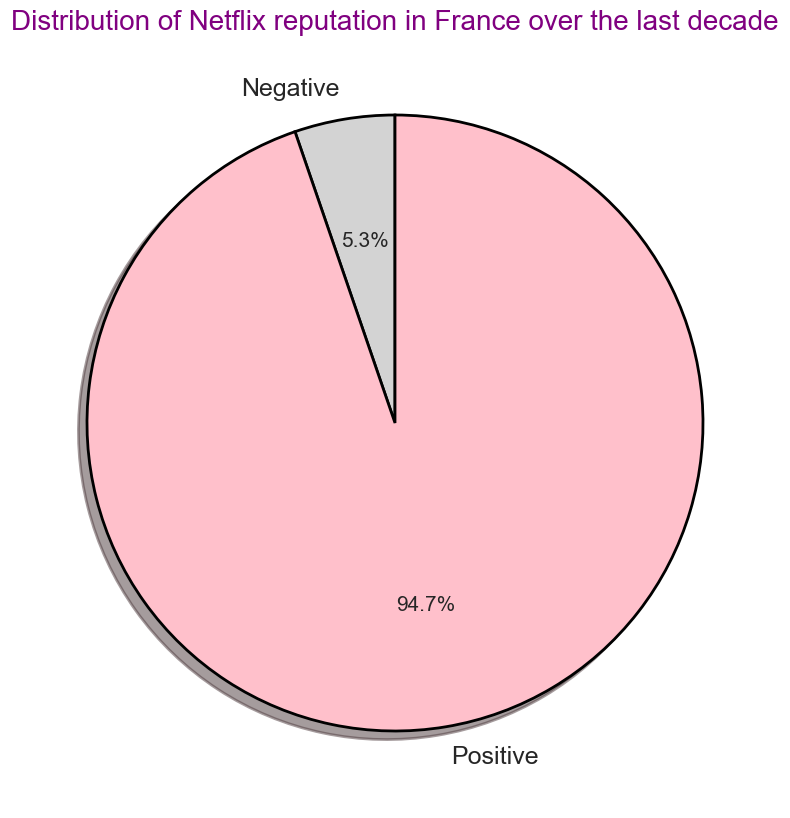

In [470]:
fig = plt.figure(figsize=(10,10))
colors = ("lightgrey", "#FFC0CB")
wp={'linewidth':2, 'edgecolor': 'black'}
tags=groupby_Sentc_France
explode = None
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Netflix reputation in France over the last decade', size='20', color='purple')
plt.show()

### C. USER_ID WISE 

In [471]:
groupby_user=dataset.groupby('User_id').apply(count_rows) 
groupby_user

User_id
3881                   70
3954                    1
4018                    1
10142                   1
39683                   1
                       ..
1558621939408805888     1
1565742322305974272     1
1566267356569272326     1
1566835006491828224     1
1576910806721204227     1
Length: 25206, dtype: int64

In [472]:
groupby_user_year=dataset.groupby(['User_id','Year','Sentiment']).value_counts().reset_index()
groupby_user_year

User_id  Year Sentiment                  Datetime  \
0                     3881  2013   Neutral 2013-12-21 05:09:17+00:00   
1                     3881  2013  Positive 2013-06-15 00:37:41+00:00   
2                     3881  2013  Positive 2013-12-20 03:44:28+00:00   
3                     3881  2013  Positive 2013-12-13 02:47:02+00:00   
4                     3881  2013  Positive 2013-12-04 04:21:27+00:00   
...                    ...   ...       ...                       ...   
31124  1558621939408805888  2022  Positive 2022-09-02 18:05:12+00:00   
31125  1565742322305974272  2022  Positive 2022-10-05 19:21:23+00:00   
31126  1566267356569272326  2022  Positive 2022-09-05 06:46:41+00:00   
31127  1566835006491828224  2022  Positive 2022-09-28 12:26:44+00:00   
31128  1576910806721204227  2022  Positive 2022-10-10 14:20:12+00:00   

                  Tweet_Id                                            Content  \
0       414261266111148032  Watched a movie on #Netflix - Devils Pass (201...   
1       345701609537425408  Watched a good movie on #Netflix - The Messeng...   
2       413877535739748352  Watched a good movie on #Netflix - Repeaters (...   
3       411326367473860608  Watched a good movie on #Netflix last night. G...   
4       408088634550935552  Watched a good horror movie on #Netflix - Devi...   
...                    ...                                                ...   
31124  1565762783437885442  Just finished watching In the #Shadow of the M...   
31125  1577740753794744339  End of the road on Netflix is a good movie #ug...   
31126  1566679193068326913  Stop purchasing and watching #hotstar #netflix...   
31127  1575099689833099271  Good morning 🌻 \n\n#feetfethish #feet #Netflix...   
31128  1579476899021361155  Sunday Movie #3 Deliberately paced western. Ch...   

      Language        Username             User_location  \
0           en      JasonDolan  Scotland, United Kingdom   
1           en      JasonDolan  Scotland, United Kingdom   
2           en      JasonDolan  Scotland, United Kingdom   
3           en      JasonDolan  Scotland, United Kingdom   
4           en      JasonDolan  Scotland, United Kingdom   
...        ...             ...                       ...   
31124       en  classikcontent          Philadelphia, PA   
31125       en   Mruglytruth45               Kansas, USA   
31126       en        moinath7                        No   
31127       en  sussancute2022         Salento, Colombia   
31128       en   ShawnJSkinner       Aberdeen, Scotland    

                                         cleaned_Content  0  
0                  watched white house goodmovie netflix  1  
1                               good movie watch netflix  1  
2                          need good movie watch netflix  1  
3                          suggestion good movie netflix  1  
4      movie chris brown amp ti taker surprisingly go...  1  
...                                                  ... ..  
31124   similar movie malcolm amp marie good btw netflix  1  
31125  last seen alive netflix pretty good movie acti...  1  
31126        getting good girl netflix roll series movie  1  
31127                  jazzman blue good movie netflix 🍿  1  
31128  sunday movie 3 deliberately paced western chri...  1  

[31129 rows x 11 columns]

In [473]:
groupby_user_year1=dataset.groupby(['User_id']).value_counts().reset_index()
groupby_user_year1

User_id                  Datetime             Tweet_Id  \
0                     3881 2013-06-15 00:37:41+00:00   345701609537425408   
1                     3881 2013-06-16 02:05:58+00:00   346086216699088898   
2                     3881 2015-01-22 23:40:33+00:00   558408909330071552   
3                     3881 2015-04-03 18:49:37+00:00   584065230453530625   
4                     3881 2015-04-01 22:30:01+00:00   583395921796472832   
...                    ...                       ...                  ...   
31124  1558621939408805888 2022-09-02 18:05:12+00:00  1565762783437885442   
31125  1565742322305974272 2022-10-05 19:21:23+00:00  1577740753794744339   
31126  1566267356569272326 2022-09-05 06:46:41+00:00  1566679193068326913   
31127  1566835006491828224 2022-09-28 12:26:44+00:00  1575099689833099271   
31128  1576910806721204227 2022-10-10 14:20:12+00:00  1579476899021361155   

                                                 Content Language  \
0      Watched a good movie on #Netflix - The Messeng...       en   
1      Watched a good movie on #Netflix - The Messeng...       en   
2      Watched a good movie on #Netflix - You're Next...       en   
3      Watched a good movie on #Netflix- Gattaca (199...       en   
4      Watched a good movie on #Netflix - Van Helsing...       en   
...                                                  ...      ...   
31124  Just finished watching In the #Shadow of the M...       en   
31125  End of the road on Netflix is a good movie #ug...       en   
31126  Stop purchasing and watching #hotstar #netflix...       en   
31127  Good morning 🌻 \n\n#feetfethish #feet #Netflix...       en   
31128  Sunday Movie #3 Deliberately paced western. Ch...       en   

             Username             User_location  \
0          JasonDolan  Scotland, United Kingdom   
1          JasonDolan  Scotland, United Kingdom   
2          JasonDolan  Scotland, United Kingdom   
3          JasonDolan  Scotland, United Kingdom   
4          JasonDolan  Scotland, United Kingdom   
...               ...                       ...   
31124  classikcontent          Philadelphia, PA   
31125   Mruglytruth45               Kansas, USA   
31126        moinath7                        No   
31127  sussancute2022         Salento, Colombia   
31128   ShawnJSkinner       Aberdeen, Scotland    

                                         cleaned_Content Sentiment  Year  0  
0                               good movie watch netflix  Positive  2013  1  
1      finished diggingtochina w amp goodamp cute mov...  Positive  2013  1  
2      netflix good movie ★the brain exchange★ great ...  Positive  2015  1  
3         hard find good movie looking netflix😫😫 netflix  Positive  2015  1  
4      anyone good netflix recommendation sadsuper ro...  Positive  2015  1  
...                                                  ...       ...   ... ..  
31124   similar movie malcolm amp marie good btw netflix  Positive  2022  1  
31125  last seen alive netflix pretty good movie acti...  Positive  2022  1  
31126        getting good girl netflix roll series movie  Positive  2022  1  
31127                  jazzman blue good movie netflix 🍿  Positive  2022  1  
31128  sunday movie 3 deliberately paced western chri...  Positive  2022  1  

[31129 rows x 11 columns]

In [474]:
# Keep the reviews given by the user who tweets the most about netflix over the last decade
user_3881 = groupby_user_year1.iloc[0:70]
user_3881=user_3881.rename( columns={0 :'Count'})
user_3881

User_id                  Datetime            Tweet_Id  \
0      3881 2013-06-15 00:37:41+00:00  345701609537425408   
1      3881 2013-06-16 02:05:58+00:00  346086216699088898   
2      3881 2015-01-22 23:40:33+00:00  558408909330071552   
3      3881 2015-04-03 18:49:37+00:00  584065230453530625   
4      3881 2015-04-01 22:30:01+00:00  583395921796472832   
..      ...                       ...                 ...   
65     3881 2014-06-08 21:41:57+00:00  475754629935169536   
66     3881 2014-05-31 18:01:15+00:00  472799986573660160   
67     3881 2014-05-31 03:23:57+00:00  472579206636130304   
68     3881 2014-05-29 11:38:00+00:00  471978761832120320   
69     3881 2014-05-28 16:23:35+00:00  471688245567553536   

                                              Content Language    Username  \
0   Watched a good movie on #Netflix - The Messeng...       en  JasonDolan   
1   Watched a good movie on #Netflix - The Messeng...       en  JasonDolan   
2   Watched a good movie on #Netflix - You're Next...       en  JasonDolan   
3   Watched a good movie on #Netflix- Gattaca (199...       en  JasonDolan   
4   Watched a good movie on #Netflix - Van Helsing...       en  JasonDolan   
..                                                ...      ...         ...   
65  Watched a good movie on #Netflix - Takers (201...       en  JasonDolan   
66  Watched a good movie on #Netflix - The Iceman ...       en  JasonDolan   
67  Watched a good movie on #Netflix last night - ...       en  JasonDolan   
68  Watched a good movie on #Netflix last night - ...       en  JasonDolan   
69  Watched a good movie on #Netflix - Drive Angry...       en  JasonDolan   

               User_location  \
0   Scotland, United Kingdom   
1   Scotland, United Kingdom   
2   Scotland, United Kingdom   
3   Scotland, United Kingdom   
4   Scotland, United Kingdom   
..                       ...   
65  Scotland, United Kingdom   
66  Scotland, United Kingdom   
67  Scotland, United Kingdom   
68  Scotland, United Kingdom   
69  Scotland, United Kingdom   

                                      cleaned_Content Sentiment  Year  Count  
0                            good movie watch netflix  Positive  2013      1  
1   finished diggingtochina w amp goodamp cute mov...  Positive  2013      1  
2   netflix good movie ★the brain exchange★ great ...  Positive  2015      1  
3      hard find good movie looking netflix😫😫 netflix  Positive  2015      1  
4   anyone good netflix recommendation sadsuper ro...  Positive  2015      1  
..                                                ...       ...   ...    ...  
65                       fireproof good movie netflix  Positive  2014      1  
66  watched oddthomas amp frozenground good movie ...  Positive  2014      1  
67    watched oddthomas netflix good movie must watch  Positive  2014      1  
68        seen end watch movienight netflix goodmovie   Neutral  2014      1  
69                 paranoia netflix pretty good movie  Positive  2014      1  

[70 rows x 11 columns]

In [475]:
user_3881.groupby('Sentiment').apply(count_rows)

Sentiment
Negative     1
Neutral      2
Positive    67
dtype: int64

In [476]:
user_3881.groupby(['Sentiment','Year']).apply(count_rows)

Sentiment  Year
Negative   2015     1
Neutral    2013     1
           2014     1
Positive   2013    13
           2014    44
           2015    10
dtype: int64

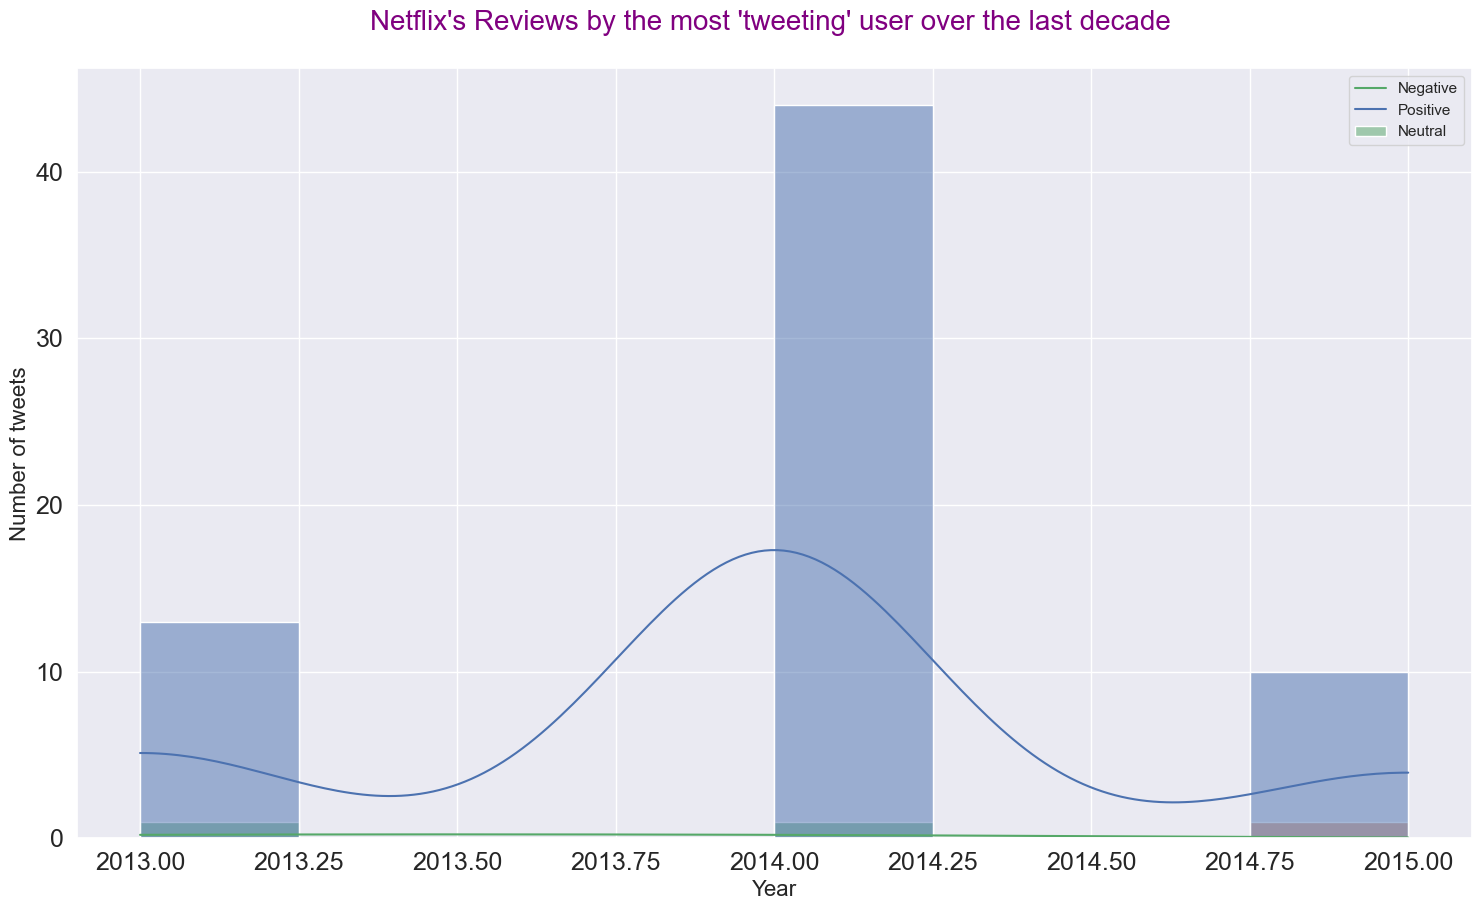

In [477]:
plt.figure(figsize=(18, 10))
sns.histplot(data=user_3881,x='Year',hue='Sentiment',kde=True)
# setting label, title and legend
plt.title("Netflix's Reviews by the most 'tweeting' user over the last decade \n", fontsize=20, color='Purple')
plt.ylabel('Number of tweets', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(labels=['Negative','Positive','Neutral'])
plt.show()

# in our study of the reputation of Netflix based on the tweets made by user on twitter over the last 10 years, We concluded that Netflix maintend a good reputation : The positive tweets were beyond 90%.